In [1]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob

        ("id", id_dtype),
        ("image", np.float32, (N_X_BINS, N_Y_BINS, N_CHANNELS)),
        ("qtot", np.float32),
        ("qoth", np.float32),
        ("cog", np.float32,(3)),
        ("moi", np.float32),
        ("ti", np.float32,(4))
        ("qst", st_info_dtype, N_CHANNELS),
        ("qst_all", st_info_dtype, STRINGS_TO_SAVE),
        ("map", map_dtype),
        ("primary", particle_dtype),
        ("prim_daughter", particle_dtype),
        ("primary_child_energy", np.float32,(N_PRIM_CHILDREN)),
        ("primary_child_pdg", np.float32,(N_PRIM_CHILDREN)),
        ("logan_veto", veto_dtype),
        ("hese_old", hese_dtype),
        ("hese", hese_dtype),
        ("weight", weight_dtype)

data_m = []
for file in glob.glob('/home/dup193/work/double_pulse/data/new_vars/Images_NuMu_1_1_1?_*'):
    x = np.load(file, mmap_mode="r")['arr_0']
    print(file, x.shape)
    for i in x:
        data_m.append(i)
data_m = np.array(data_m)
print(data_m.shape)

In [72]:
data_t = np.load('/fastio2/dasha/double_pulse/data_11vars_mid_NuTau_1_1_1.npy', mmap_mode="r")
data_m = np.load('/fastio2/dasha/double_pulse/data_11vars_mid_NuMu_1_1_1.npy', mmap_mode="r")
data_e = np.load('/fastio2/dasha/double_pulse/data_11vars_mid_NuE_1_1_1.npy', mmap_mode="r")

In [6]:
print(data_t[data_t['id']['event_id']==680]['id'])

[(122, 4294967295, 680, 0) (128, 4294967295, 680, 0)
 (137, 4294967295, 680, 0) (135, 4294967295, 680, 0)
 (149, 4294967295, 680, 0) (167, 4294967295, 680, 0)
 (165, 4294967295, 680, 0) (161, 4294967295, 680, 0)
 (118, 4294967295, 680, 0) (110, 4294967295, 680, 0)
 (117, 4294967295, 680, 0) (114, 4294967295, 680, 0)]


In [7]:
print(data_t['map']['hlc'])
print(data_m['map']['hlc'])
print(data_e['map']['hlc'])

[140 271  40 ... 135  88 142]
[285  66  94 ...  99 336  96]
[107 220 137 ... 143  73 379]


In [28]:
def PlotO(Name,Label,data_tc,data_mc,data_ec,xscale='linear',b =200,r =[0,1], loc = 8):
    fig = plt.figure(figsize=(20, 10),facecolor ='w')
    ax = fig.add_subplot(111)
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    ax.set_xscale(xscale)
    ax.set_yscale('log')
    ax.set_title(Name, fontsize = 16)
    ax.text(0.01,0.95,'#NuTauCC '+str(len(data_tc)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.92,'#NuMuCC '+str(len(data_mc)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.89,'#NuECC '+str(len(data_ec)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.set_ylim(10**(-2),10**(5))
    ax.set_xlabel(Label, fontsize = 16)                                                              
    ax.set_ylabel("#Events", fontsize = 16)                                                   
    ax.hist(data_tc, bins =b, histtype = 'step',edgecolor ='r', lw =2, range =r, label = "NuTauCC")  
    ax.hist(data_mc, bins =b, histtype = 'step',edgecolor ='b', lw =2, range = r, label = "NuMuCC")  
    ax.hist(data_ec, bins =b, histtype = 'step',edgecolor ='g', lw =2, range = r, label = "NuECC")  
    
    plt.legend(loc=loc)
    plt.show()

def PlotWO(Name,Label,data_tc,data_mc,data_ec,\
         weight_tc,weight_mc,weight_ec,\
         xscale='linear',b =200,r =[0,1], loc =8):
    fig = plt.figure(figsize=(20, 10),facecolor ='w')
    ax = fig.add_subplot(111)
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    ax.set_xscale(xscale)
    ax.set_yscale('log')
    ax.set_title(Name, fontsize = 16)
    ax.text(0.01,0.95,'#NuTauCC '+str(len(data_tc)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.92,'#NuMuCC '+str(len(data_mc)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.89,'#NuECC '+str(len(data_ec)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.set_ylim(10**(-5),10**(2))
    
    ax.set_xlabel(Label, fontsize = 16)                                                              
    ax.set_ylabel("#Events", fontsize = 16)                                                   
    ax.hist(data_tc, bins =b, weights = weight_tc, histtype = 'step',edgecolor ='r', lw =2, range =r, label = "NuTauCC")  
    ax.hist(data_mc, bins =b, weights = weight_mc, histtype = 'step',edgecolor ='b', lw =2, range = r, label = "NuMuCC")  
    ax.hist(data_ec, bins =b, weights = weight_ec, histtype = 'step',edgecolor ='g', lw =2, range = r, label = "NuECC")  
    
    plt.legend(loc=loc)

In [60]:
def PlotC(Name,Label,data_t1,data_m1,data_e1,data_t2,data_m2,data_e2,xscale='linear',b =50,r =[0,1], loc = 8):
    fig = plt.figure(figsize=(20, 10),facecolor ='w')
    ax = fig.add_subplot(111)
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    ax.set_xscale(xscale)
    ax.set_yscale('log')
    ax.set_title(Name, fontsize = 16)
    ax.text(0.01,0.95,'#NuTauCC '+str(len(data_t1)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.92,'#NuMuCC '+str(len(data_m1)), transform=ax.transAxes, color = "black",fontsize=12)
    #ax.text(0.01,0.89,'#NuECC '+str(len(data_e1)), transform=ax.transAxes, color = "black",fontsize=12)
    
    ax.set_ylim(10**(-2),10**(5))
    ax.set_xlabel(Label, fontsize = 16)                                                              
    ax.set_ylabel("#Events", fontsize = 16)                                                   
    ax.hist(data_t1, bins =b, histtype = 'step',edgecolor ='r', lw =2, range =r, label = "NuTauCC")  
    ax.hist(data_m1, bins =b, histtype = 'step',edgecolor ='b', lw =2, range = r, label = "NuMuCC")  
    #ax.hist(data_e1, bins =b, histtype = 'step',edgecolor ='g', lw =2, range = r, label = "NuECC")  
    ax.hist(data_t2, bins =b, histtype = 'step',edgecolor ='m', ls ='--', lw =2, range =r, label = "NuTauCC+vars")  
    ax.hist(data_m2, bins =b, histtype = 'step',edgecolor ='c', ls ='--', lw =2, range = r, label = "NuMuCC+vars")  
    #ax.hist(data_e2, bins =b, histtype = 'step',edgecolor ='y', ls ='--', lw =2, range = r, label = "NuECC+vars")  
    
    plt.legend(loc=loc)
    plt.show()

def PlotWC(Name,Label,data_t1,data_m1,data_e1,data_t2,data_m2,data_e2,\
         weight_t1,weight_m1,weight_e1,\
         xscale='linear',b =100,r =[0,1], loc =8):
    fig = plt.figure(figsize=(20, 10),facecolor ='w')
    ax = fig.add_subplot(111)
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    ax.set_xscale(xscale)
    ax.set_yscale('log')
    ax.set_title(Name, fontsize = 16)
    ax.text(0.01,0.95,'#NuTauCC '+str(len(data_t1)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.92,'#NuMuCC '+str(len(data_m1)), transform=ax.transAxes, color = "black",fontsize=12)
    #ax.text(0.01,0.89,'#NuECC '+str(len(data_e1)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.set_ylim(10**(-5),10**(2))
    
    ax.set_xlabel(Label, fontsize = 16)                                                              
    ax.set_ylabel("#Events", fontsize = 16)                                                   
    ax.hist(data_t1, bins =b, weights = weight_t1, histtype = 'step',edgecolor ='r', lw =2, range =r, label = "NuTauCC")  
    ax.hist(data_m1, bins =b, weights = weight_m1, histtype = 'step',edgecolor ='b', lw =2, range = r, label = "NuMuCC")  
    ax.hist(data_e1, bins =b, weights = weight_e1, histtype = 'step',edgecolor ='g', lw =2, range = r, label = "NuECC")  
    ax.hist(data_t2, bins =b, weights = weight_t1, histtype = 'step',edgecolor ='m', lw =2, range =r, label = "NuTauCC+vars")  
    ax.hist(data_m2, bins =b, weights = weight_m1, histtype = 'step',edgecolor ='c', lw =2, range = r, label = "NuMuCC+vars")  
    ax.hist(data_e2, bins =b, weights = weight_e1, histtype = 'step',edgecolor ='y', lw =2, range = r, label = "NuECC+vars")  
    
    plt.legend(loc=loc)

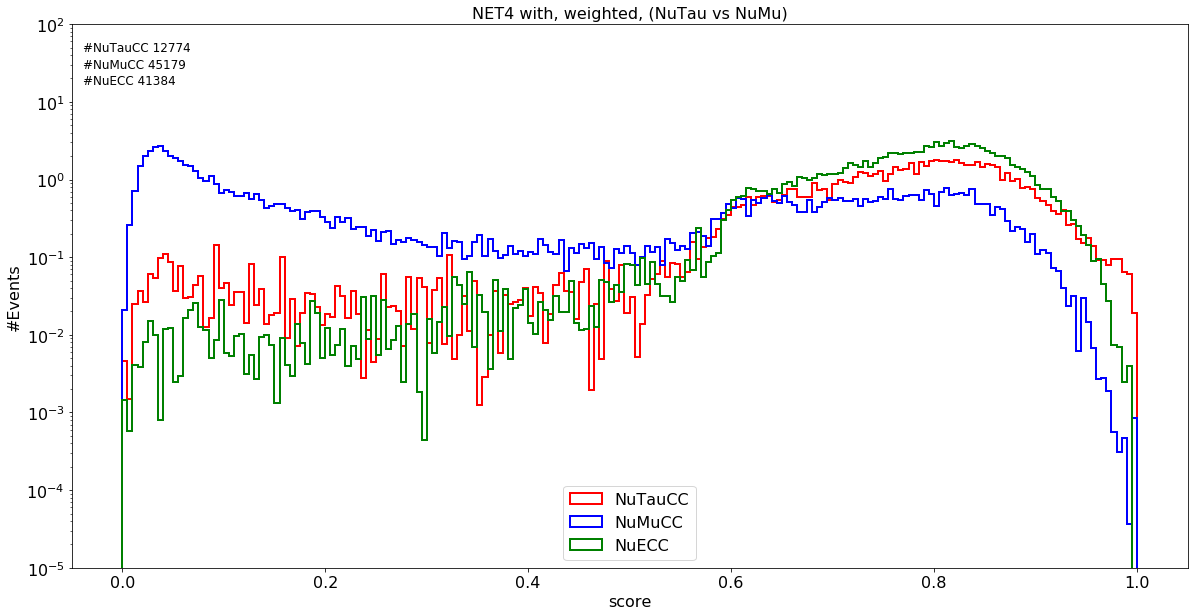

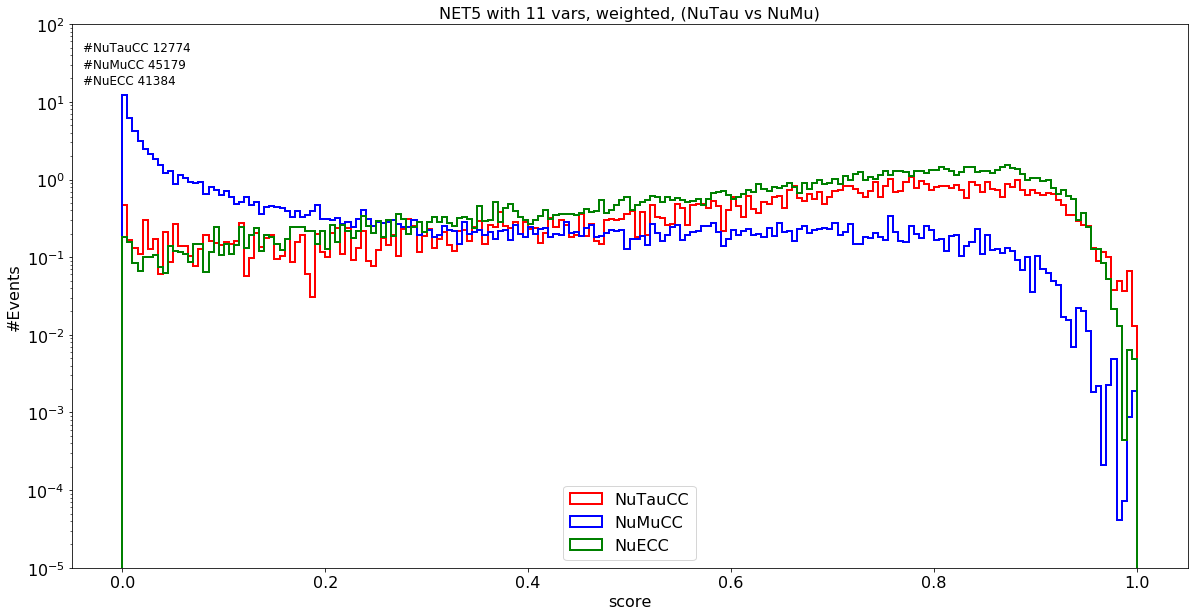

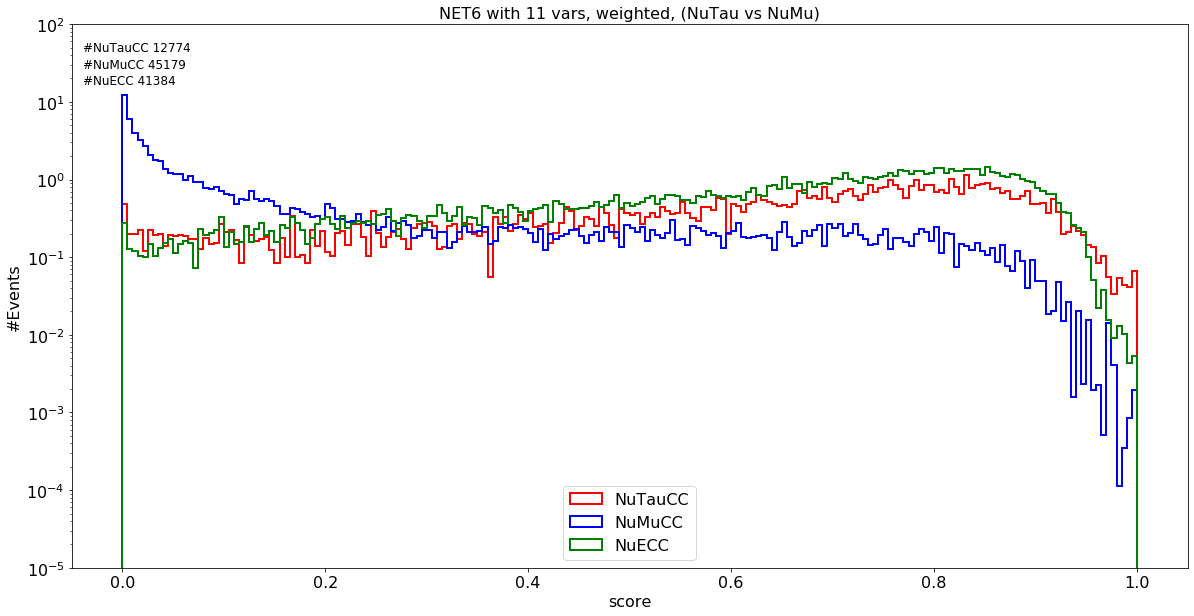

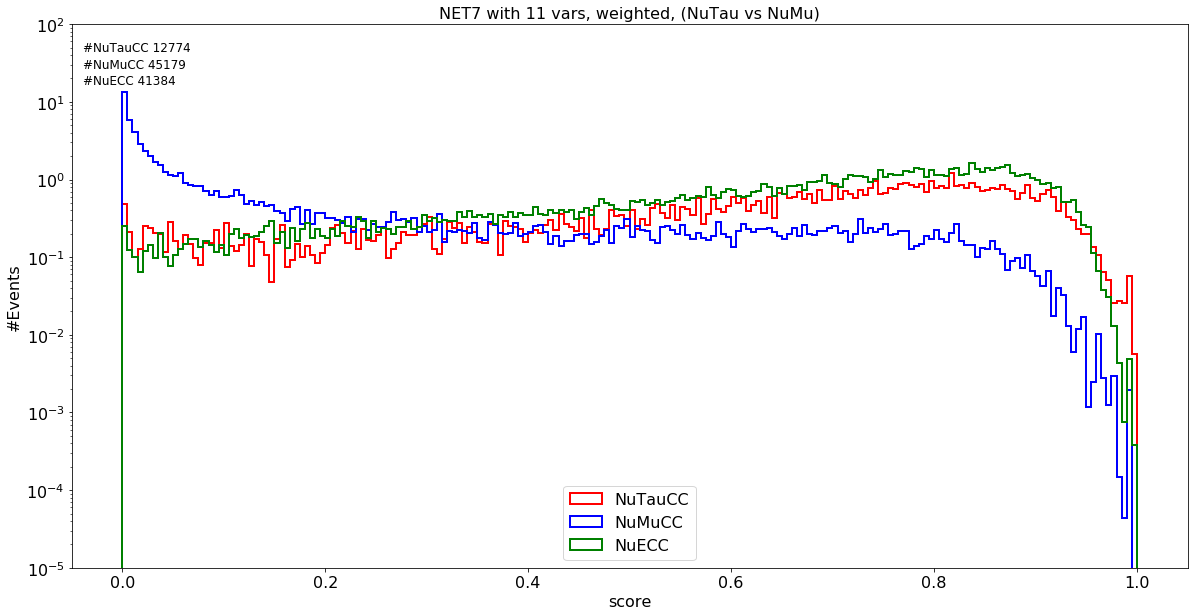

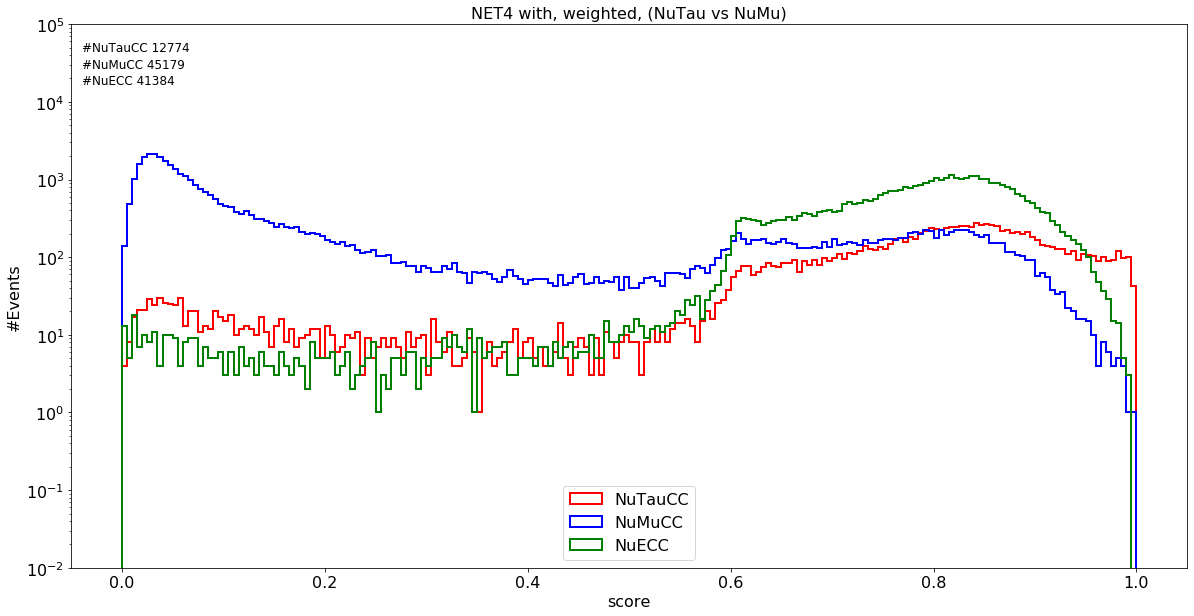

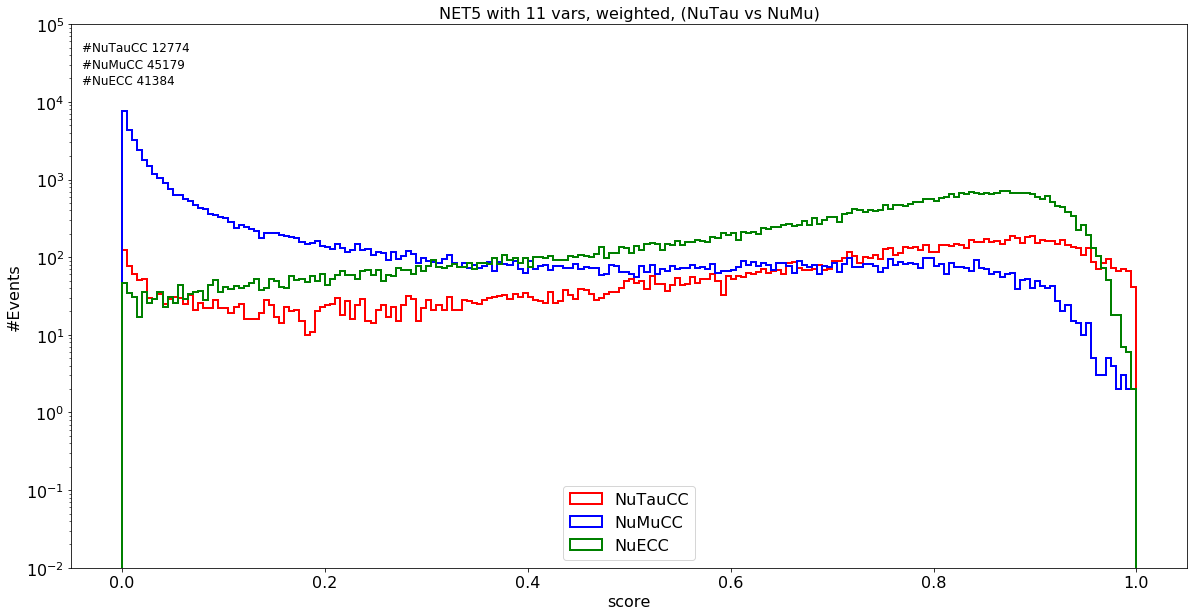

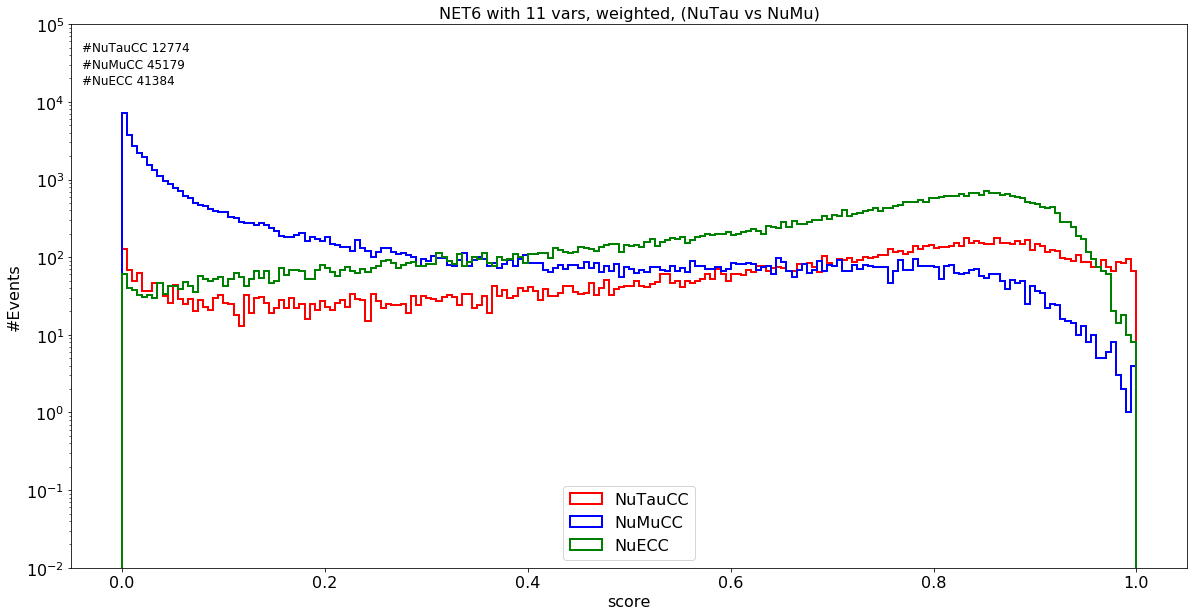

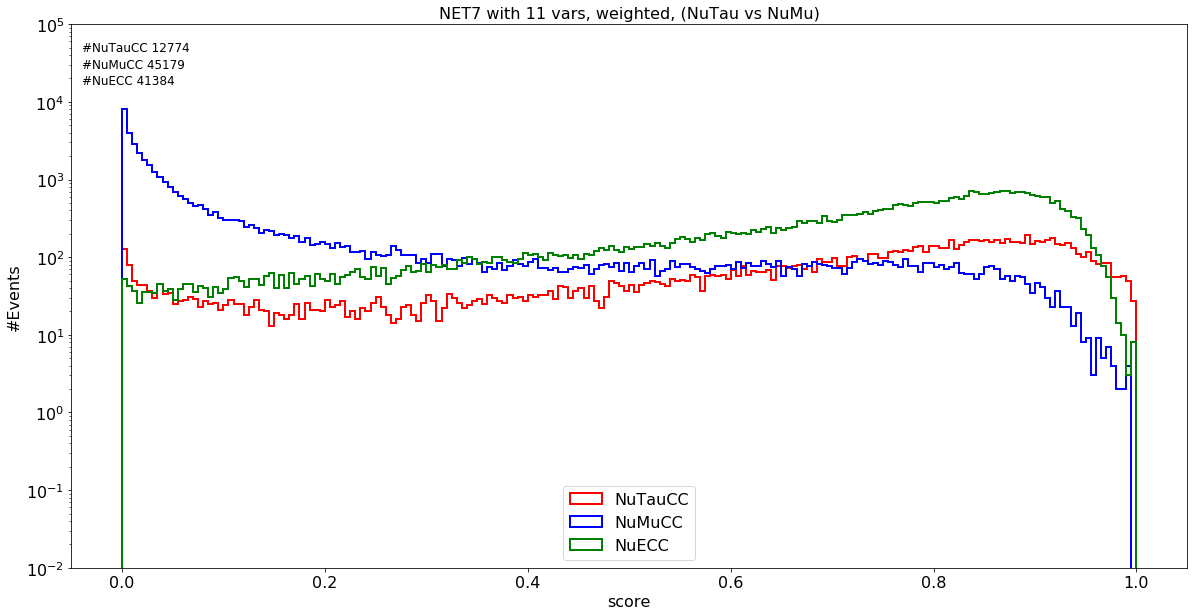

In [73]:
PlotWO("NET4 with, weighted, (NuTau vs NuMu)", "score", data_t['preds']['n4'],data_m['preds']['n4'],data_e['preds']['n4'],\
      data_t['weight_val'],data_m['weight_val'],data_e['weight_val'])
PlotWO("NET5 with 11 vars, weighted, (NuTau vs NuMu)", "score", data_t['preds']['n5'],data_m['preds']['n5'],data_e['preds']['n5'],\
      data_t['weight_val'],data_m['weight_val'],data_e['weight_val'])
PlotWO("NET6 with 11 vars, weighted, (NuTau vs NuMu)", "score", data_t['preds']['n6'],data_m['preds']['n6'],data_e['preds']['n6'],\
      data_t['weight_val'],data_m['weight_val'],data_e['weight_val'])
PlotWO("NET7 with 11 vars, weighted, (NuTau vs NuMu)", "score", data_t['preds']['n7'],data_m['preds']['n7'],data_e['preds']['n7'],\
      data_t['weight_val'],data_m['weight_val'],data_e['weight_val'])
PlotO("NET4 with, weighted, (NuTau vs NuMu)", "score", data_t['preds']['n4'],data_m['preds']['n4'],data_e['preds']['n4'])
PlotO("NET5 with 11 vars, weighted, (NuTau vs NuMu)", "score", data_t['preds']['n5'],data_m['preds']['n5'],data_e['preds']['n5'])
PlotO("NET6 with 11 vars, weighted, (NuTau vs NuMu)", "score", data_t['preds']['n6'],data_m['preds']['n6'],data_e['preds']['n6'])
PlotO("NET7 with 11 vars, weighted, (NuTau vs NuMu)", "score", data_t['preds']['n7'],data_m['preds']['n7'],data_e['preds']['n7'])

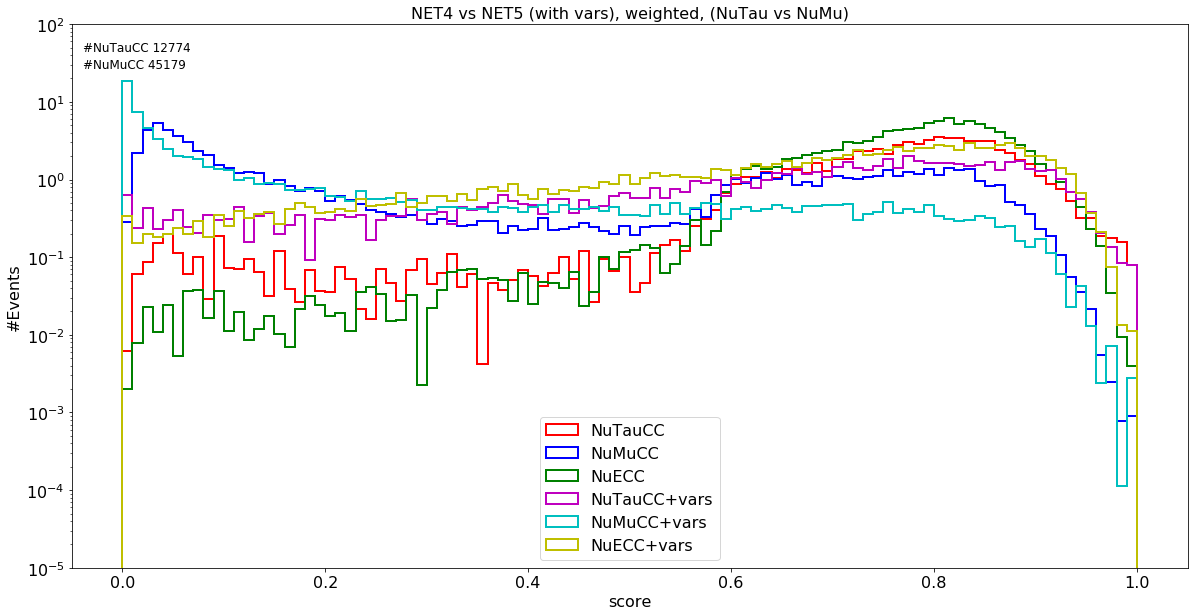

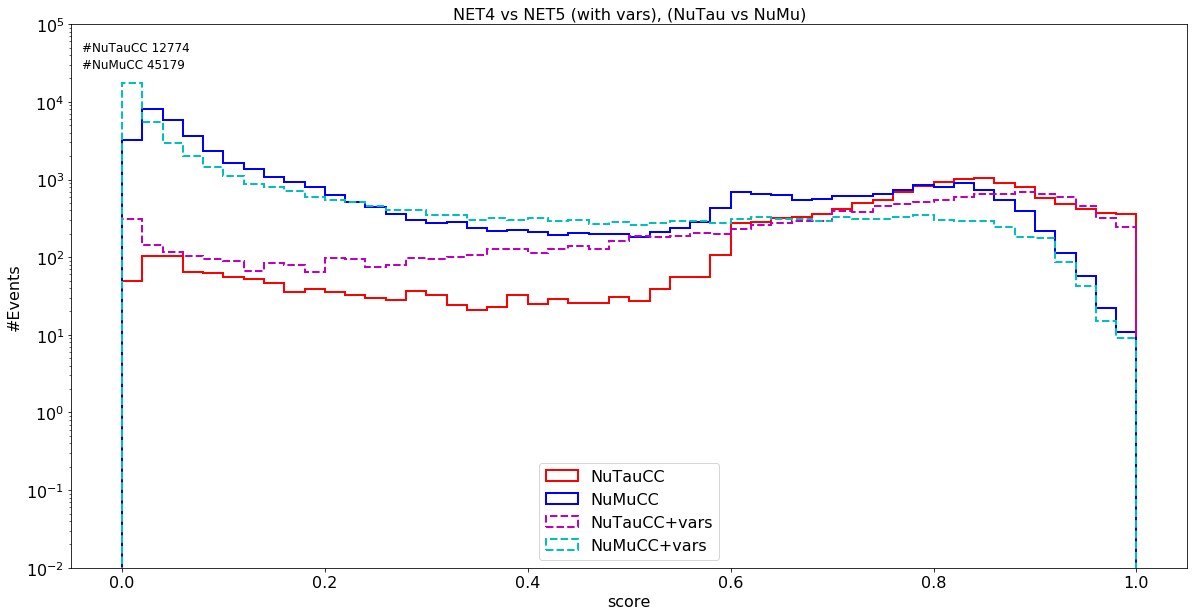

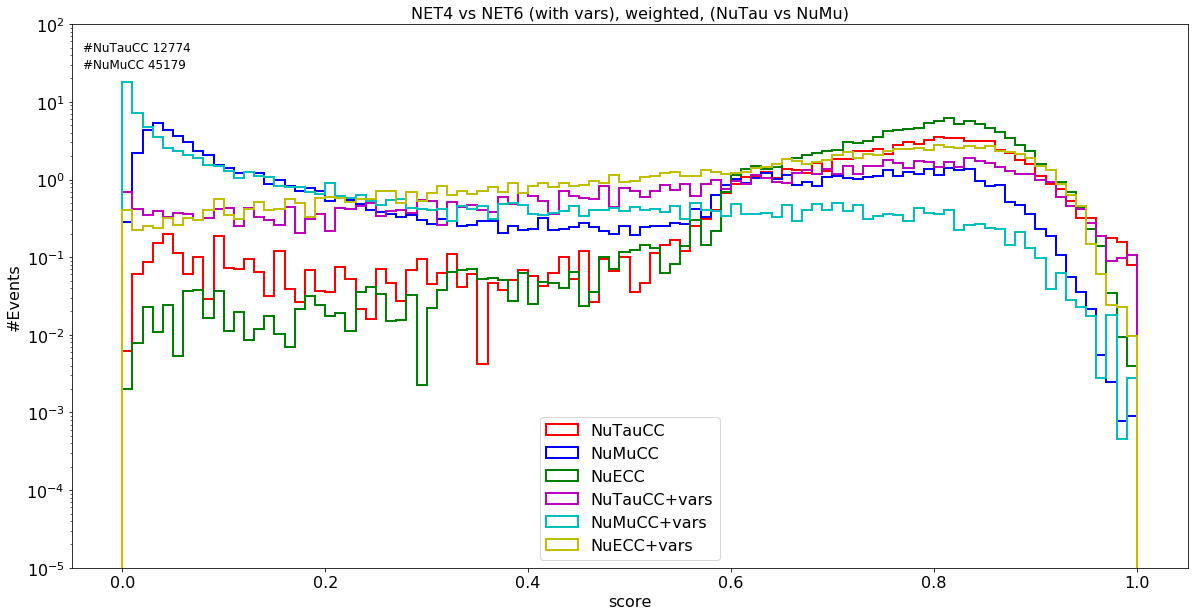

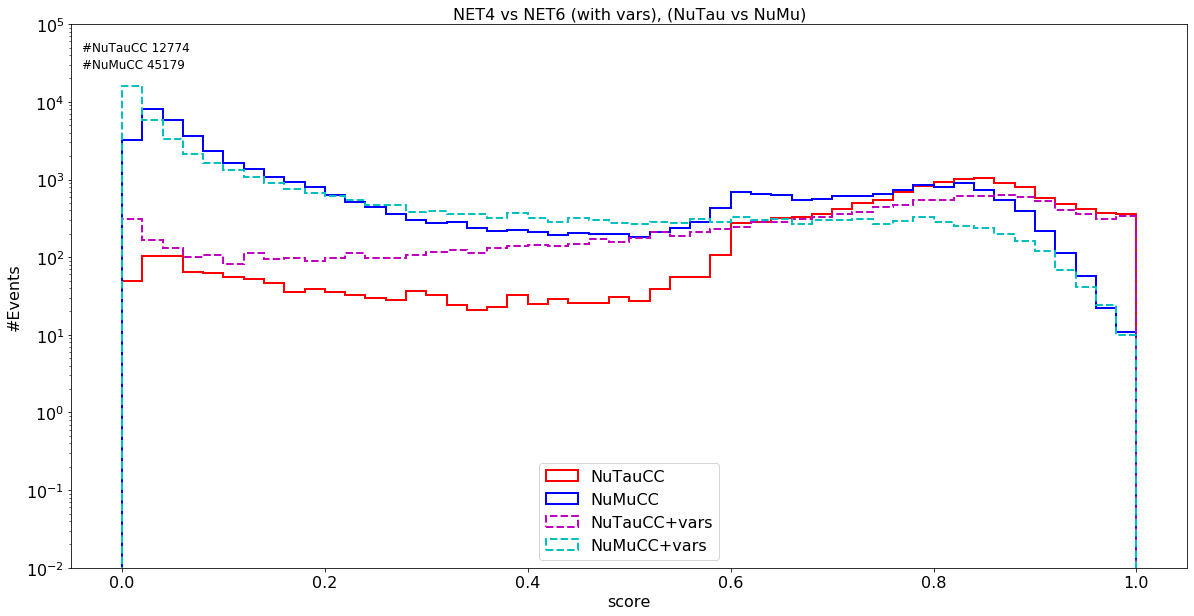

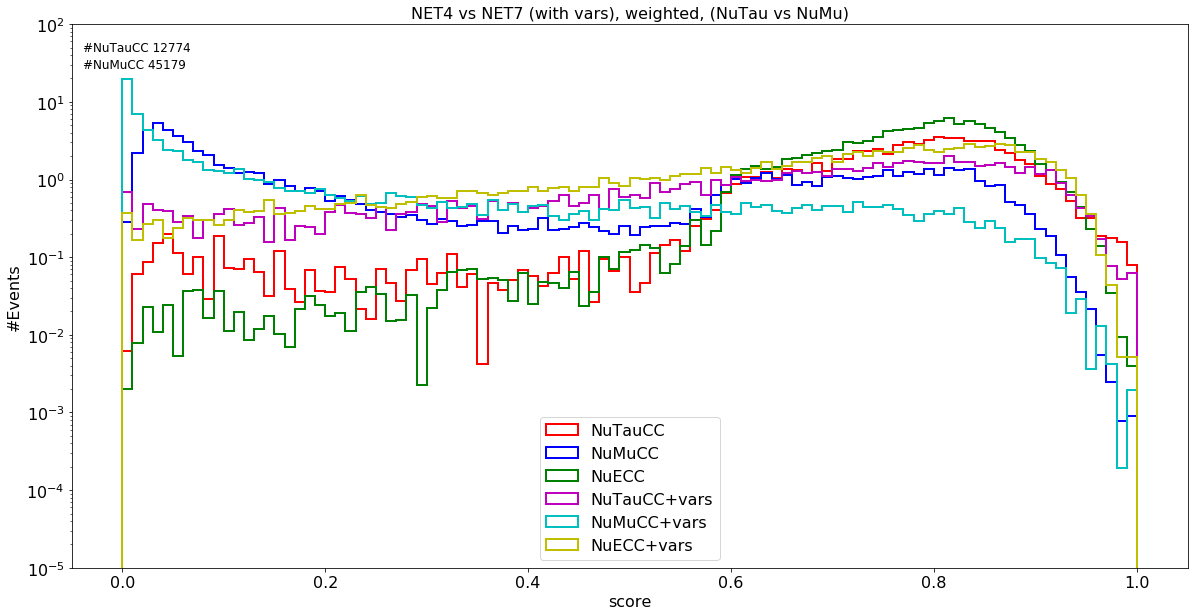

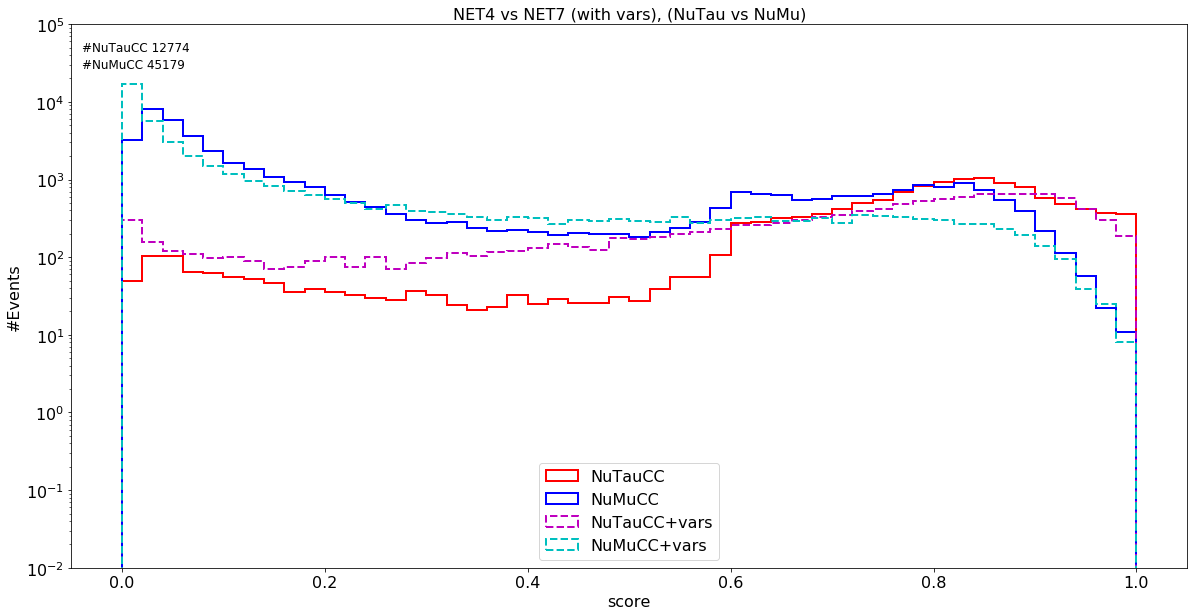

In [74]:
PlotWC("NET4 vs NET5 (with vars), weighted, (NuTau vs NuMu)", "score", data_t['preds']['n4'],data_m['preds']['n4'],data_e['preds']['n4'],\
      data_t['preds']['n5'],data_m['preds']['n5'],data_e['preds']['n5'],data_t['weight_val'],data_m['weight_val'],data_e['weight_val'])
PlotC("NET4 vs NET5 (with vars), (NuTau vs NuMu)", "score", data_t['preds']['n4'],data_m['preds']['n4'],data_e['preds']['n4'],\
      data_t['preds']['n5'],data_m['preds']['n5'],data_e['preds']['n5'])
PlotWC("NET5 vs NET6 (with vars), weighted, (NuTau vs NuMu)", "score", data_t['preds']['n5'],data_m['preds']['n5'],data_e['preds']['n5'],\
      data_t['preds']['n6'],data_m['preds']['n6'],data_e['preds']['n6'],data_t['weight_val'],data_m['weight_val'],data_e['weight_val'])
PlotC("NET5 vs NET6 (with vars), (NuTau vs NuMu)", "score", data_t['preds']['n5'],data_m['preds']['n5'],data_e['preds']['n5'],\
      data_t['preds']['n6'],data_m['preds']['n6'],data_e['preds']['n6'])
PlotWC("NET5 vs NET7 (with vars), weighted, (NuTau vs NuMu)", "score", data_t['preds']['n5'],data_m['preds']['n5'],data_e['preds']['n5'],\
      data_t['preds']['n7'],data_m['preds']['n7'],data_e['preds']['n7'],data_t['weight_val'],data_m['weight_val'],data_e['weight_val'])
PlotC("NET5 vs NET7 (with vars), (NuTau vs NuMu)", "score", data_t['preds']['n5'],data_m['preds']['n5'],data_e['preds']['n4'],\
      data_t['preds']['n7'],data_m['preds']['n7'],data_e['preds']['n7'])

In [39]:
def GetRates3(Name,cut1,cut2,net1,net2,sign1,sign2):
    
    if (sign1 == "more") and (sign1 == "more"):
        mask_t = (data_t['preds'][net1] >= cut1) & (data_t['preds'][net2] >= cut2)
        mask_m = (data_m['preds'][net1] >= cut1) & (data_m['preds'][net2] >= cut2)
        mask_e = (data_e['preds'][net1] >= cut1) & (data_e['preds'][net2] >= cut2)
    elif (sign1 == "more"):
        mask_t = (data_t['preds'][net1] >= cut1) & (data_t['preds'][net2] <= cut2)
        mask_m = (data_m['preds'][net1] >= cut1) & (data_m['preds'][net2] <= cut2)
        mask_e = (data_e['preds'][net1] >= cut1) & (data_e['preds'][net2] <= cut2)
    elif (sign2 == "more"):
        mask_t = (data_t['preds'][net1] <= cut1) & (data_t['preds'][net2] >= cut2)
        mask_m = (data_m['preds'][net1] <= cut1) & (data_m['preds'][net2] >= cut2)
        mask_e = (data_e['preds'][net1] <= cut1) & (data_e['preds'][net2] >= cut2)
     
    else:
        mask_t = (data_t['preds'][net1] <= cut1) & (data_t['preds'][net2] <= cut2)
        mask_m = (data_m['preds'][net1] <= cut1) & (data_m['preds'][net2] <= cut2)
        mask_e = (data_e['preds'][net1] <= cut1) & (data_e['preds'][net2] <= cut2)
       

    rate_t = np.sum(data_t['weight_val'][mask_t]) 
    rate_m = np.sum(data_m['weight_val'][mask_m]) 
    rate_e = np.sum(data_e['weight_val'][mask_e])
   
    rate_t_err = np.sqrt(np.sum(np.square(data_t['weight_val'][mask_t]))) 
    rate_m_err = np.sqrt(np.sum(np.square(data_m['weight_val'][mask_m])))
    rate_e_err = np.sqrt(np.sum(np.square(data_e['weight_val'][mask_e])))
    
    print(Name)
  
    print("NuTauCC = {0:.3f} +/- {1:.3f}".format(rate_t,rate_t_err))
    print("NuMuCC =  {0:.3f} +/- {1:.3f}".format(rate_m,rate_m_err))
    print("NuECC =   {0:.3f} +/- {1:.3f}".format(rate_e,rate_e_err))
 


In [9]:
def GetRatesCut(Name,cut1,cut2,net1,net2,sign1,sign2,mask1,mask2,mask3):
    
    if (sign1 == "more") and (sign1 == "more"):
        mask_t = (data_t['preds'][net1] >= cut1) & (data_t['preds'][net2] >= cut2) & mask1
        mask_m = (data_m['preds'][net1] >= cut1) & (data_m['preds'][net2] >= cut2) & mask2
        mask_e = (data_e['preds'][net1] >= cut1) & (data_e['preds'][net2] >= cut2) & mask3
    elif (sign1 == "more"):
        mask_t = (data_t['preds'][net1] >= cut1) & (data_t['preds'][net2] <= cut2) & mask1
        mask_m = (data_m['preds'][net1] >= cut1) & (data_m['preds'][net2] <= cut2) & mask2
        mask_e = (data_e['preds'][net1] >= cut1) & (data_e['preds'][net2] <= cut2) & mask3
    elif (sign2 == "more"):
        mask_t = (data_t['preds'][net1] <= cut1) & (data_t['preds'][net2] >= cut2) & mask1
        mask_m = (data_m['preds'][net1] <= cut1) & (data_m['preds'][net2] >= cut2) & mask2
        mask_e = (data_e['preds'][net1] <= cut1) & (data_e['preds'][net2] >= cut2) & mask3
     
    else:
        mask_t = (data_t['preds'][net1] <= cut1) & (data_t['preds'][net2] <= cut2) & mask1
        mask_m = (data_m['preds'][net1] <= cut1) & (data_m['preds'][net2] <= cut2) & mask2
        mask_e = (data_e['preds'][net1] <= cut1) & (data_e['preds'][net2] <= cut2) & mask3
       

    rate_t = np.sum(data_t['weight_val'][mask_t]) 
    rate_m = np.sum(data_m['weight_val'][mask_m]) 
    rate_e = np.sum(data_e['weight_val'][mask_e])
   
    rate_t_err = np.sqrt(np.sum(np.square(data_t['weight_val'][mask_t]))) 
    rate_m_err = np.sqrt(np.sum(np.square(data_m['weight_val'][mask_m])))
    rate_e_err = np.sqrt(np.sum(np.square(data_e['weight_val'][mask_e])))
    
    print(Name)
  
    print("NuTauCC = {0:.3f} +/- {1:.3f}".format(rate_t,rate_t_err))
    print("NuMuCC =  {0:.3f} +/- {1:.3f}".format(rate_m,rate_m_err))
    print("NuECC =   {0:.3f} +/- {1:.3f}".format(rate_e,rate_e_err))
 

In [10]:
cut1 =0.99
cut2 = 0.7
cut_ll = -0.1
cut_r = 0.17
mask_t = (data_t['preds']["n1"] >= cut1) & (data_t['preds']['n4'] >= cut2)
mask_m = (data_m['preds']['n1'] >= cut1) & (data_m['preds']['n4'] >= cut2)
mask_e = (data_e['preds']['n1'] >= cut1) & (data_e['preds']['n4'] >= cut2)

mask_lt =  (data_t['logan_veto']['SPE_rlogl']-data_t['logan_veto']['Cascade_rlogl'] >= cut_ll)
mask_lm =  (data_m['logan_veto']['SPE_rlogl']-data_m['logan_veto']['Cascade_rlogl'] >= cut_ll)
mask_le =  (data_e['logan_veto']['SPE_rlogl']-data_e['logan_veto']['Cascade_rlogl'] >= cut_ll)

mask_rt = (data_t['ti'][:,1] >= cut_r)
mask_rm = (data_m['ti'][:,1] >= cut_r)
mask_re = (data_e['ti'][:,1] >= cut_r)

mask_rts = mask_t & mask_rt
mask_rms = mask_m & mask_rm
mask_res = mask_e & mask_re

mask_lts = mask_t & mask_lt
mask_lms = mask_m & mask_lm
mask_les = mask_e & mask_le

In [11]:
print(data_t[(data_t['id']['event_id']==680) & (data_t['id']['run_id']==153)]['weight_val'])
print(data_t[(data_t['id']['event_id']==680) & (data_t['id']['run_id']==153)]['preds']['n1'])
print(data_t[(data_t['id']['event_id']==680) & (data_t['id']['run_id']==153)]['preds']['n4'])


[]
[]
[]


In [80]:
GetRates3("Rates after NET1 and NET3",0.99,0.7,"n1","n4","more","more")
GetRates3("Rates after NET1 and NET5",0.99,0.68,"n1","n5","more","more")
GetRates3("Rates after NET1 and NET6",0.99,0.7,"n1","n6","more","more")
GetRates3("Rates after NET1 and NET7",0.99,0.64,"n1","n7","more","more")

GetRatesCut("Rates after NET1 and NET3 + ll cut",0.99,0.5,"n1","n4","more","more",mask_lt,mask_lm,mask_le)
GetRatesCut("Rates after NET1 and NET3 + ratio cut",0.99,0.7,"n1","n4","more","more",mask_rt,mask_rm,mask_re)
GetRatesCut("Rates after NET1 and NET3 + both cut",0.99,0.7,"n1","n4","more","more",mask_rt & mask_lt,mask_rm & mask_lm,mask_re & mask_le)


Rates after NET1 and NET3
NuTauCC = 0.995 +/- 0.055
NuMuCC =  0.156 +/- 0.025
NuECC =   0.023 +/- 0.008
Rates after NET1 and NET5
NuTauCC = 0.993 +/- 0.055
NuMuCC =  0.067 +/- 0.012
NuECC =   0.024 +/- 0.008
Rates after NET1 and NET6
NuTauCC = 0.997 +/- 0.055
NuMuCC =  0.111 +/- 0.021
NuECC =   0.021 +/- 0.007
Rates after NET1 and NET7
NuTauCC = 0.989 +/- 0.055
NuMuCC =  0.102 +/- 0.019
NuECC =   0.024 +/- 0.008
Rates after NET1 and NET3 + ll cut
NuTauCC = 0.994 +/- 0.056
NuMuCC =  0.059 +/- 0.014
NuECC =   0.026 +/- 0.009
Rates after NET1 and NET3 + ratio cut
NuTauCC = 0.951 +/- 0.053
NuMuCC =  0.047 +/- 0.008
NuECC =   0.017 +/- 0.007
Rates after NET1 and NET3 + both cut
NuTauCC = 0.900 +/- 0.052
NuMuCC =  0.018 +/- 0.004
NuECC =   0.016 +/- 0.007


In [63]:
def Plot(Name,Label,data_t,data_m,data_e,xscale='linear',b =100,r =[0,1000], loc = 8):
    fig = plt.figure(figsize=(20, 10),facecolor ='w')
    ax = fig.add_subplot(121)
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
   
    #ax.set_xscale(xscale)
    #ax.set_yscale('log')
    ax.set_title(Name, fontsize = 16)
    ax.text(0.01,0.74,'#EventsT '+str(len(data_t)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.84,'#EventsM '+str(len(data_m)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.94,'#EventsE '+str(len(data_e)), transform=ax.transAxes, color = "black",fontsize=12)

    ax.set_xlabel(Label, fontsize = 16)                                                              
    ax.set_ylabel("#Events", fontsize = 16)                                                   
    ax.hist(data_t, bins =b, histtype = 'step',edgecolor ='r', lw =2, range =r, label = "NuTauCC")  
    ax.hist(data_m, bins =b, histtype = 'step',edgecolor ='b', lw =2, range =r, label = "NuMuCC")  
    ax.hist(data_e, bins =b, histtype = 'step',edgecolor ='g', lw =2, range =r, label = "NuECC")  
    
    ax2 = fig.add_subplot(122)
    weights_t = np.ones(data_t.shape[0])/data_t.shape[0]
    weights_m = np.ones(data_m.shape[0])/data_m.shape[0]
    weights_e = np.ones(data_e.shape[0])/data_e.shape[0]

    #ax.set_xscale(xscale)
    #ax.set_yscale('log')
    ax2.set_title(Name, fontsize = 16)
    ax2.text(0.01,0.74,'#EventsT '+str(len(data_t)), transform=ax.transAxes, color = "black",fontsize=12)
    ax2.text(0.01,0.84,'#EventsM '+str(len(data_m)), transform=ax.transAxes, color = "black",fontsize=12)
    ax2.text(0.01,0.94,'#EventsE '+str(len(data_e)), transform=ax.transAxes, color = "black",fontsize=12)

    ax2.set_xlabel(Label, fontsize = 16)                                                              
    ax2.set_ylabel("#Frequency", fontsize = 16)                                                   
    ax2.hist(data_t, bins =b, weights = weights_t, histtype = 'step',edgecolor ='r',ls = '-', lw =2, range =r, label = "NuTauCC")  
    ax2.hist(data_m, bins =b, weights = weights_m, histtype = 'step',edgecolor ='b',ls = '-', lw =2, range =r, label = "NuMuCC")  
    ax2.hist(data_e, bins =b, weights = weights_e, histtype = 'step',edgecolor ='g',ls = '-', lw =2, range =r, label = "NuECC")  
    
    plt.legend()
    plt.show()


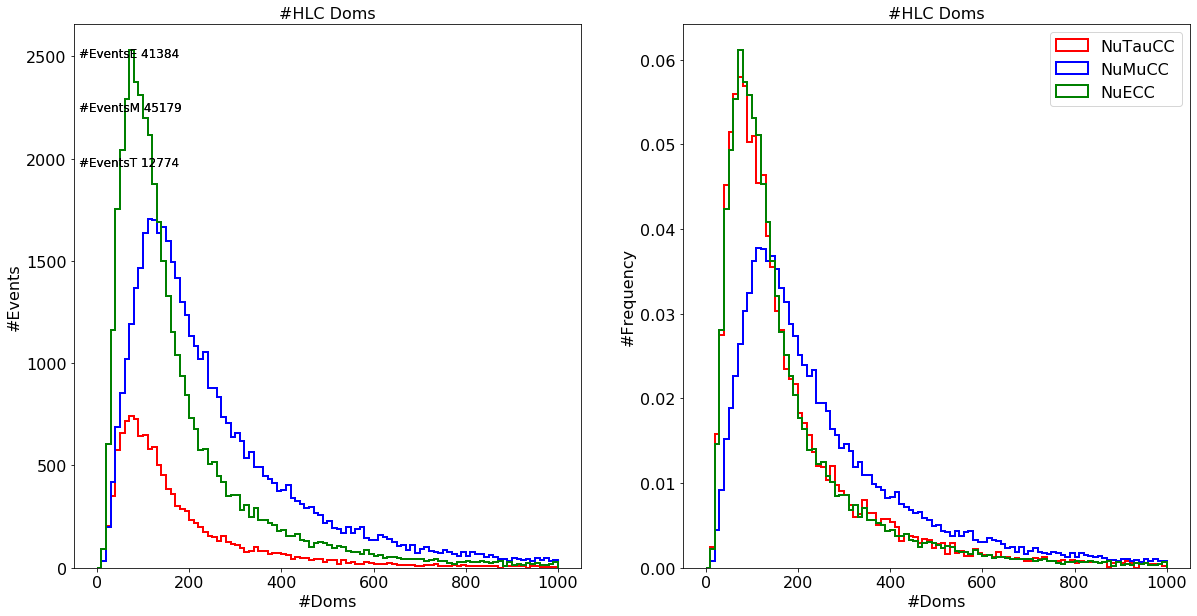

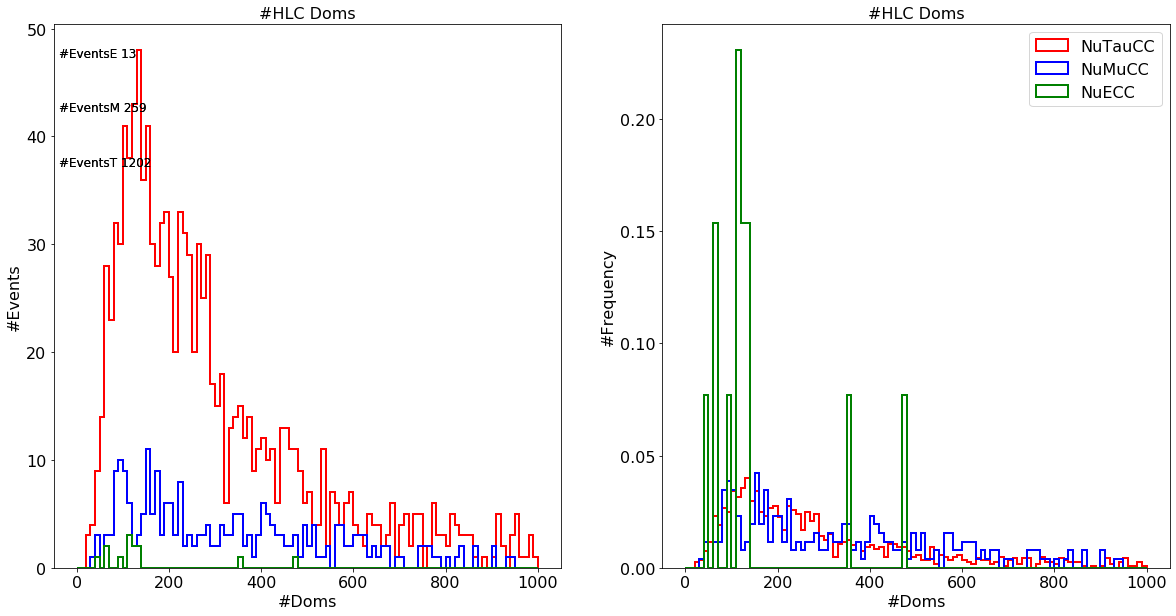

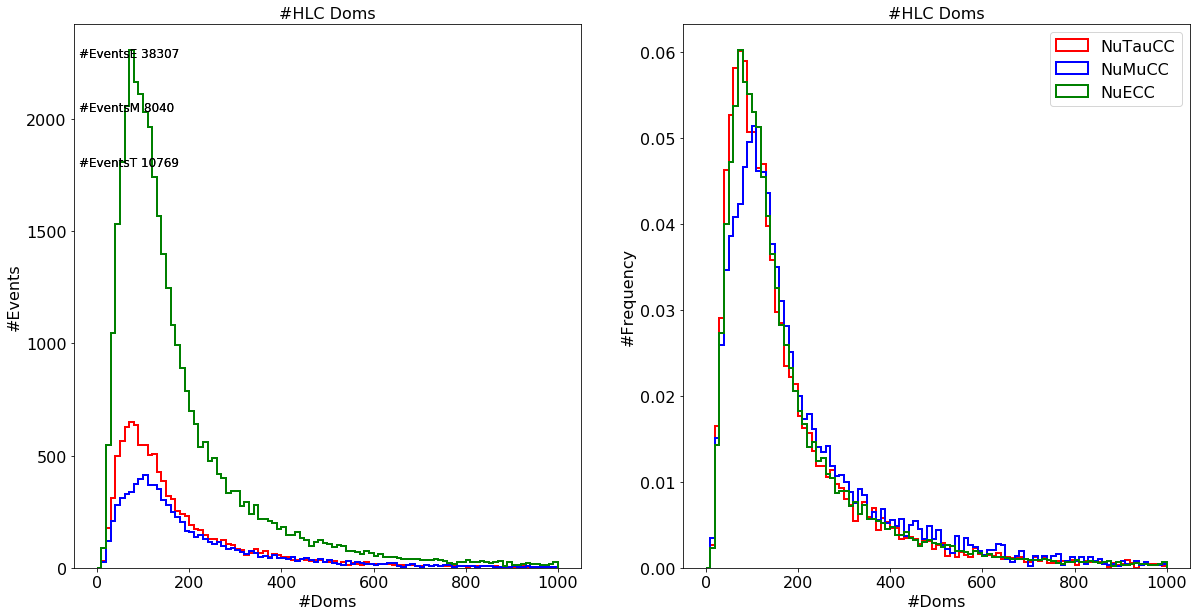

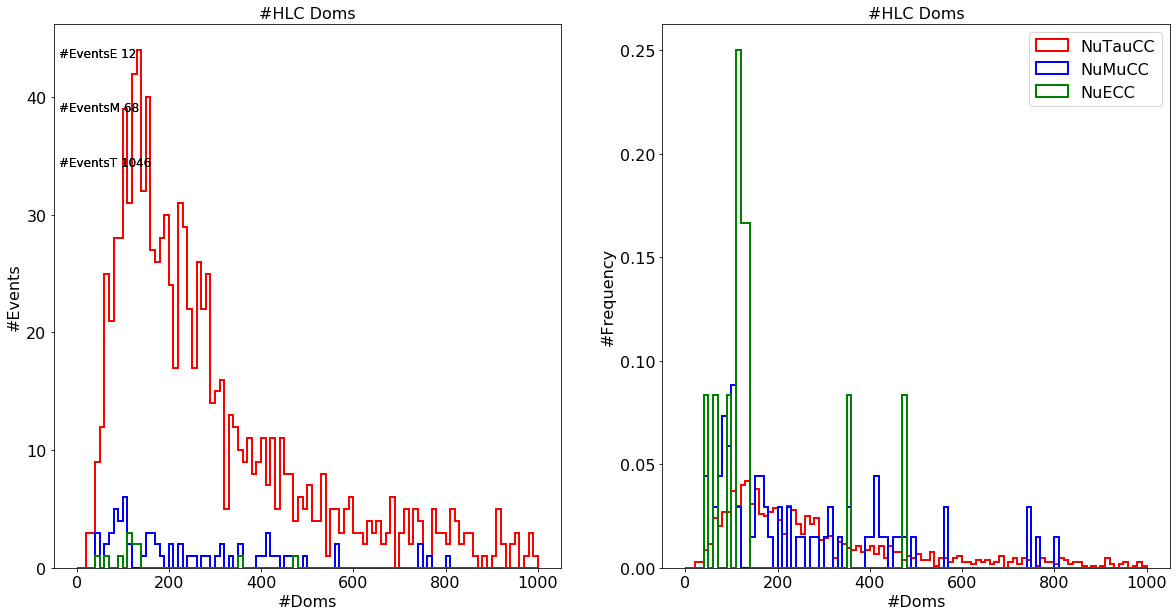

In [64]:
Plot("#HLC Doms","#Doms",data_t['map']['hlc'],data_m['map']['hlc'],data_e['map']['hlc'])
Plot("#HLC Doms","#Doms",data_t[mask_t]['map']['hlc'],data_m[mask_m]['map']['hlc'],data_e[mask_e]['map']['hlc'])
Plot("#HLC Doms","#Doms",data_t[mask_lt]['map']['hlc'],data_m[mask_lm]['map']['hlc'],data_e[mask_le]['map']['hlc'])
Plot("#HLC Doms","#Doms",data_t[mask_lts]['map']['hlc'],data_m[mask_lms]['map']['hlc'],data_e[mask_les]['map']['hlc'])

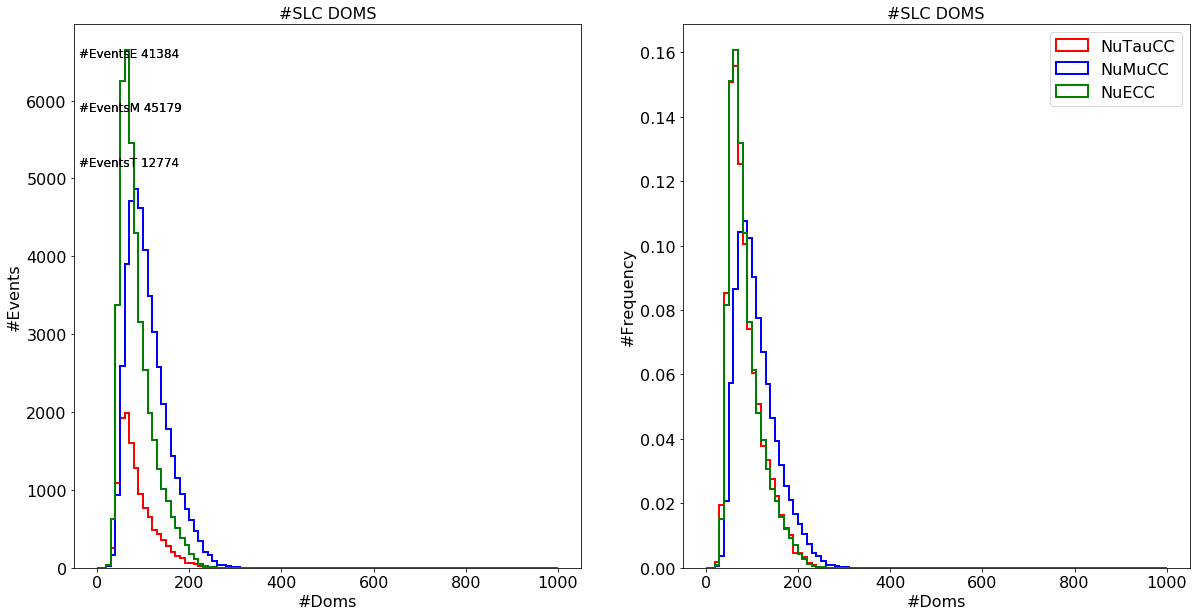

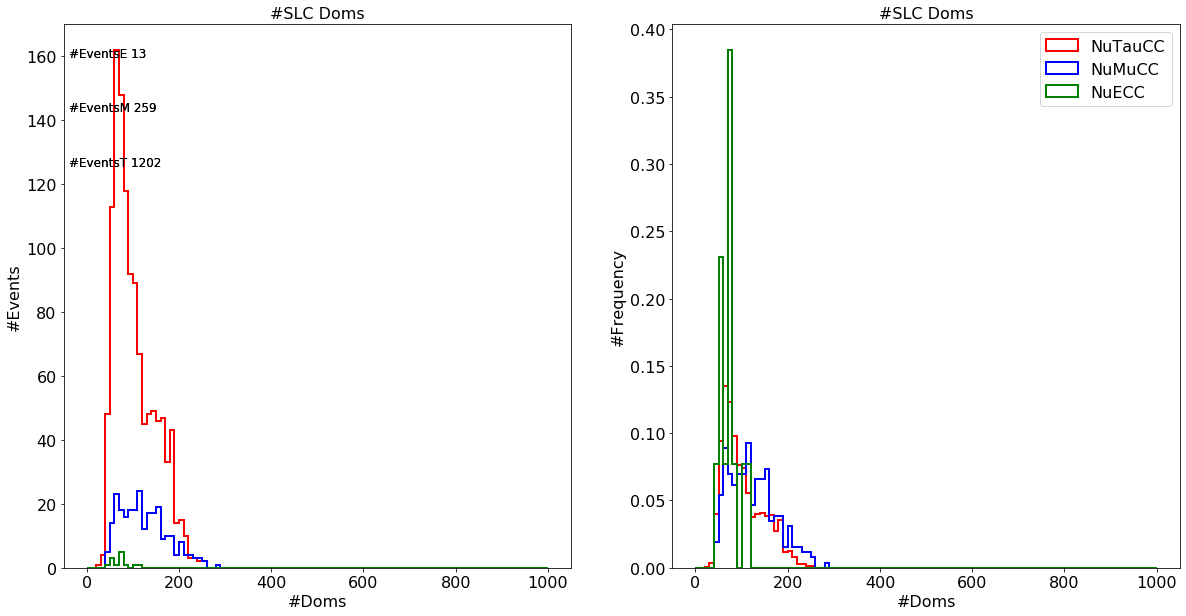

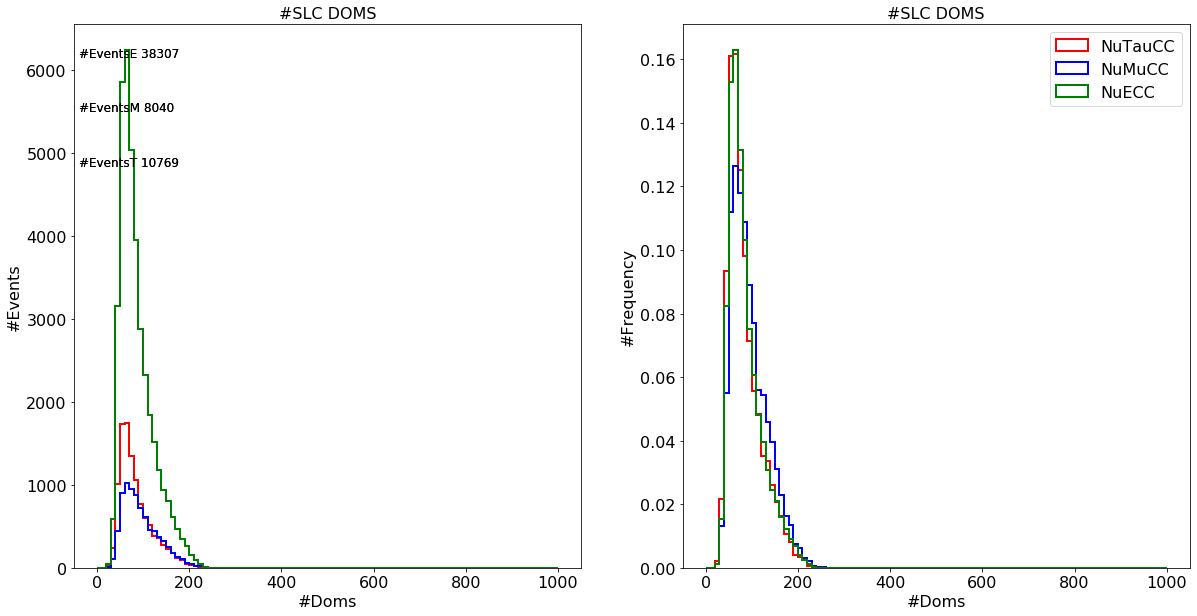

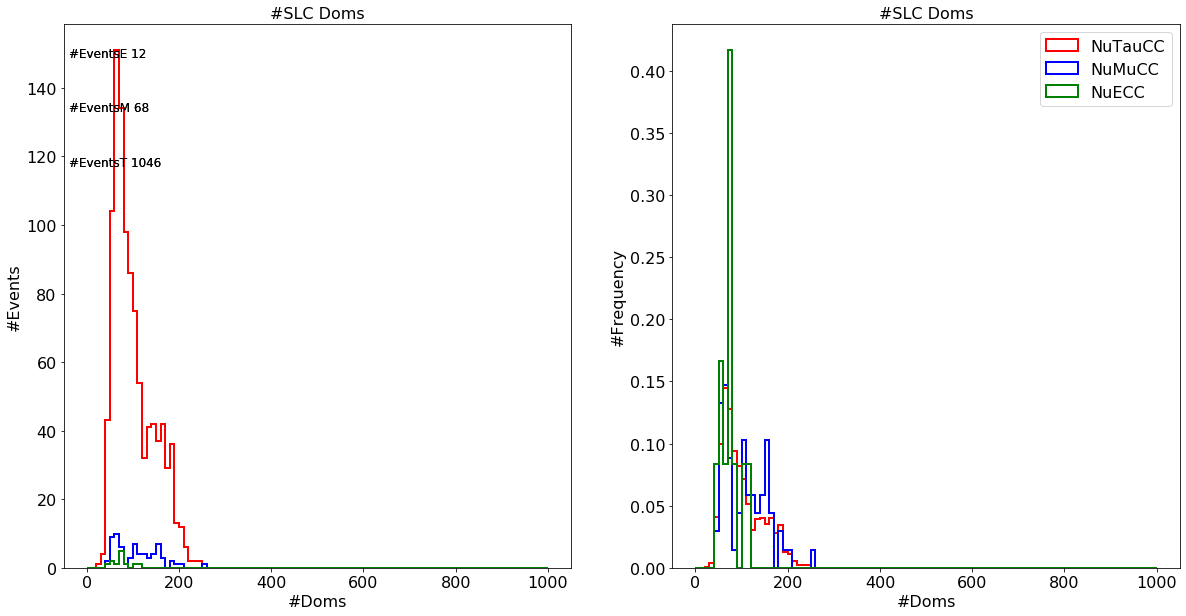

In [65]:
Plot("#SLC DOMS","#Doms",data_t['map']['slc'],data_m['map']['slc'],data_e['map']['slc'])
Plot("#SLC Doms","#Doms",data_t[mask_t]['map']['slc'],data_m[mask_m]['map']['slc'],data_e[mask_e]['map']['slc'])
Plot("#SLC DOMS","#Doms",data_t[mask_lt]['map']['slc'],data_m[mask_lm]['map']['slc'],data_e[mask_le]['map']['slc'])
Plot("#SLC Doms","#Doms",data_t[mask_lts]['map']['slc'],data_m[mask_lms]['map']['slc'],data_e[mask_les]['map']['slc'])

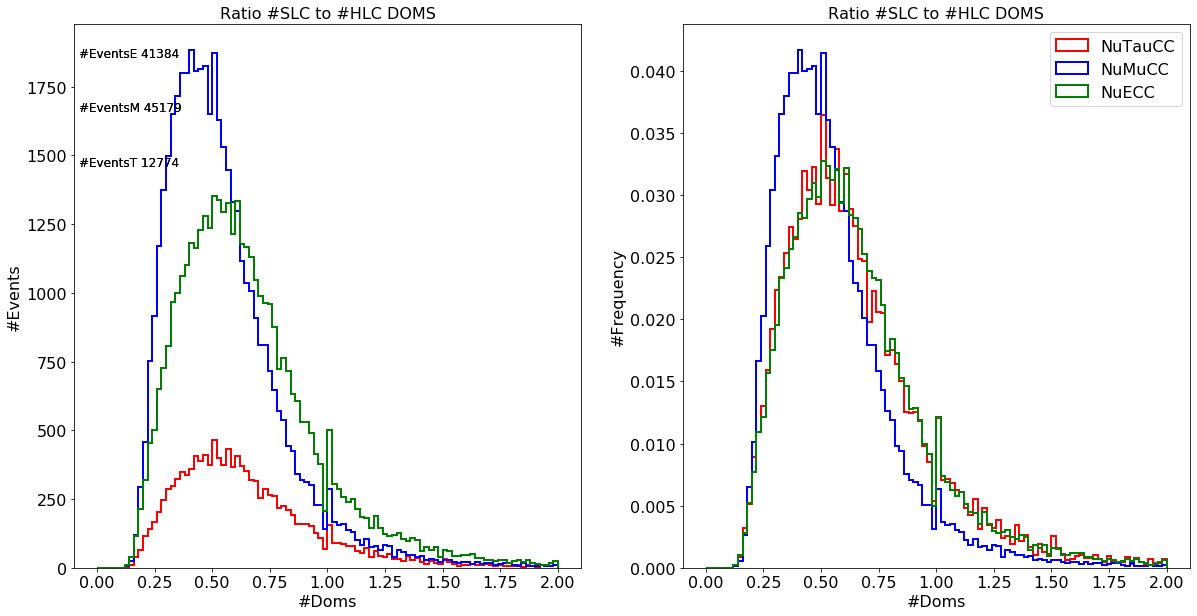

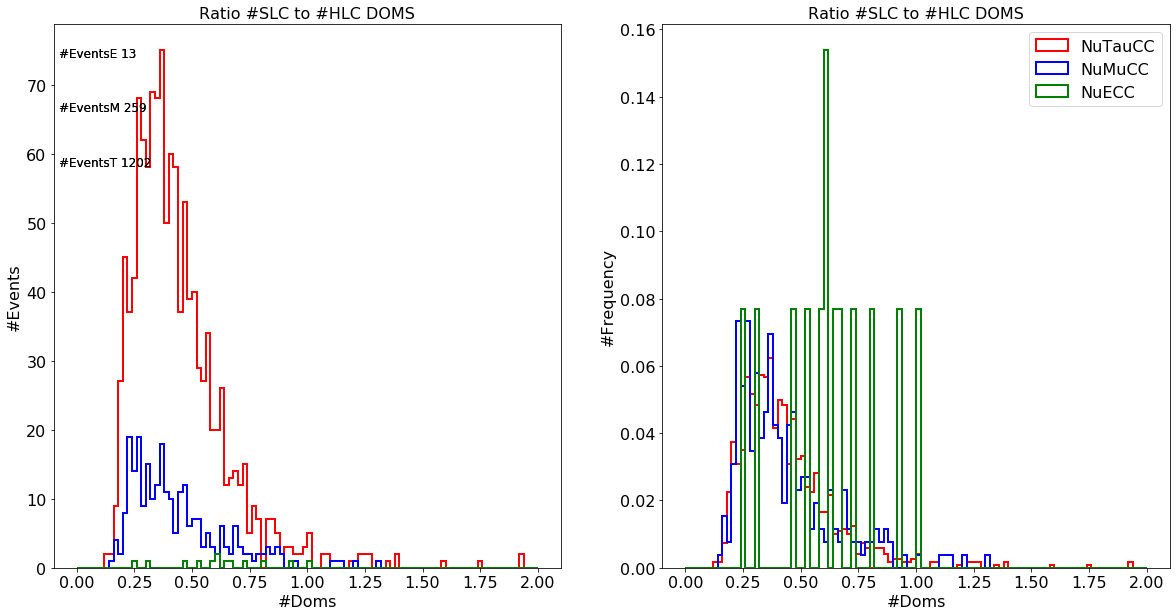

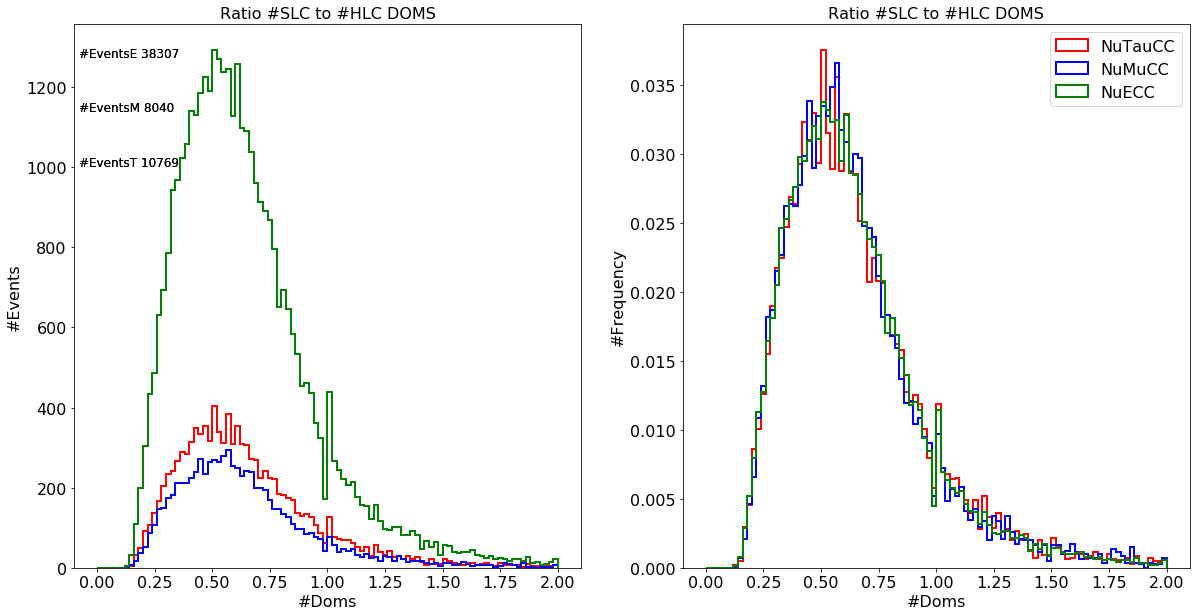

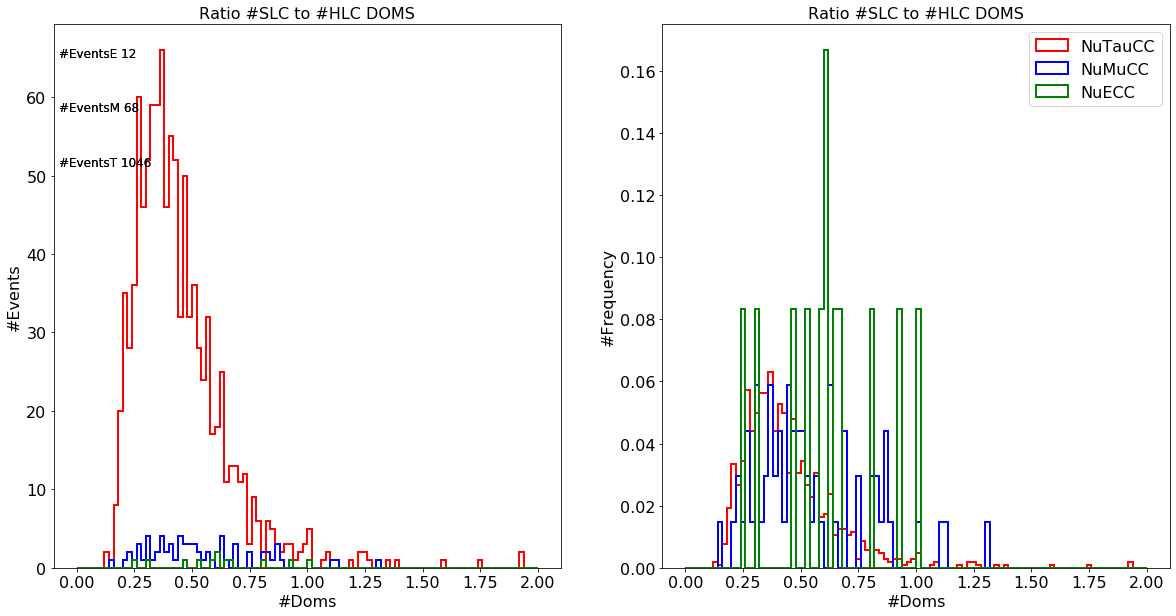

In [66]:
Plot("Ratio #SLC to #HLC DOMS","#Doms",data_t['map']['slc']/data_t['map']['hlc'],data_m['map']['slc']/data_m['map']['hlc'],data_e['map']['slc']/data_e['map']['hlc'], r=[0,2])
Plot("Ratio #SLC to #HLC DOMS","#Doms",data_t[mask_t]['map']['slc']/data_t[mask_t]['map']['hlc'],data_m[mask_m]['map']['slc']/data_m[mask_m]['map']['hlc'],data_e[mask_e]['map']['slc']/data_e[mask_e]['map']['hlc'], r=[0,2])
Plot("Ratio #SLC to #HLC DOMS","#Doms",data_t[mask_lt]['map']['slc']/data_t[mask_lt]['map']['hlc'],data_m[mask_lm]['map']['slc']/data_m[mask_lm]['map']['hlc'],data_e[mask_le]['map']['slc']/data_e[mask_le]['map']['hlc'], r=[0,2])
Plot("Ratio #SLC to #HLC DOMS","#Doms",data_t[mask_lts]['map']['slc']/data_t[mask_lts]['map']['hlc'],data_m[mask_lms]['map']['slc']/data_m[mask_lms]['map']['hlc'],data_e[mask_les]['map']['slc']/data_e[mask_les]['map']['hlc'], r=[0,2])

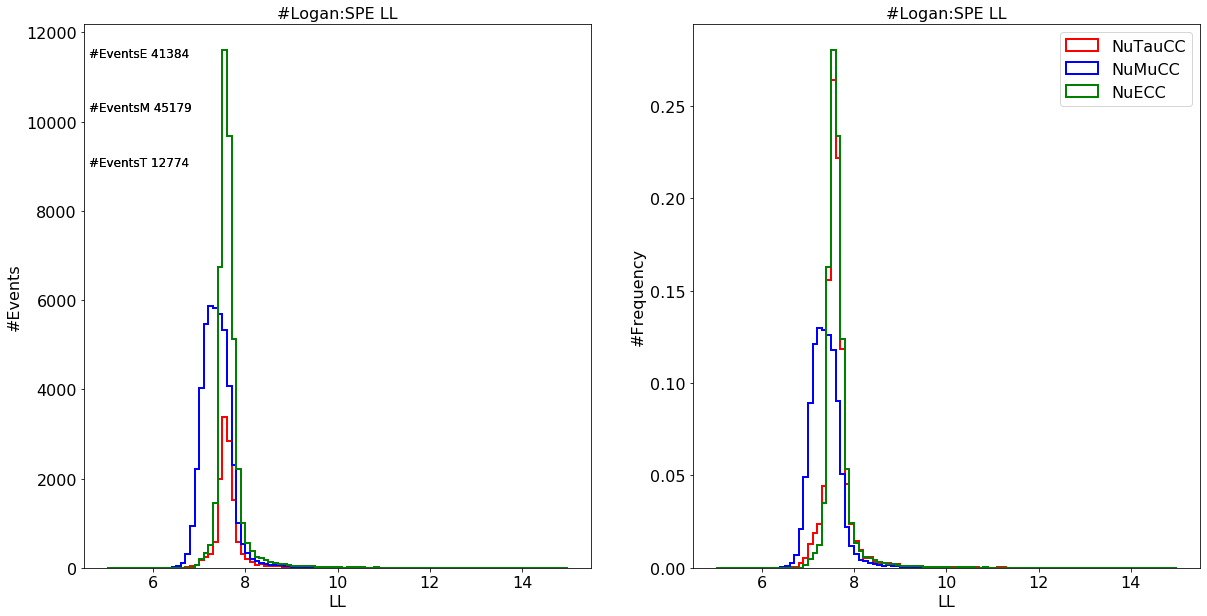

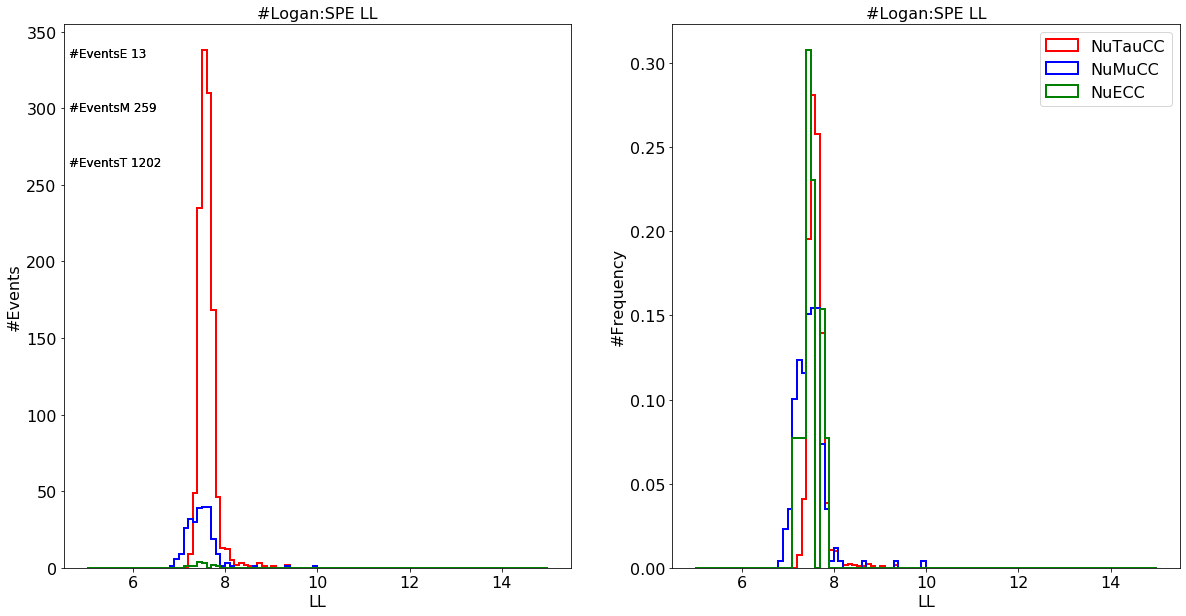

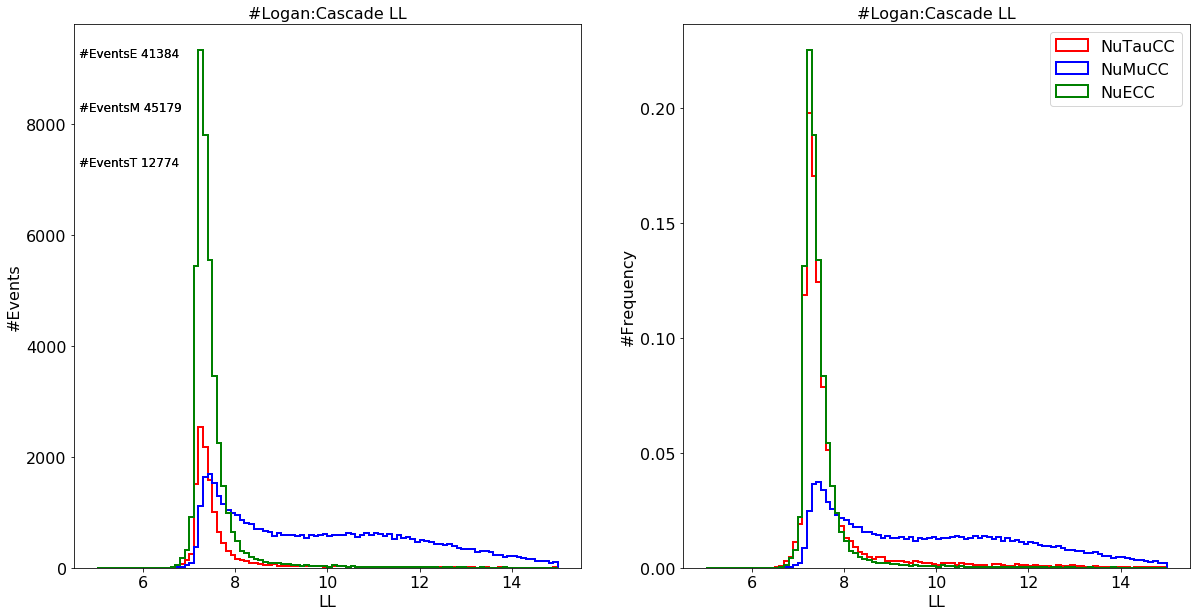

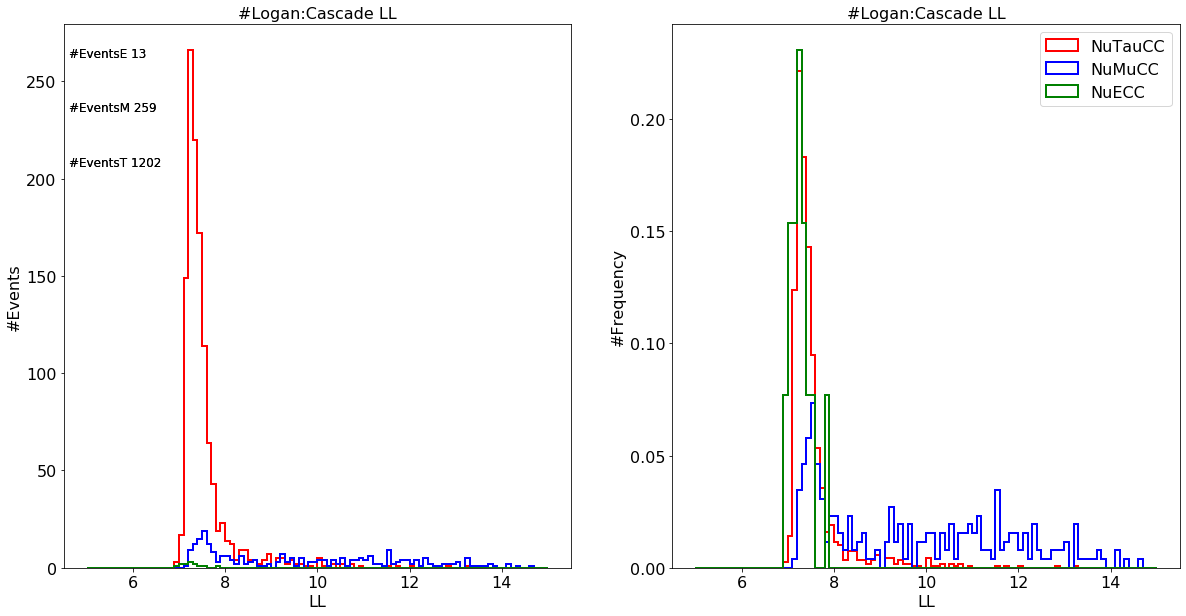

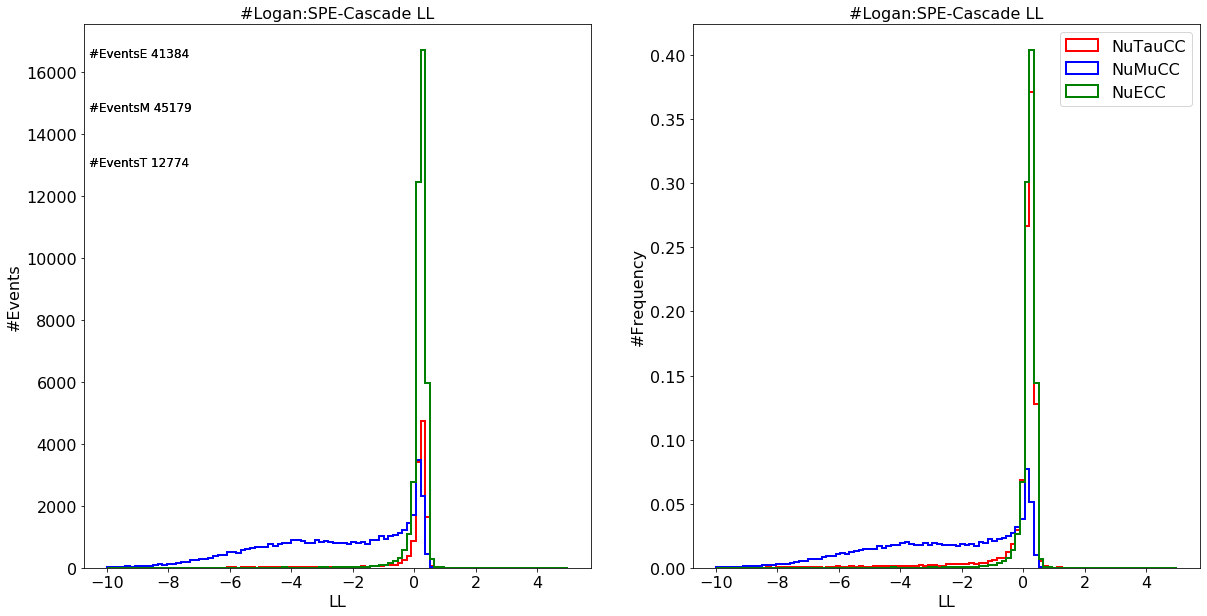

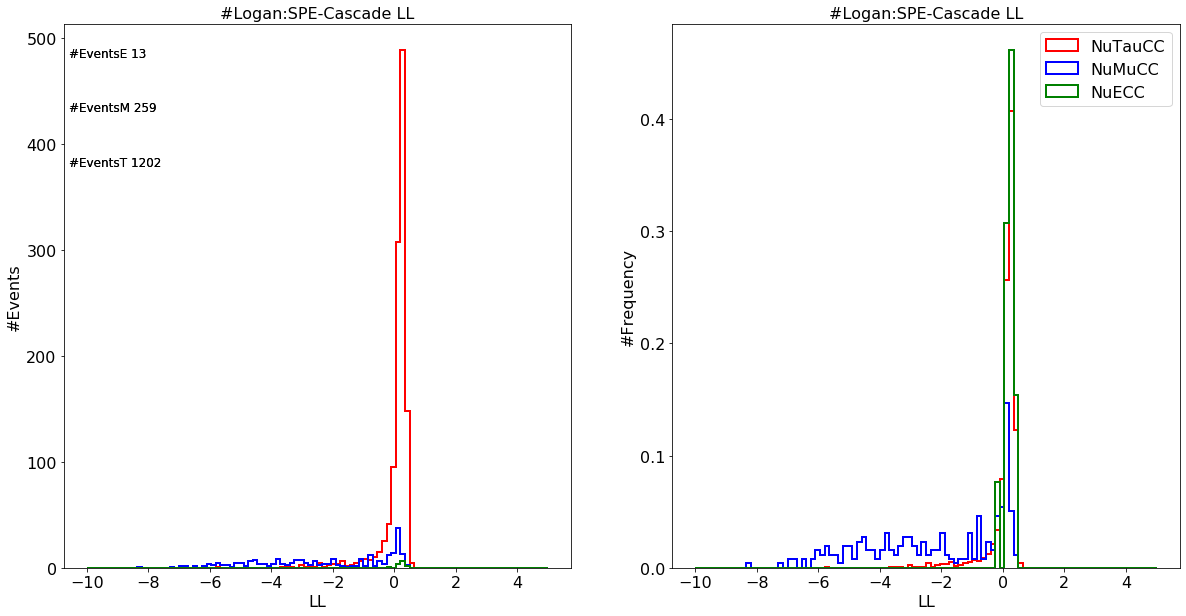

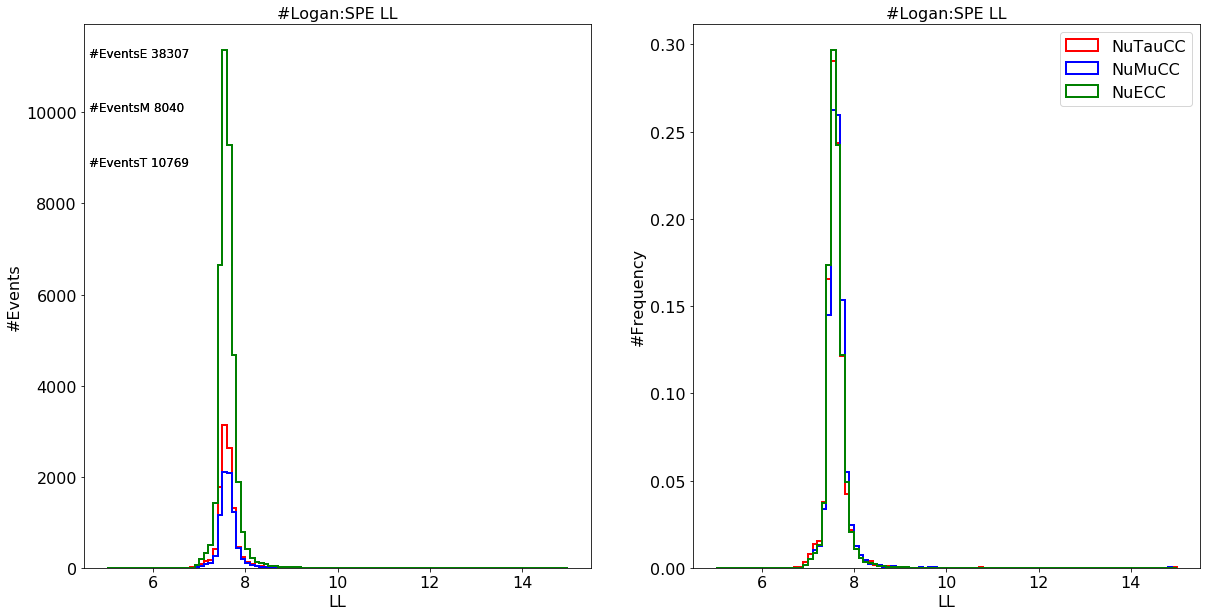

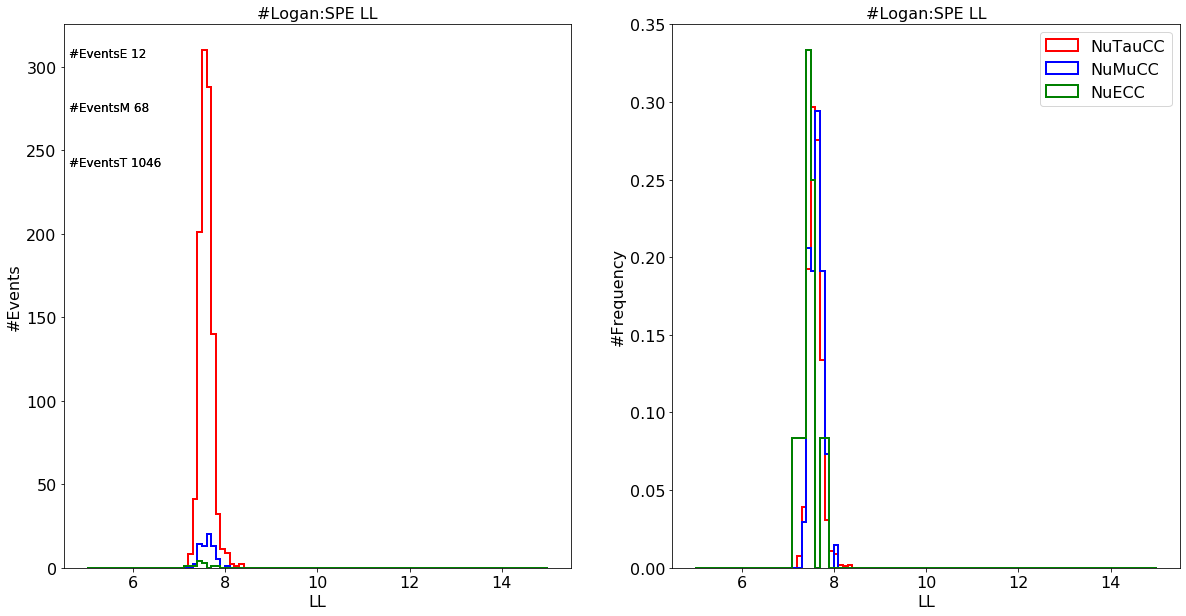

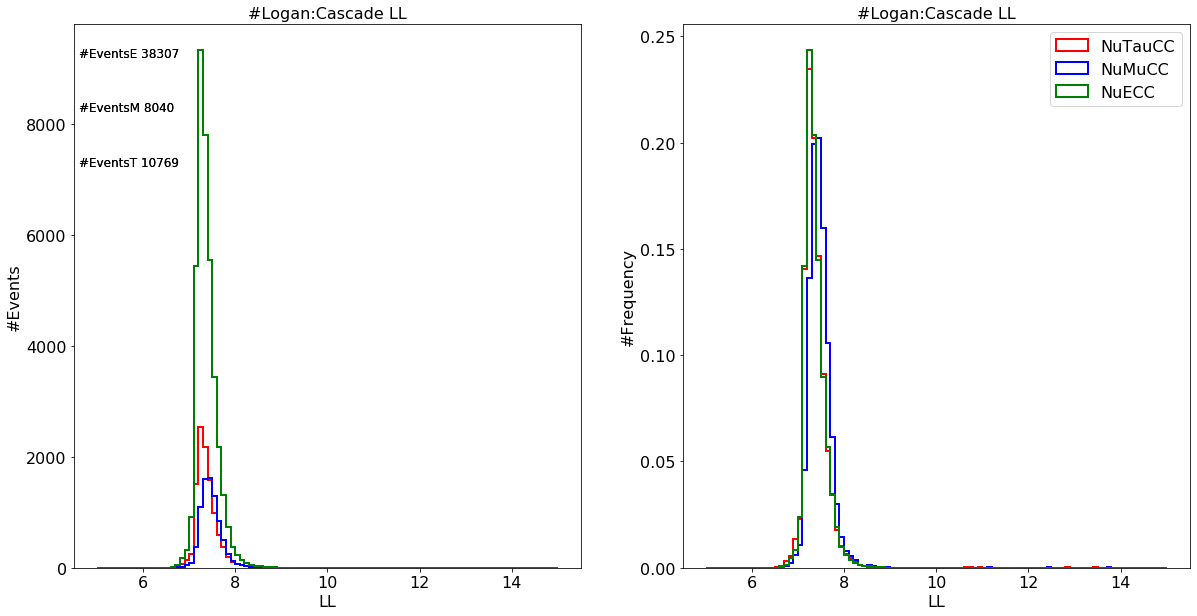

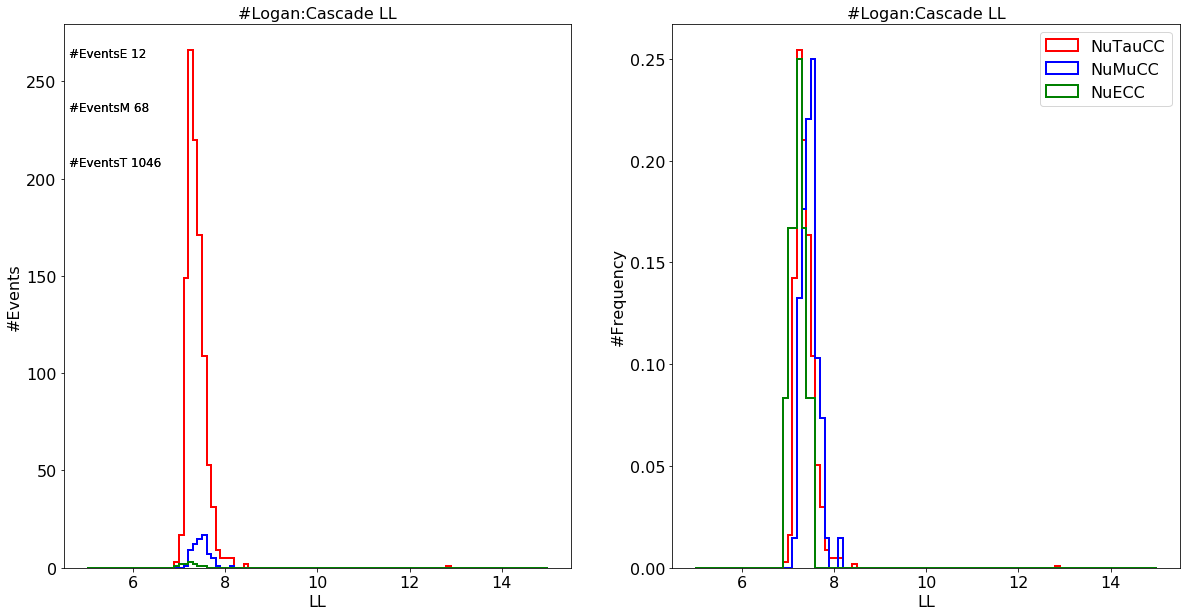

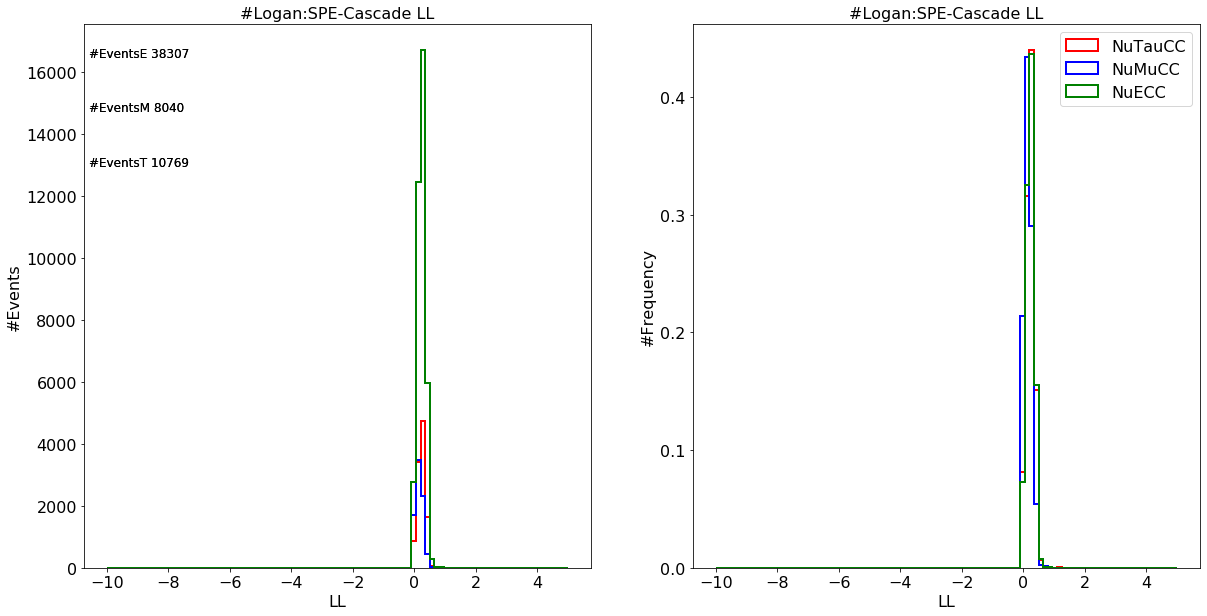

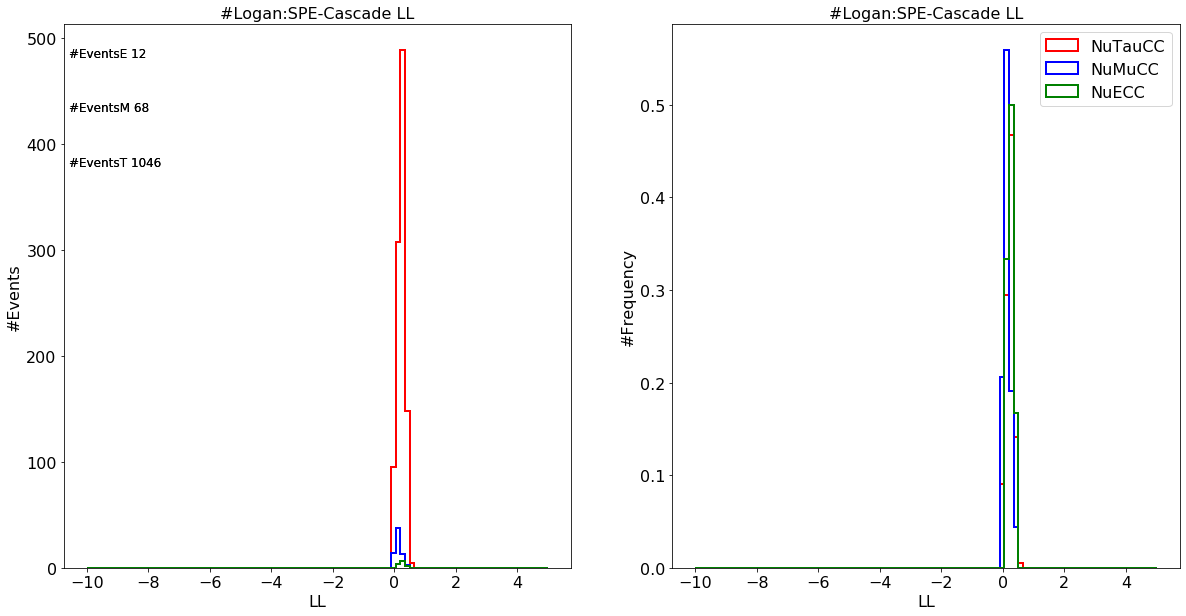

In [67]:
Plot("#Logan:SPE LL","LL",data_t['logan_veto']['SPE_rlogl'],data_m['logan_veto']['SPE_rlogl'],data_e['logan_veto']['SPE_rlogl'],r=[5,15])
Plot("#Logan:SPE LL","LL",data_t[mask_t]['logan_veto']['SPE_rlogl'],data_m[mask_m]['logan_veto']['SPE_rlogl'],data_e[mask_e]['logan_veto']['SPE_rlogl'],r=[5,15])
Plot("#Logan:Cascade LL","LL",data_t['logan_veto']['Cascade_rlogl'],data_m['logan_veto']['Cascade_rlogl'],data_e['logan_veto']['Cascade_rlogl'],r=[5,15])
Plot("#Logan:Cascade LL","LL",data_t[mask_t]['logan_veto']['Cascade_rlogl'],data_m[mask_m]['logan_veto']['Cascade_rlogl'],data_e[mask_e]['logan_veto']['Cascade_rlogl'],r=[5,15])
Plot("#Logan:SPE-Cascade LL","LL",data_t['logan_veto']['SPE_rlogl']-data_t['logan_veto']['Cascade_rlogl'],data_m['logan_veto']['SPE_rlogl']-data_m['logan_veto']['Cascade_rlogl'],data_e['logan_veto']['SPE_rlogl']-data_e['logan_veto']['Cascade_rlogl'],r=[-10,5])
Plot("#Logan:SPE-Cascade LL","LL",data_t[mask_t]['logan_veto']['SPE_rlogl']-data_t[mask_t]['logan_veto']['Cascade_rlogl'],data_m[mask_m]['logan_veto']['SPE_rlogl']-data_m[mask_m]['logan_veto']['Cascade_rlogl'],data_e[mask_e]['logan_veto']['SPE_rlogl']-data_e[mask_e]['logan_veto']['Cascade_rlogl'],r=[-10,5])

Plot("#Logan:SPE LL","LL",data_t[mask_lt]['logan_veto']['SPE_rlogl'],data_m[mask_lm]['logan_veto']['SPE_rlogl'],data_e[mask_le]['logan_veto']['SPE_rlogl'],r=[5,15])
Plot("#Logan:SPE LL","LL",data_t[mask_lts]['logan_veto']['SPE_rlogl'],data_m[mask_lms]['logan_veto']['SPE_rlogl'],data_e[mask_les]['logan_veto']['SPE_rlogl'],r=[5,15])
Plot("#Logan:Cascade LL","LL",data_t[mask_lt]['logan_veto']['Cascade_rlogl'],data_m[mask_lm]['logan_veto']['Cascade_rlogl'],data_e[mask_le]['logan_veto']['Cascade_rlogl'],r=[5,15])
Plot("#Logan:Cascade LL","LL",data_t[mask_lts]['logan_veto']['Cascade_rlogl'],data_m[mask_lms]['logan_veto']['Cascade_rlogl'],data_e[mask_les]['logan_veto']['Cascade_rlogl'],r=[5,15])
Plot("#Logan:SPE-Cascade LL","LL",data_t[mask_lt]['logan_veto']['SPE_rlogl']-data_t[mask_lt]['logan_veto']['Cascade_rlogl'],data_m[mask_lm]['logan_veto']['SPE_rlogl']-data_m[mask_lm]['logan_veto']['Cascade_rlogl'],data_e[mask_le]['logan_veto']['SPE_rlogl']-data_e[mask_le]['logan_veto']['Cascade_rlogl'],r=[-10,5])
Plot("#Logan:SPE-Cascade LL","LL",data_t[mask_lts]['logan_veto']['SPE_rlogl']-data_t[mask_lts]['logan_veto']['Cascade_rlogl'],data_m[mask_lms]['logan_veto']['SPE_rlogl']-data_m[mask_lms]['logan_veto']['Cascade_rlogl'],data_e[mask_les]['logan_veto']['SPE_rlogl']-data_e[mask_les]['logan_veto']['Cascade_rlogl'],r=[-10,5])

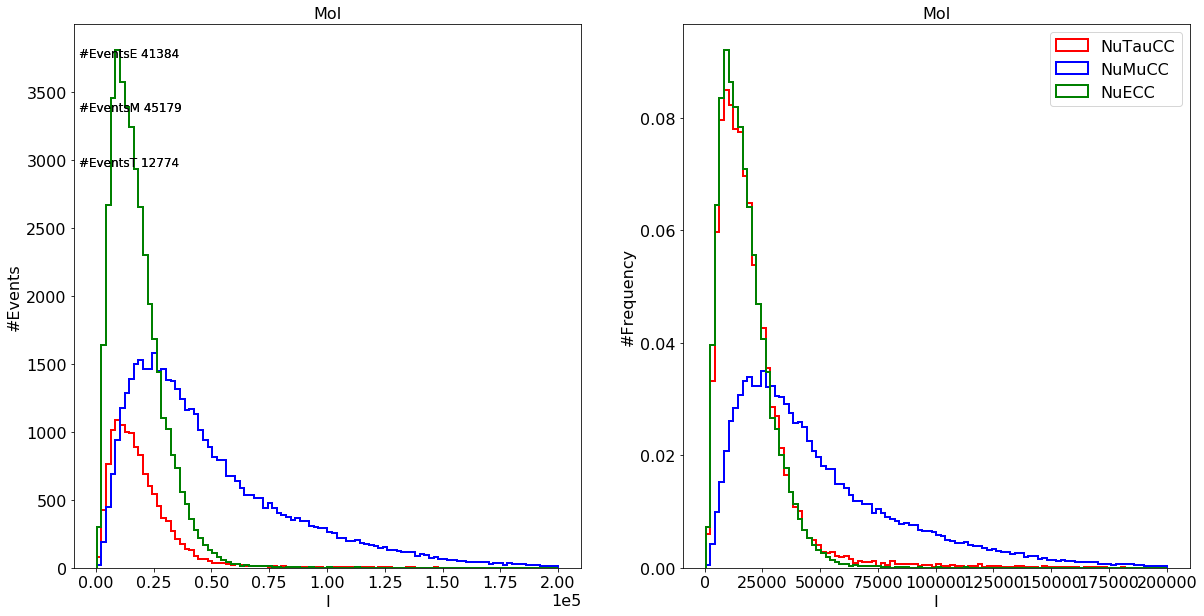

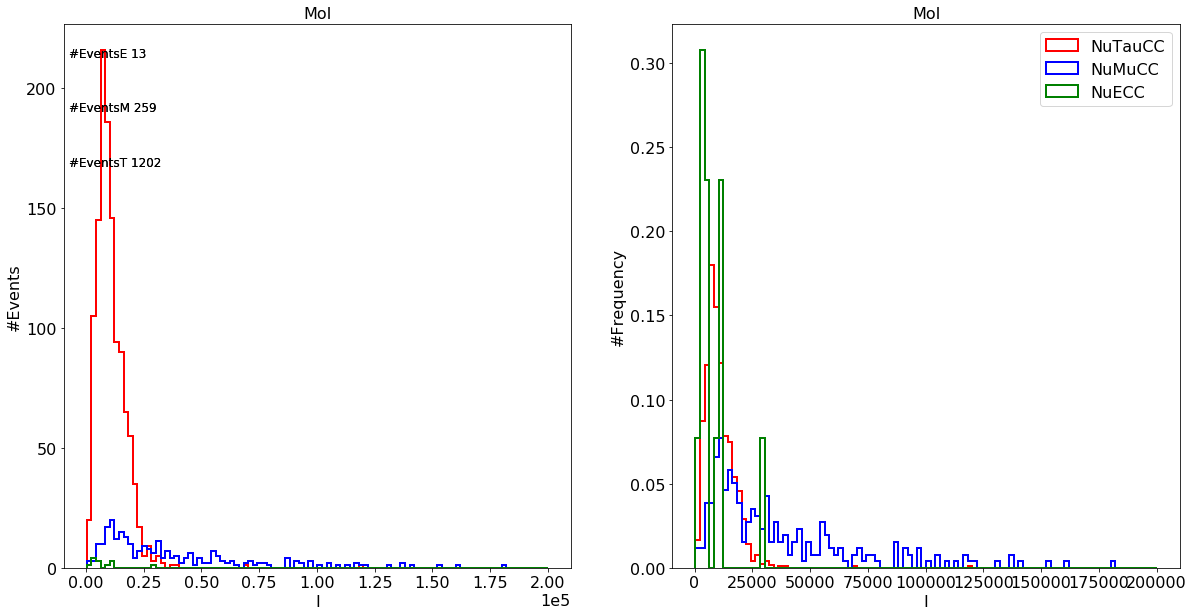

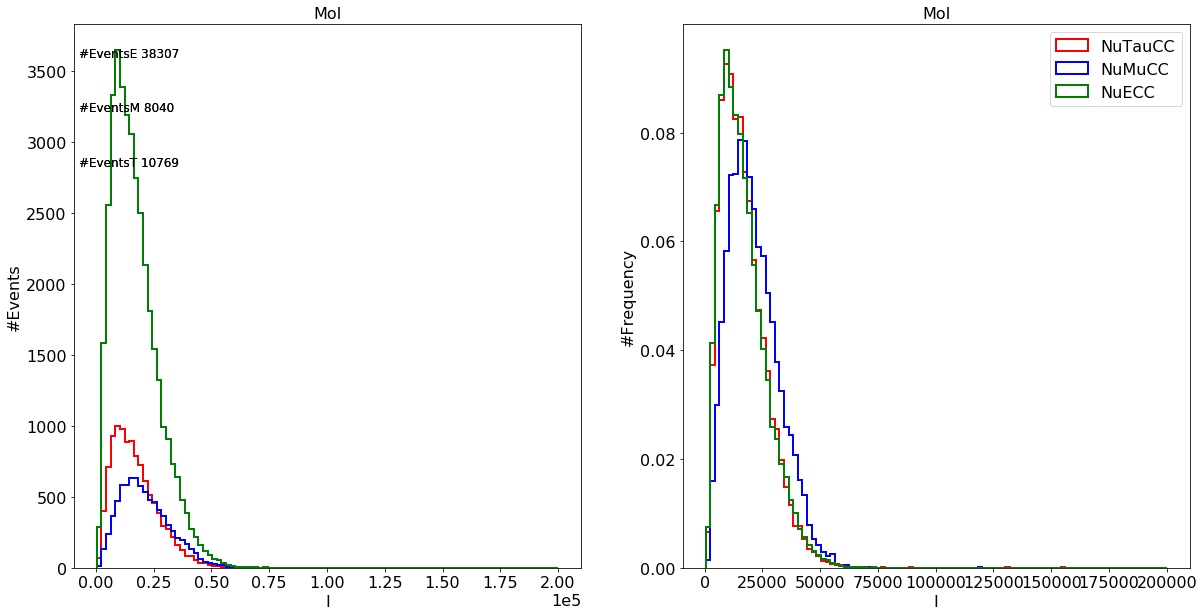

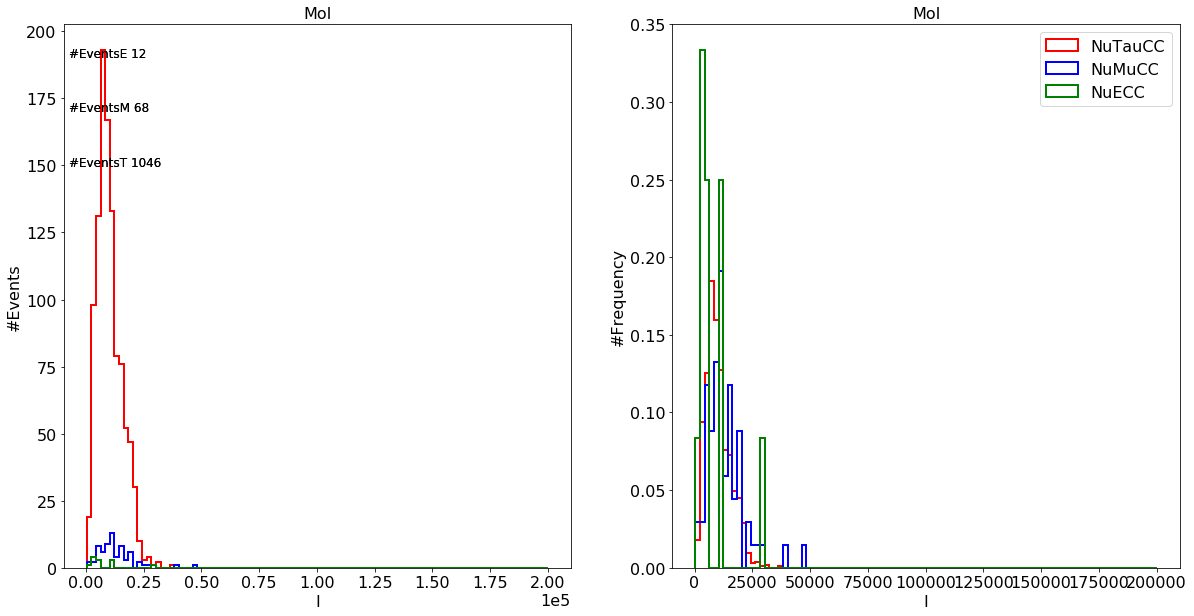

In [68]:
Plot("MoI","I",data_t['moi']/data_t['qtot'],data_m['moi']/data_m['qtot'],data_e['moi']/data_e['qtot'],r=[400,200000])
Plot("MoI","I",data_t[mask_t]['moi']/data_t[mask_t]['qtot'],data_m[mask_m]['moi']/data_m[mask_m]['qtot'],data_e[mask_e]['moi']/data_e[mask_e]['qtot'],r=[400,200000])
Plot("MoI","I",data_t[mask_lt]['moi']/data_t[mask_lt]['qtot'],data_m[mask_lm]['moi']/data_m[mask_lm]['qtot'],data_e[mask_le]['moi']/data_e[mask_le]['qtot'],r=[400,200000])
Plot("MoI","I",data_t[mask_lts]['moi']/data_t[mask_lts]['qtot'],data_m[mask_lms]['moi']/data_m[mask_lms]['qtot'],data_e[mask_les]['moi']/data_e[mask_les]['qtot'],r=[400,200000])

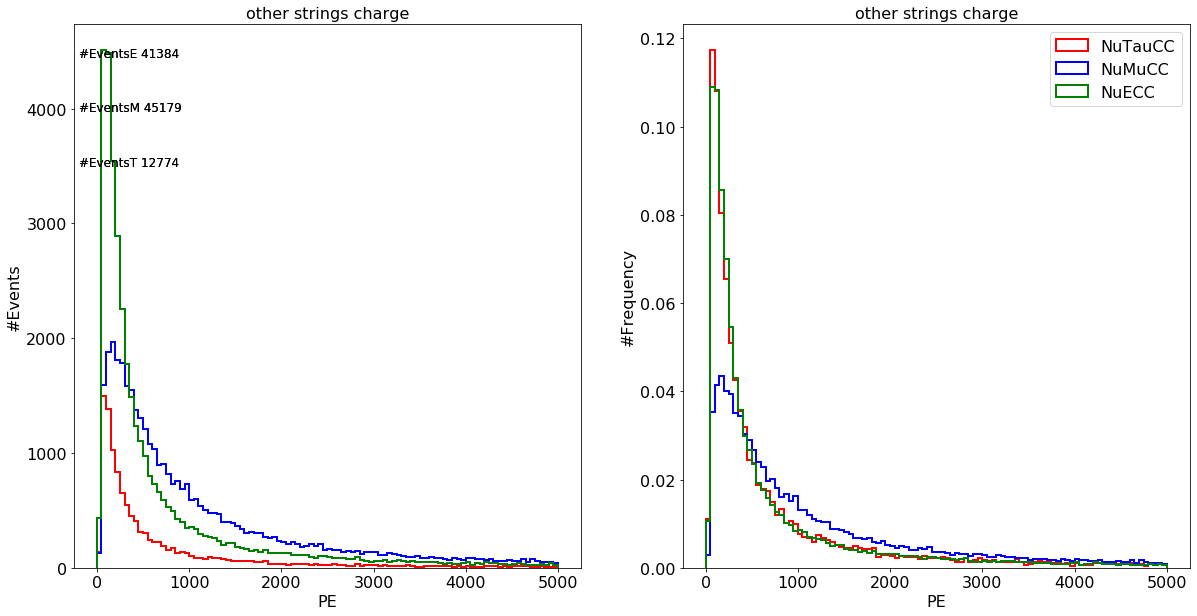

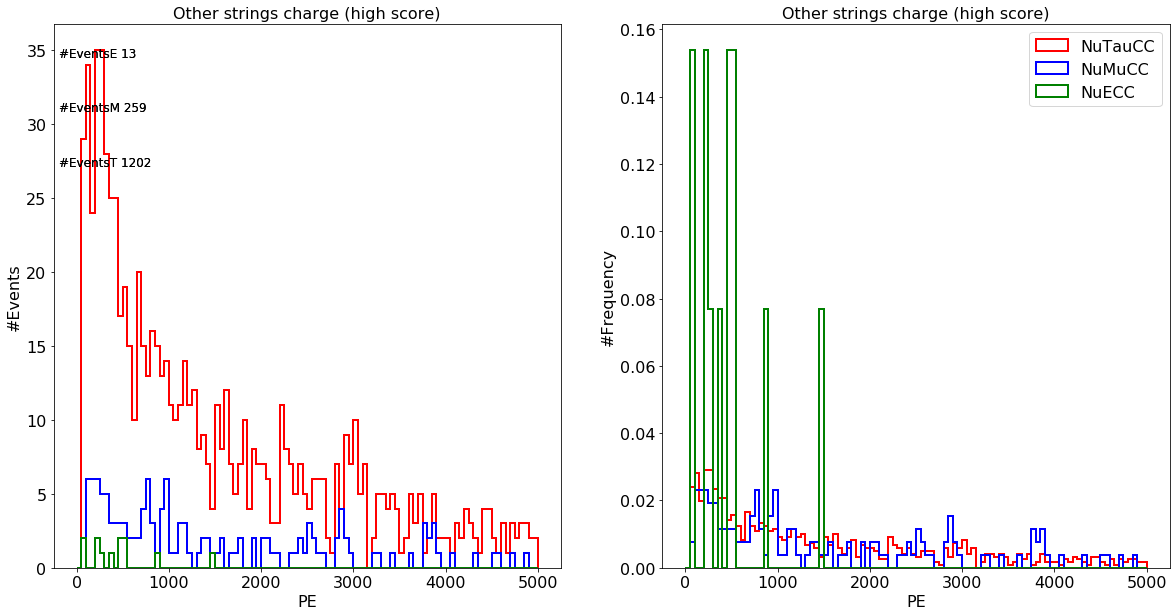

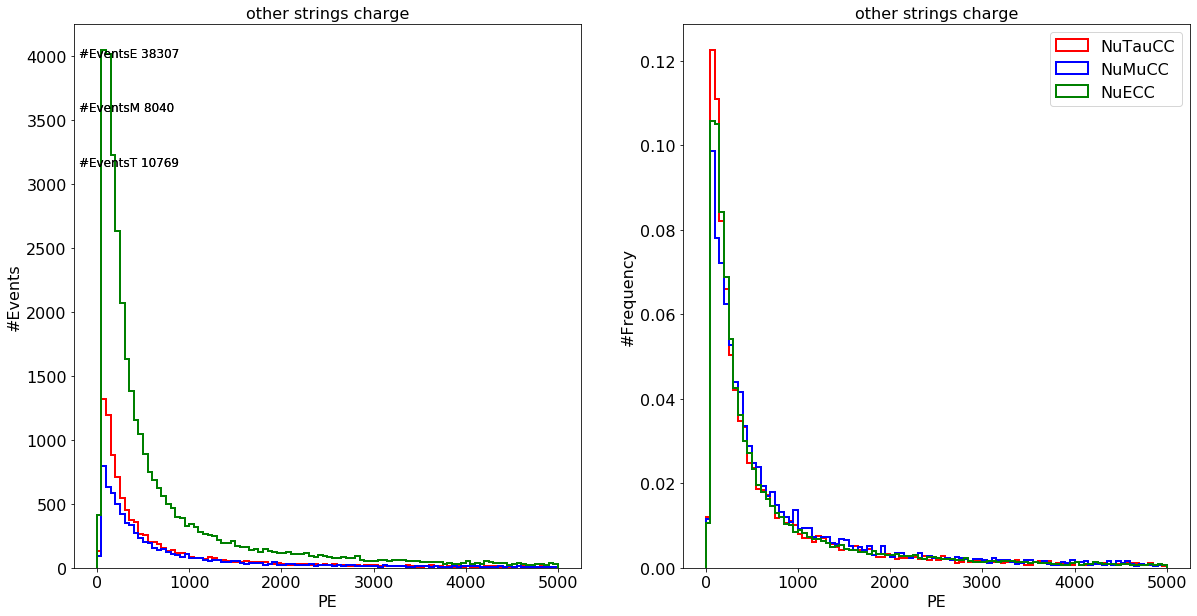

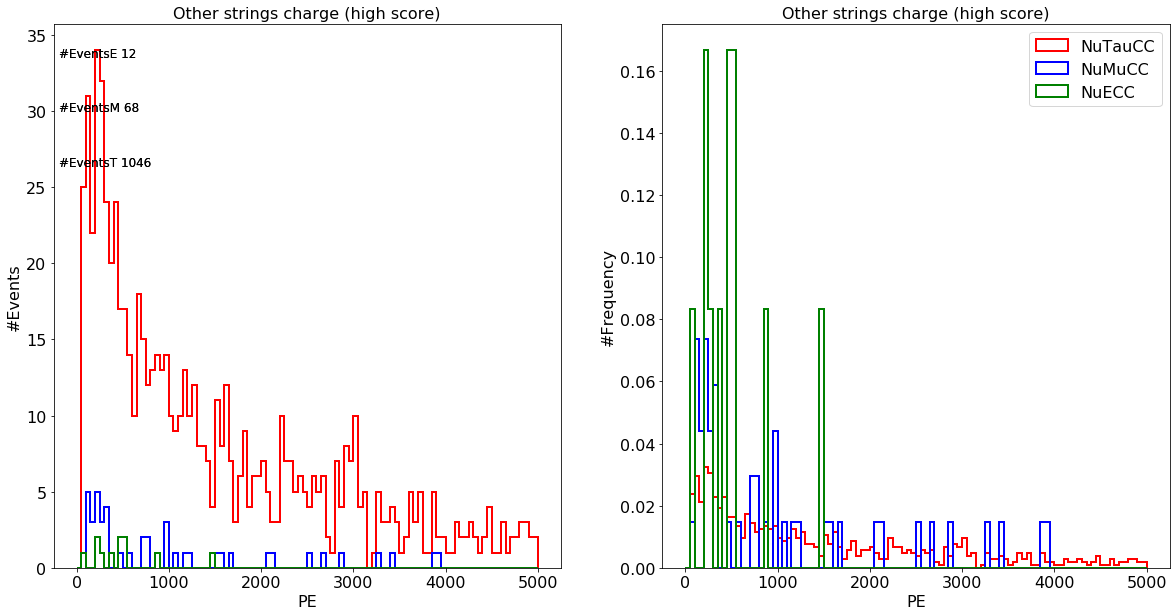

In [69]:
Plot("other strings charge","PE",data_t['qoth'],data_m['qoth'],data_e['qoth'],r=[0,5000])
Plot("Other strings charge (high score)","PE",data_t[mask_t]['qoth'],data_m[mask_m]['qoth'],data_e[mask_e]['qoth'],r=[0,5000])
Plot("other strings charge","PE",data_t[mask_lt]['qoth'],data_m[mask_lm]['qoth'],data_e[mask_le]['qoth'],r=[0,5000])
Plot("Other strings charge (high score)","PE",data_t[mask_lts]['qoth'],data_m[mask_lms]['qoth'],data_e[mask_les]['qoth'],r=[0,5000])

In [70]:
dist_t = np.array([sum(np.sqrt(i)) for i in data_t['qst_all']['dist']])
dist_m = np.array([sum(np.sqrt(i)) for i in data_m['qst_all']['dist']])
dist_e = np.array([sum(np.sqrt(i)) for i in data_e['qst_all']['dist']])

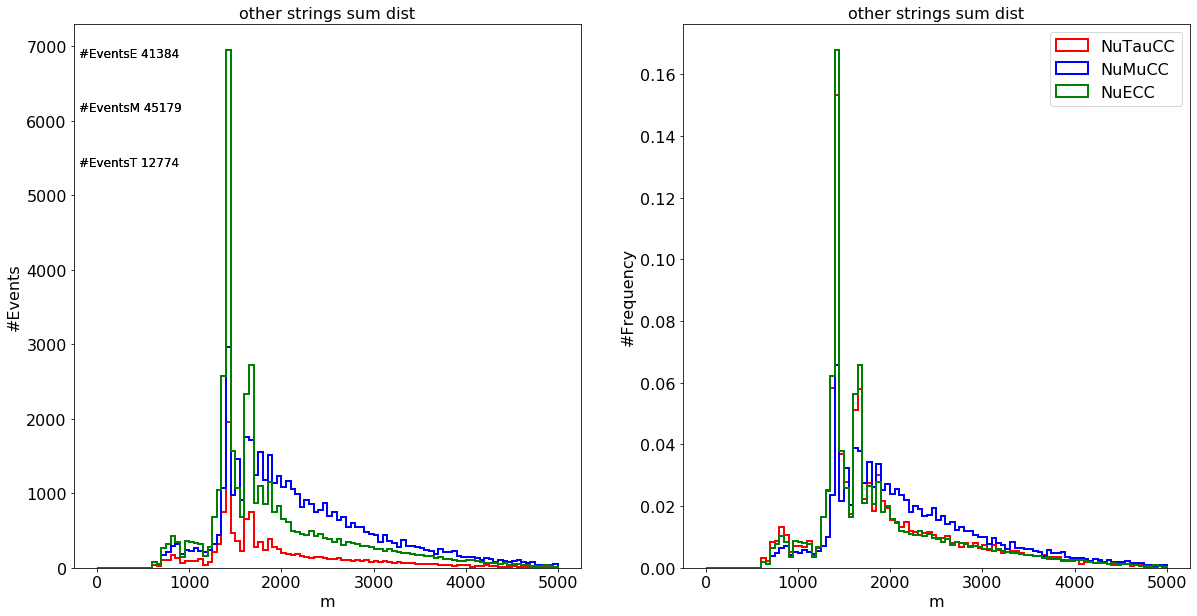

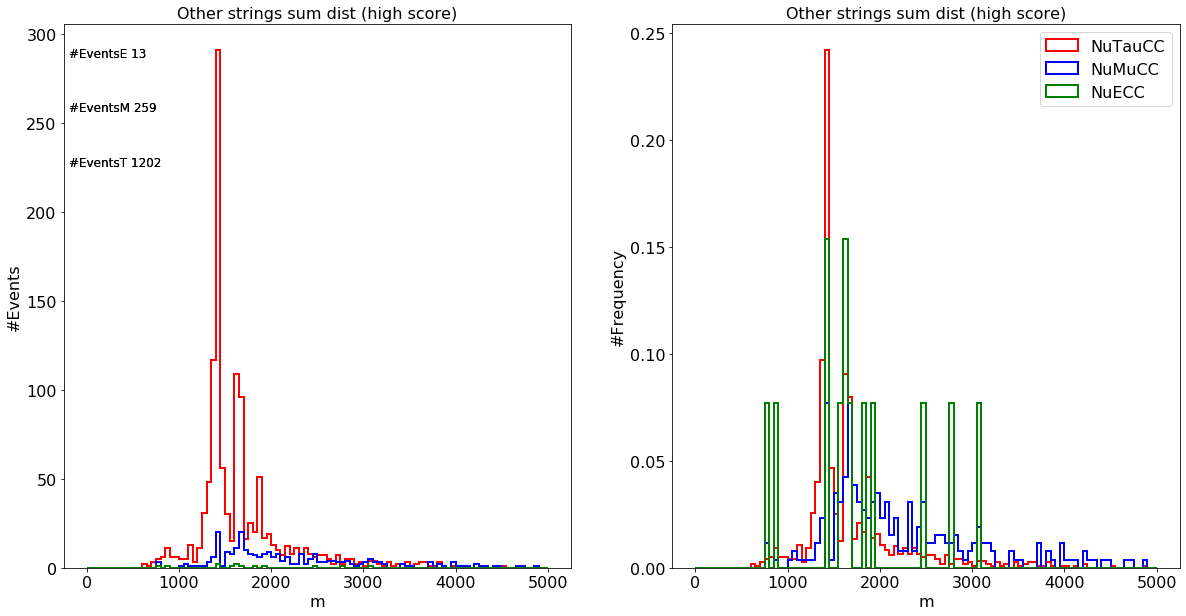

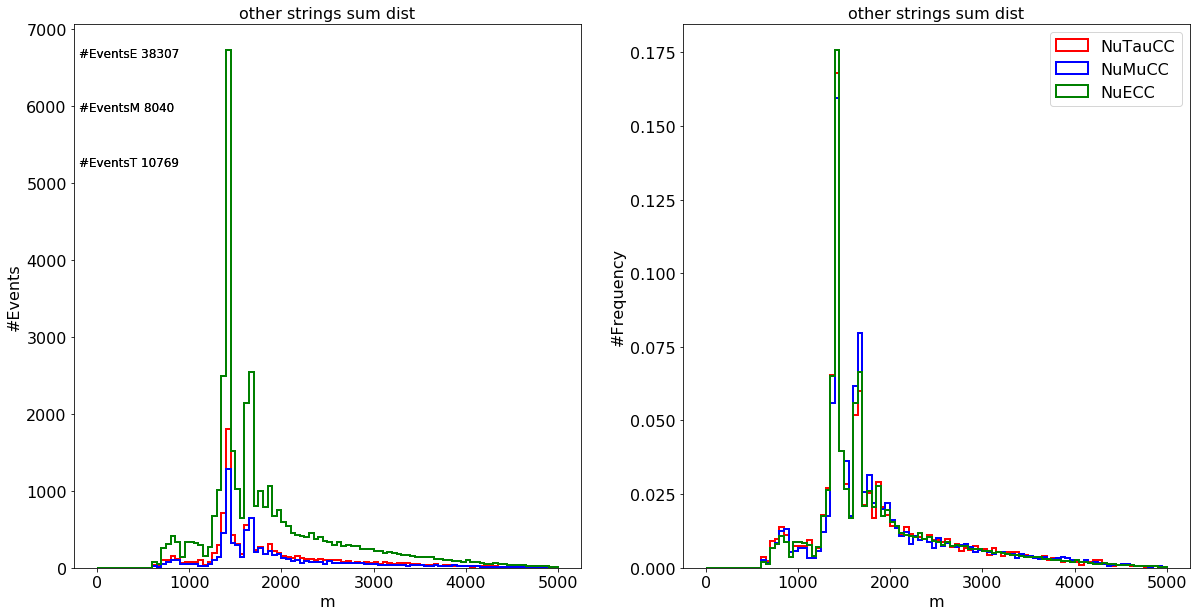

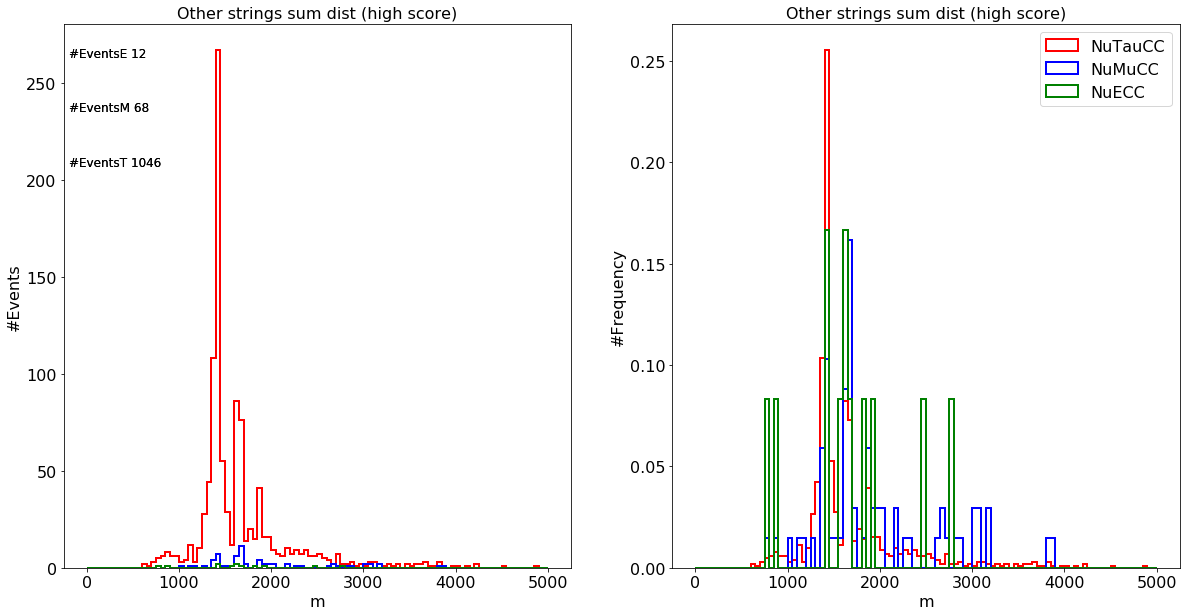

In [71]:
Plot("other strings sum dist","m",dist_t,dist_m,dist_e,r=[0,5000])
Plot("Other strings sum dist (high score)","m",dist_t[mask_t],dist_m[mask_m],dist_e[mask_e],r=[0,5000])
Plot("other strings sum dist","m",dist_t[mask_lt],dist_m[mask_lm],dist_e[mask_le],r=[0,5000])
Plot("Other strings sum dist (high score)","m",dist_t[mask_lts],dist_m[mask_lms],dist_e[mask_les],r=[0,5000])

In [96]:
def OtherStCharge(data):
    output = []
    for e in data:
        set1 = set(e['qst_all']['q'])
        set2 = set(e['qst']['q'])
        qmax = e['qst']['q'][0]
        qmax_od = sorted(list(set1.difference(set2)),reverse=True)[0]
        qmax_ou = sorted(list(set1.union(set2)),reverse=True)[1]
        imax_od=np.where(e['qst_all']['q']==qmax_od)[0][0]
        dmax_od = np.sqrt(e['qst_all']['dist'][imax_od])
        imax_ou=np.where(e['qst_all']['q']==qmax_ou)[0][0]
        dmax_ou = np.sqrt(e['qst_all']['dist'][imax_ou])
        output.append([qmax,qmax_od/qmax,qmax_ou/qmax,dmax_od,dmax_ou])
    output = np.array(output)
    return output

In [97]:
vars_t = OtherStCharge(data_t)
vars_m = OtherStCharge(data_m)
vars_e = OtherStCharge(data_e)

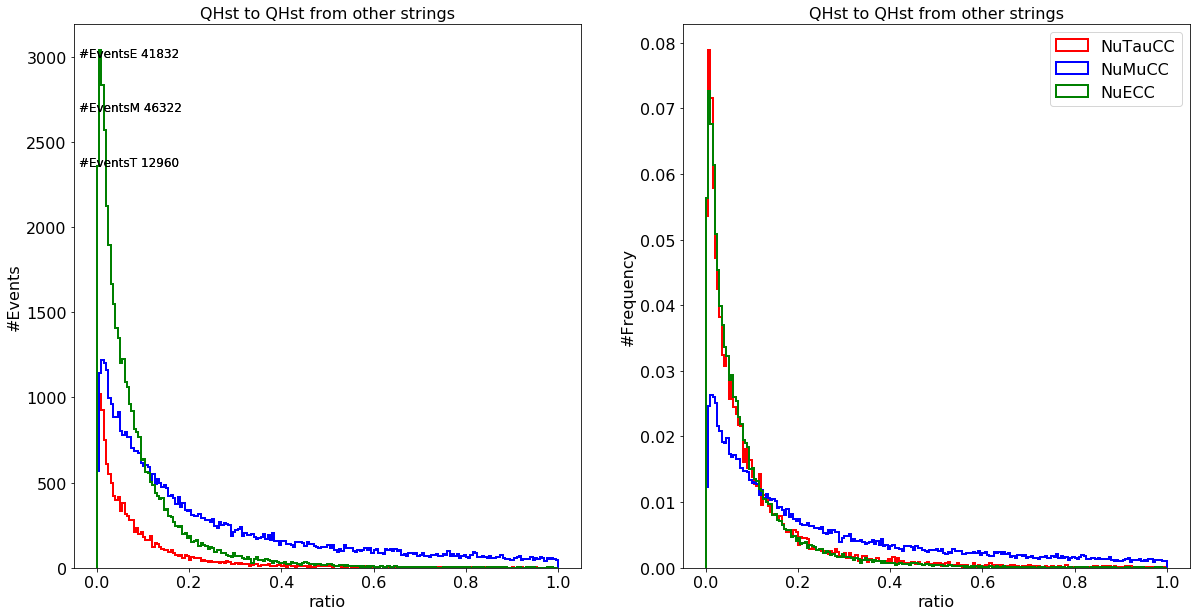

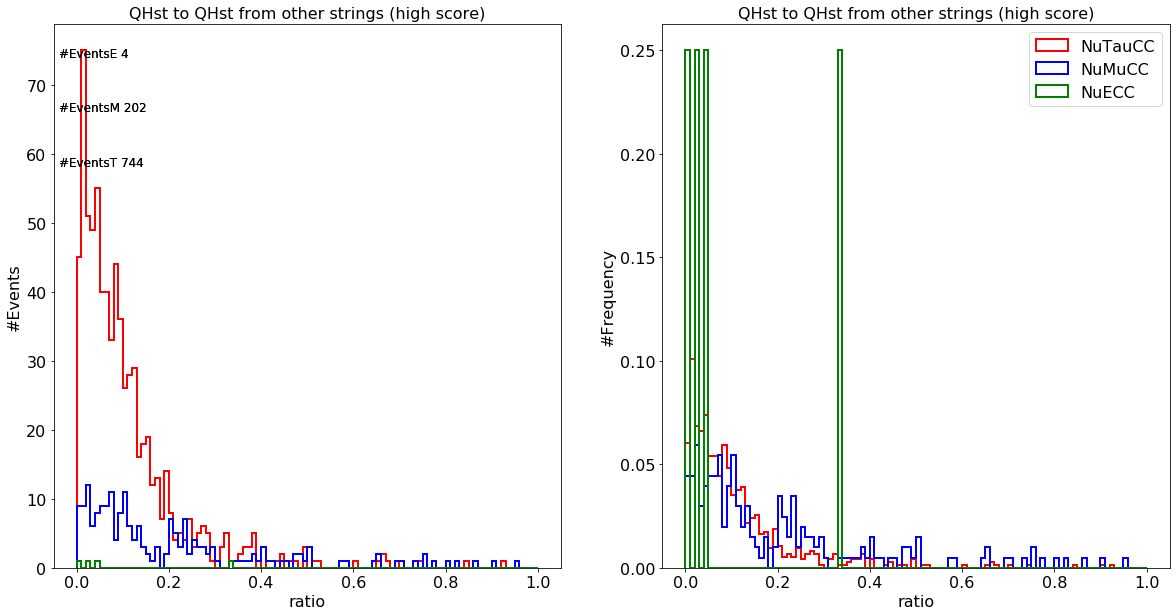

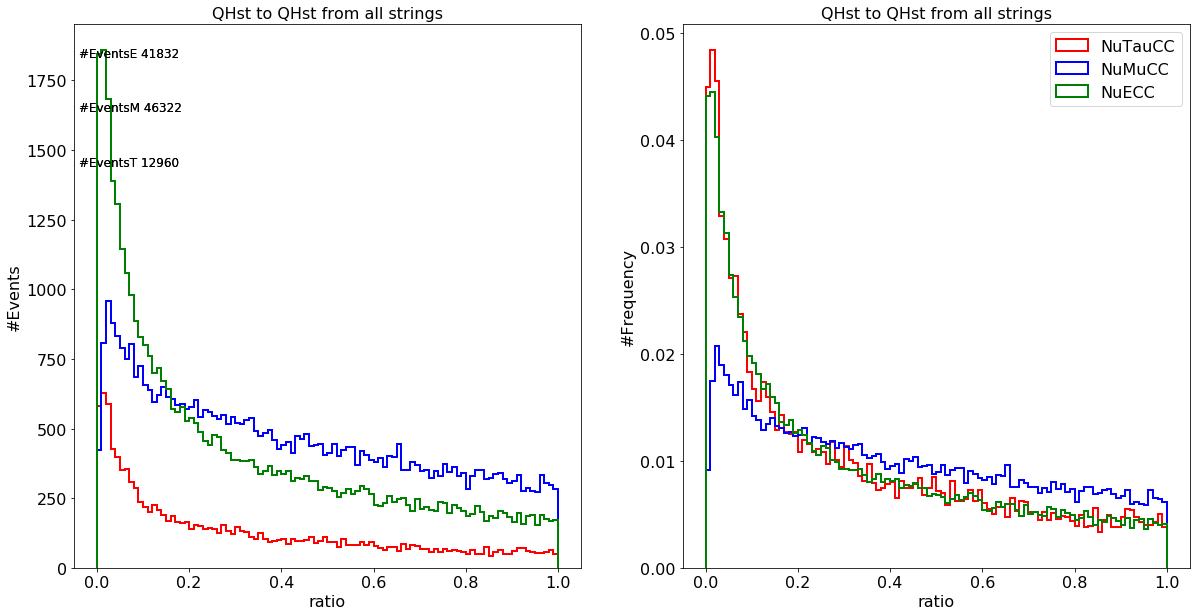

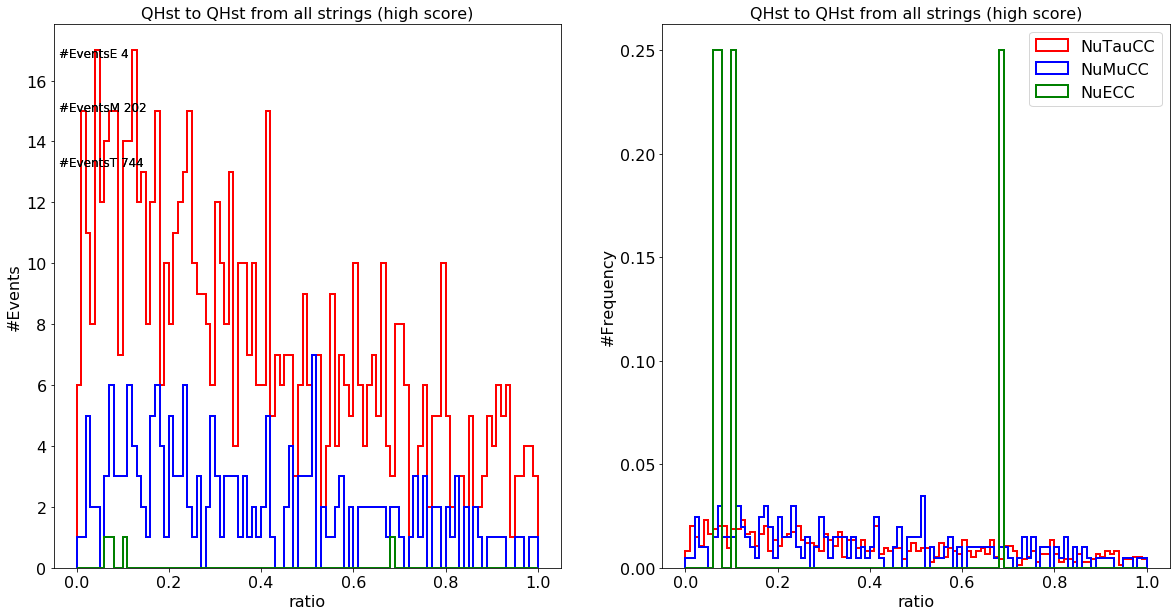

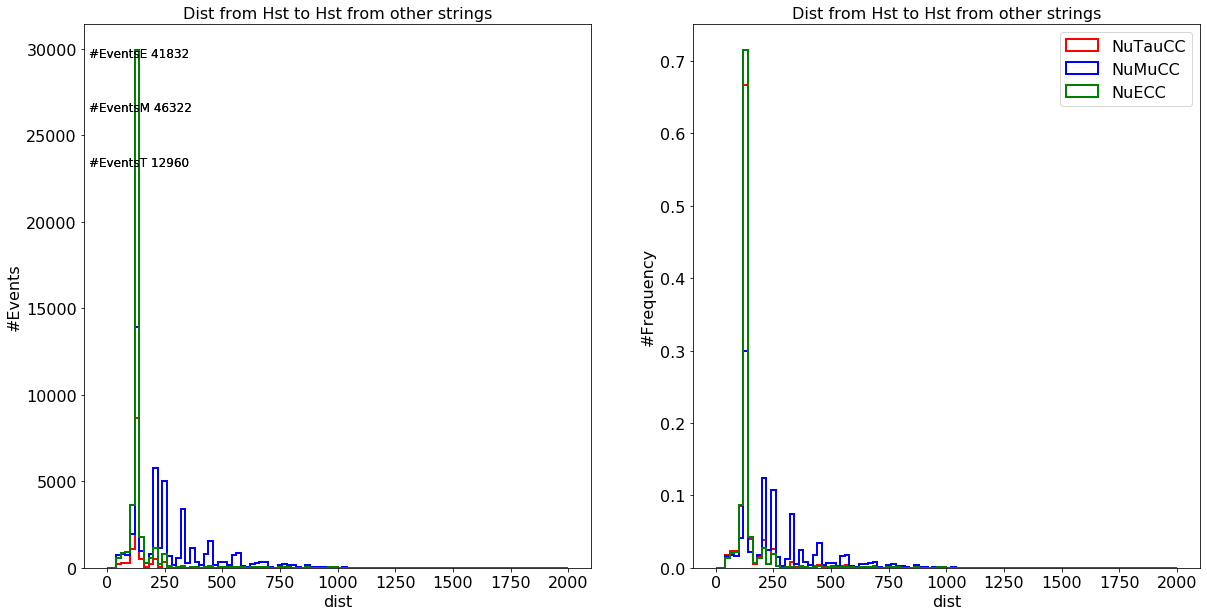

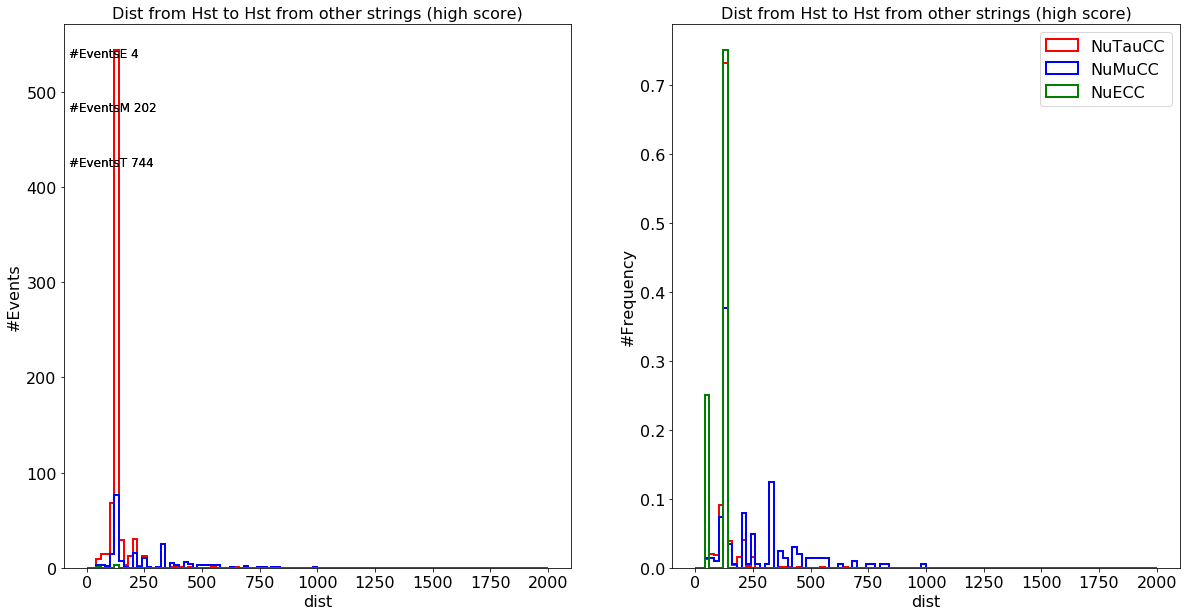

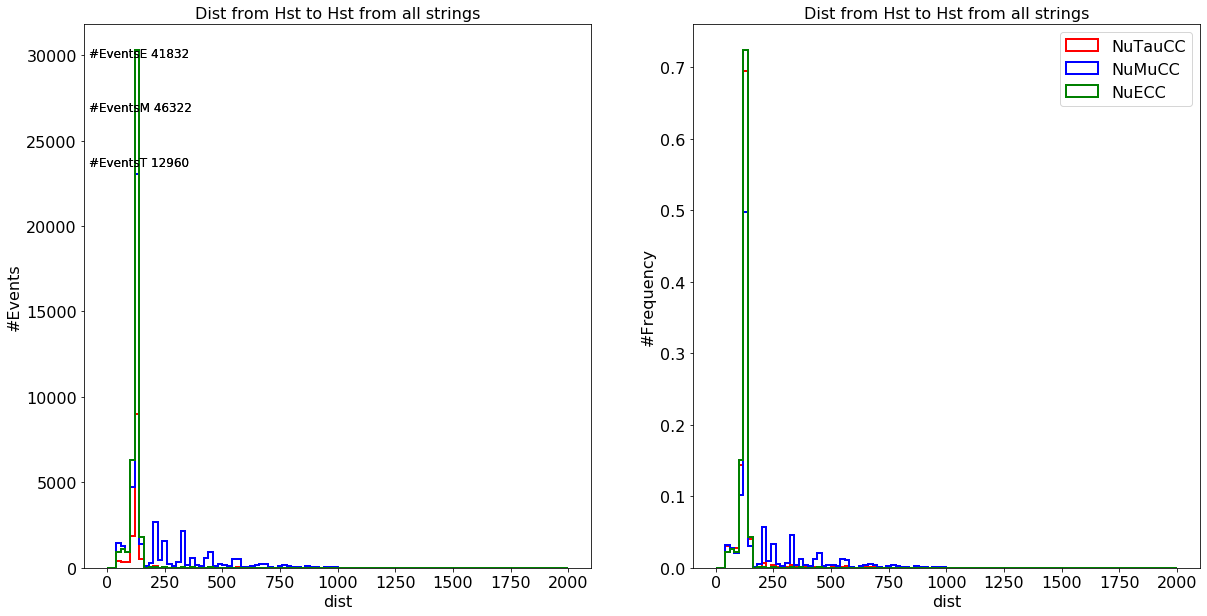

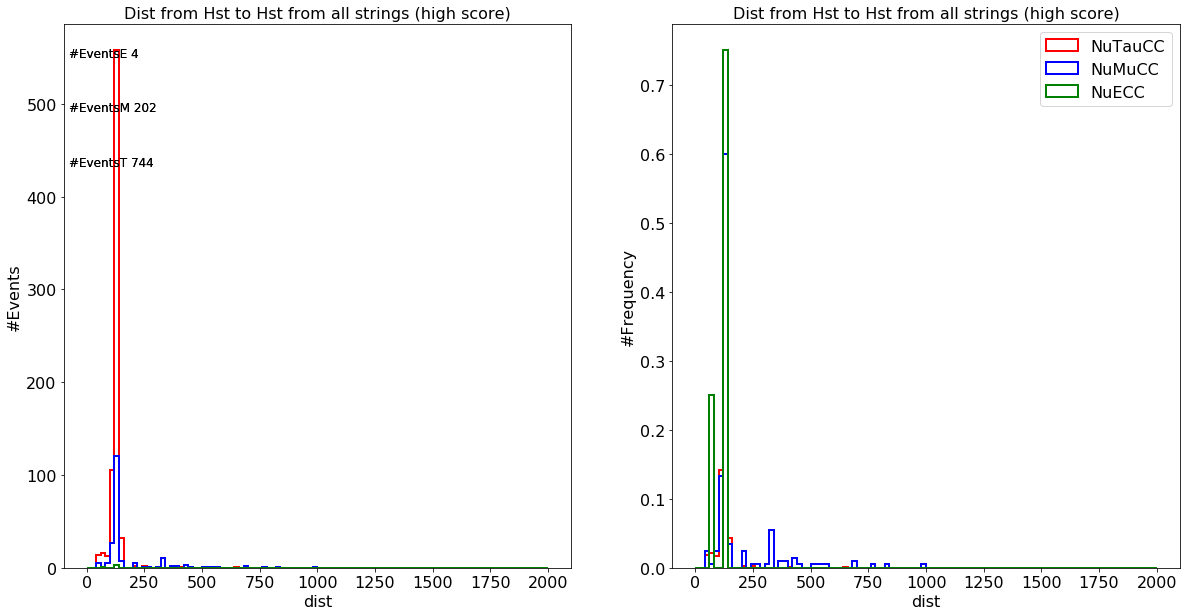

In [33]:
Plot("QHst to QHst from other strings","ratio",vars_t[:,1],vars_m[:,1],vars_e[:,1],r=[0,1],b=200)
Plot("QHst to QHst from other strings (high score)","ratio",vars_t[:,1][mask_t],vars_m[:,1][mask_m],vars_e[:,1][mask_e],r=[0,1])
Plot("QHst to QHst from all strings","ratio",vars_t[:,2],vars_m[:,2],vars_e[:,2],r=[0,1])
Plot("QHst to QHst from all strings (high score)","ratio",vars_t[:,2][mask_t],vars_m[:,2][mask_m],vars_e[:,2][mask_e],r=[0,1])
Plot("Dist from Hst to Hst from other strings","dist",vars_t[:,3],vars_m[:,3],vars_e[:,3],r=[0,2000])
Plot("Dist from Hst to Hst from other strings (high score)","dist",vars_t[:,3][mask_t],vars_m[:,3][mask_m],vars_e[:,3][mask_e],r=[0,2000])
Plot("Dist from Hst to Hst from all strings","dist",vars_t[:,4],vars_m[:,4],vars_e[:,4],r=[0,2000])
Plot("Dist from Hst to Hst from all strings (high score)","dist",vars_t[:,4][mask_t],vars_m[:,4][mask_m],vars_e[:,4][mask_e],r=[0,2000])


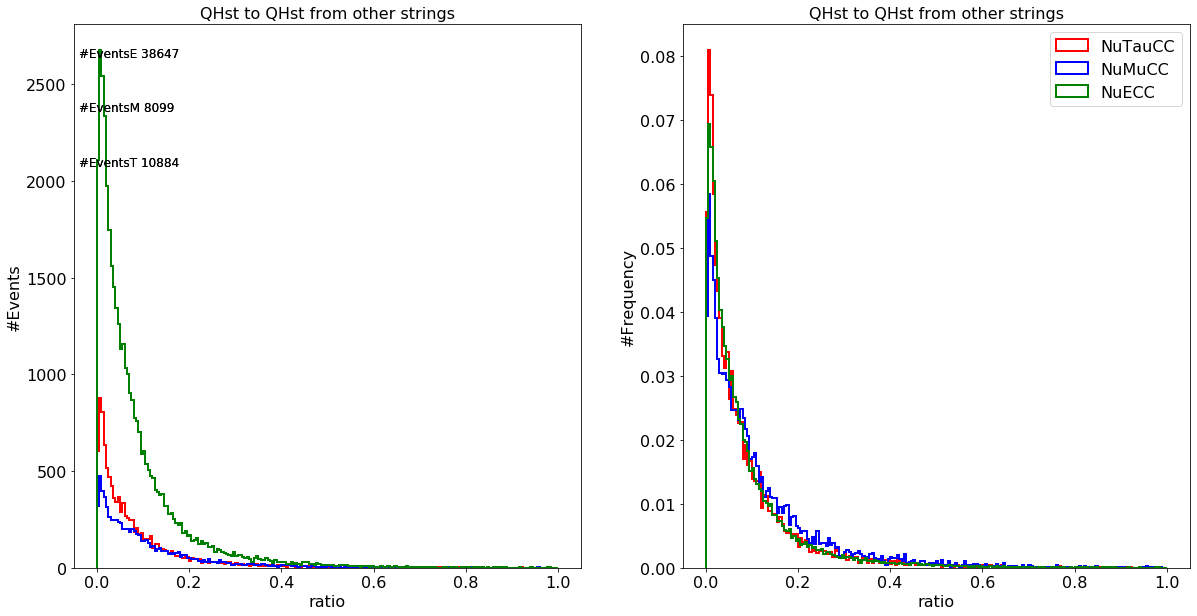

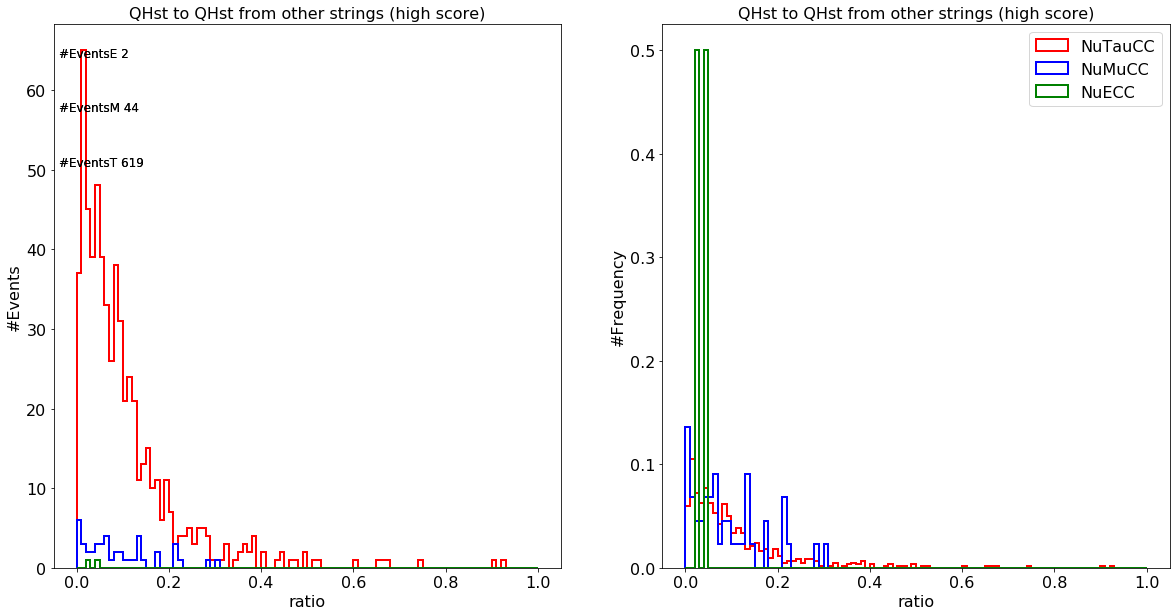

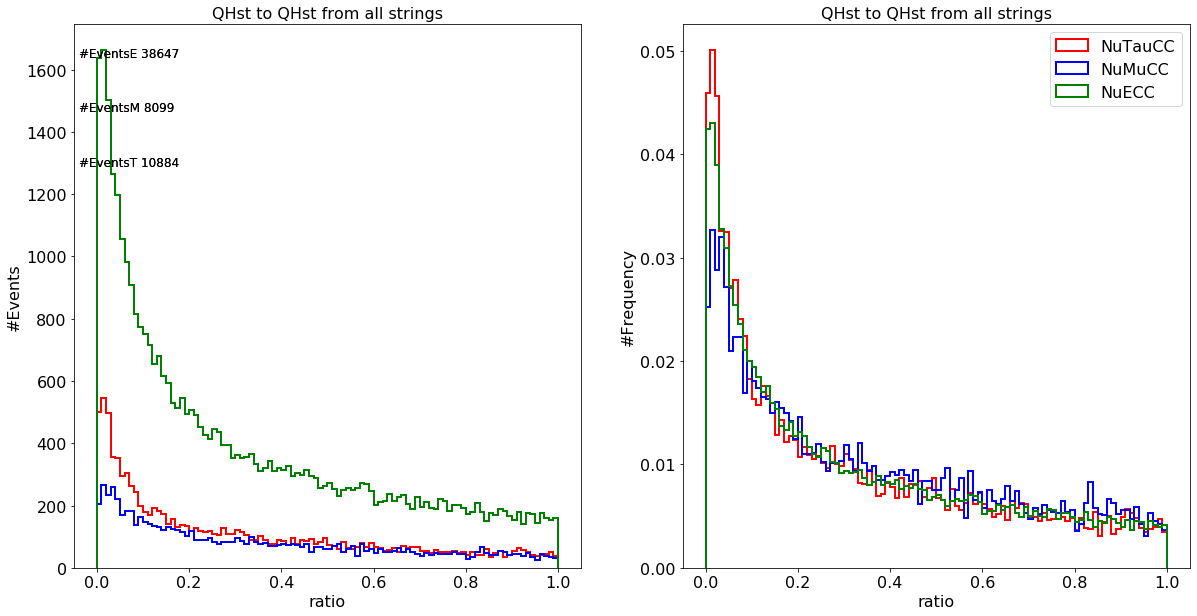

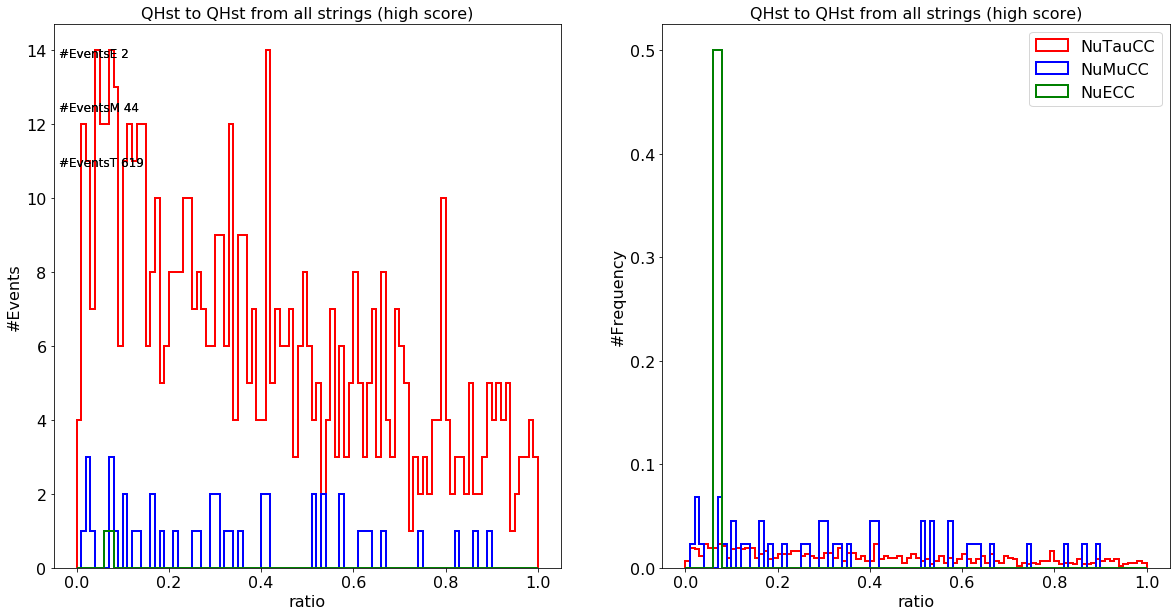

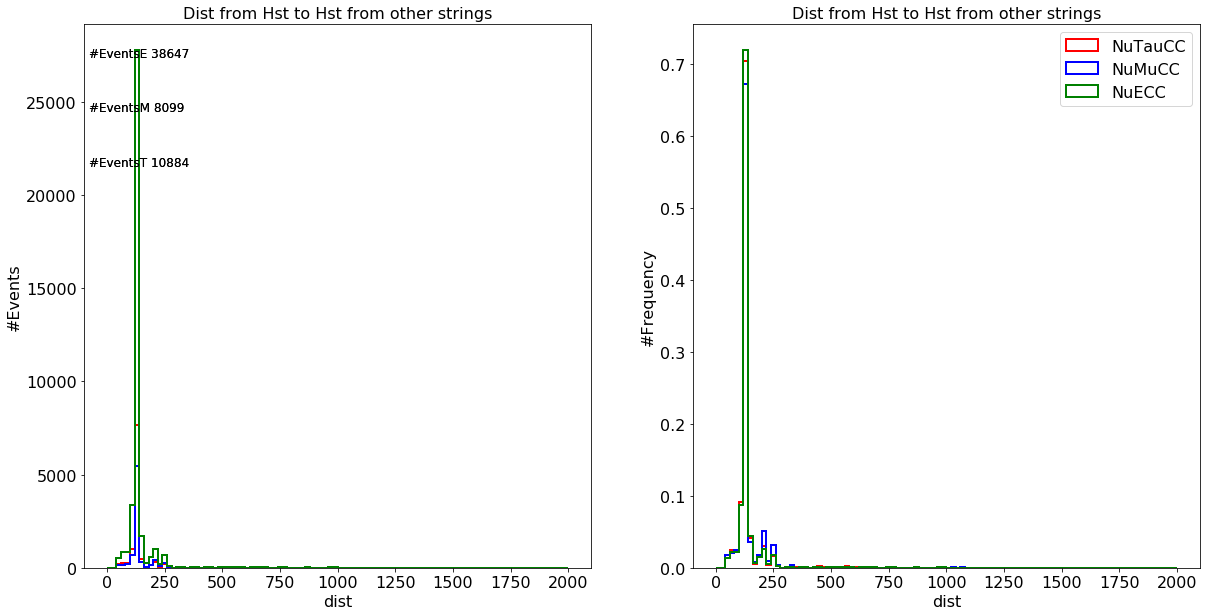

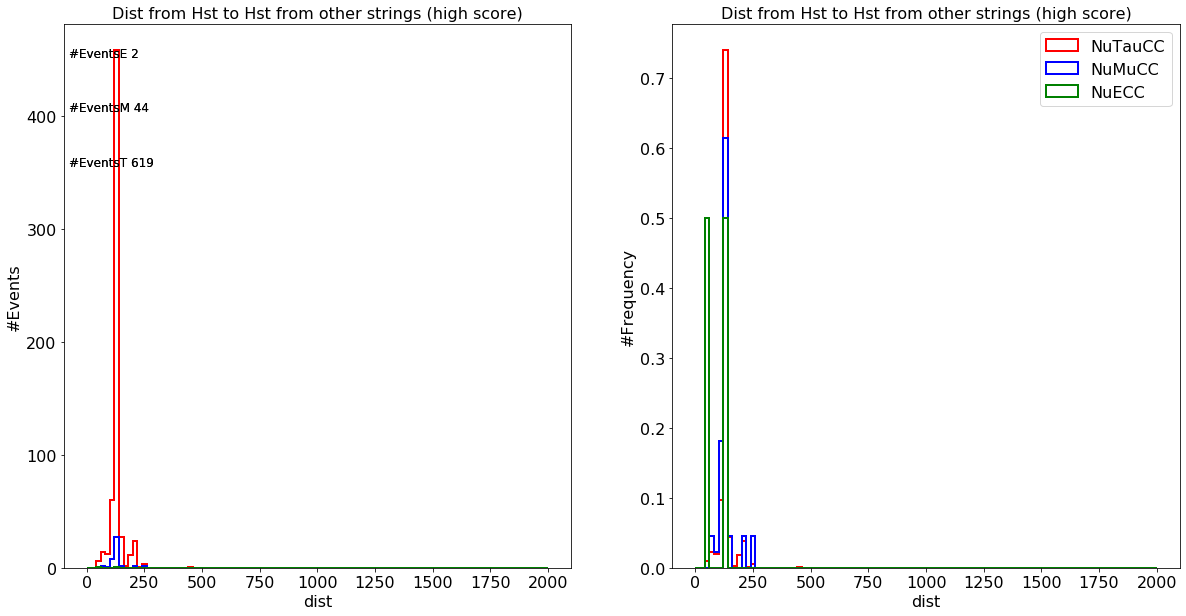

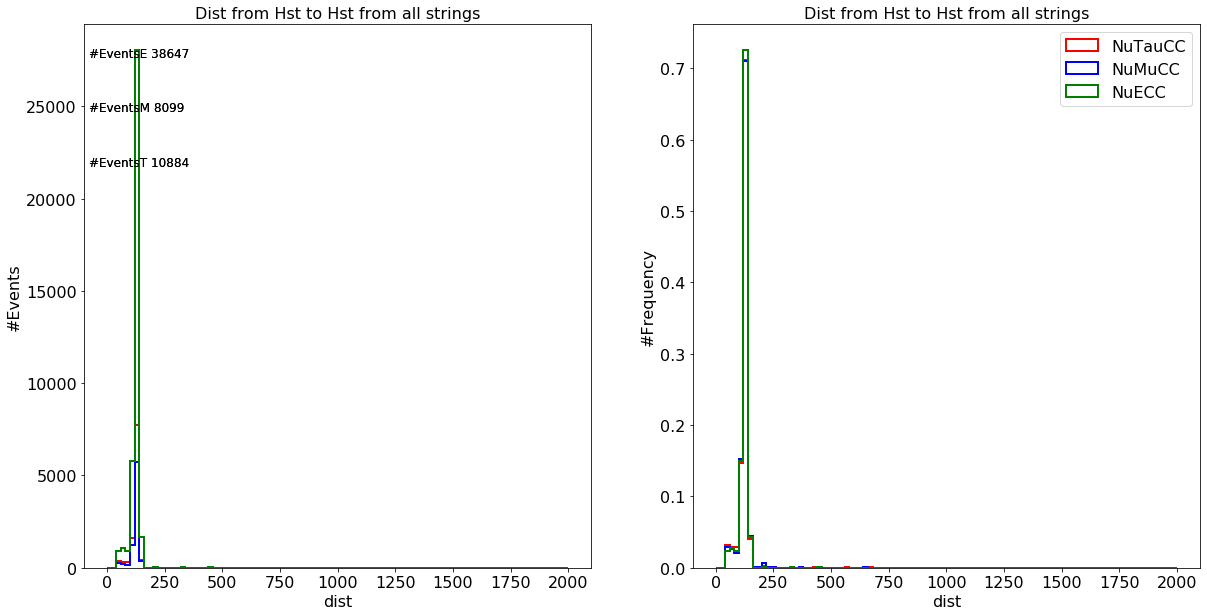

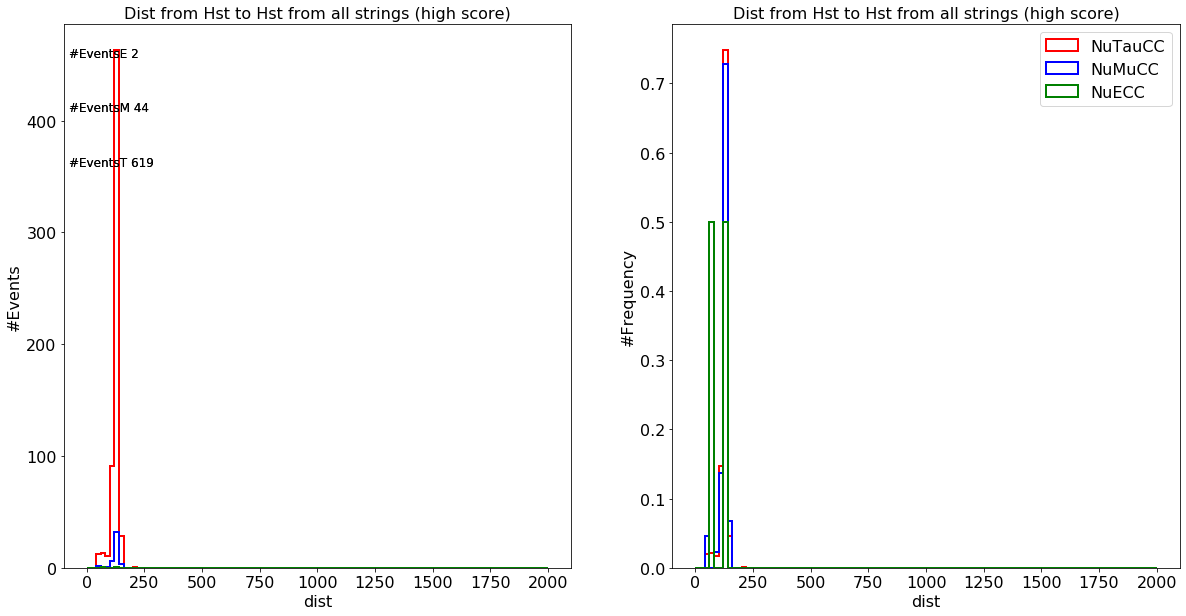

In [98]:
Plot("QHst to QHst from other strings","ratio",vars_t[mask_lt][:,1],vars_m[mask_lm][:,1],vars_e[mask_le][:,1],r=[0,1],b=200)
Plot("QHst to QHst from other strings (high score)","ratio",vars_t[:,1][mask_lts],vars_m[:,1][mask_lms],vars_e[:,1][mask_les],r=[0,1])
Plot("QHst to QHst from all strings","ratio",vars_t[mask_lt][:,2],vars_m[mask_lm][:,2],vars_e[mask_le][:,2],r=[0,1])
Plot("QHst to QHst from all strings (high score)","ratio",vars_t[:,2][mask_lts],vars_m[:,2][mask_lms],vars_e[:,2][mask_les],r=[0,1])
Plot("Dist from Hst to Hst from other strings","dist",vars_t[mask_lt][:,3],vars_m[mask_lm][:,3],vars_e[mask_le][:,3],r=[0,2000])
Plot("Dist from Hst to Hst from other strings (high score)","dist",vars_t[:,3][mask_lts],vars_m[:,3][mask_lms],vars_e[:,3][mask_les],r=[0,2000])
Plot("Dist from Hst to Hst from all strings","dist",vars_t[mask_lt][:,4],vars_m[mask_lm][:,4],vars_e[mask_le][:,4],r=[0,2000])
Plot("Dist from Hst to Hst from all strings (high score)","dist",vars_t[:,4][mask_lts],vars_m[:,4][mask_lms],vars_e[:,4][mask_les],r=[0,2000])


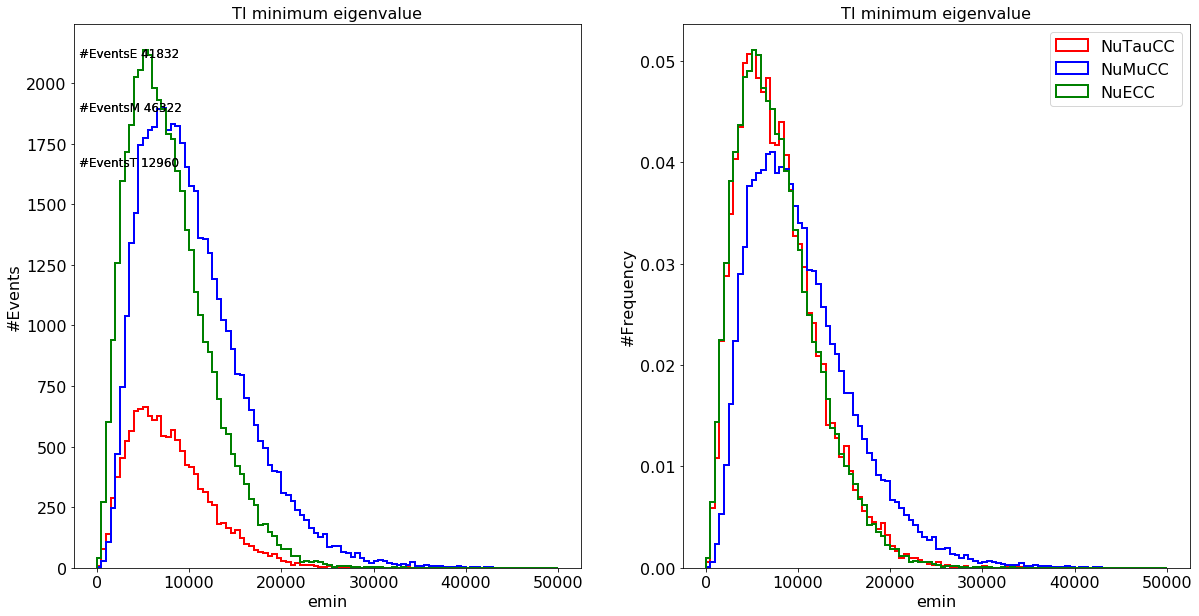

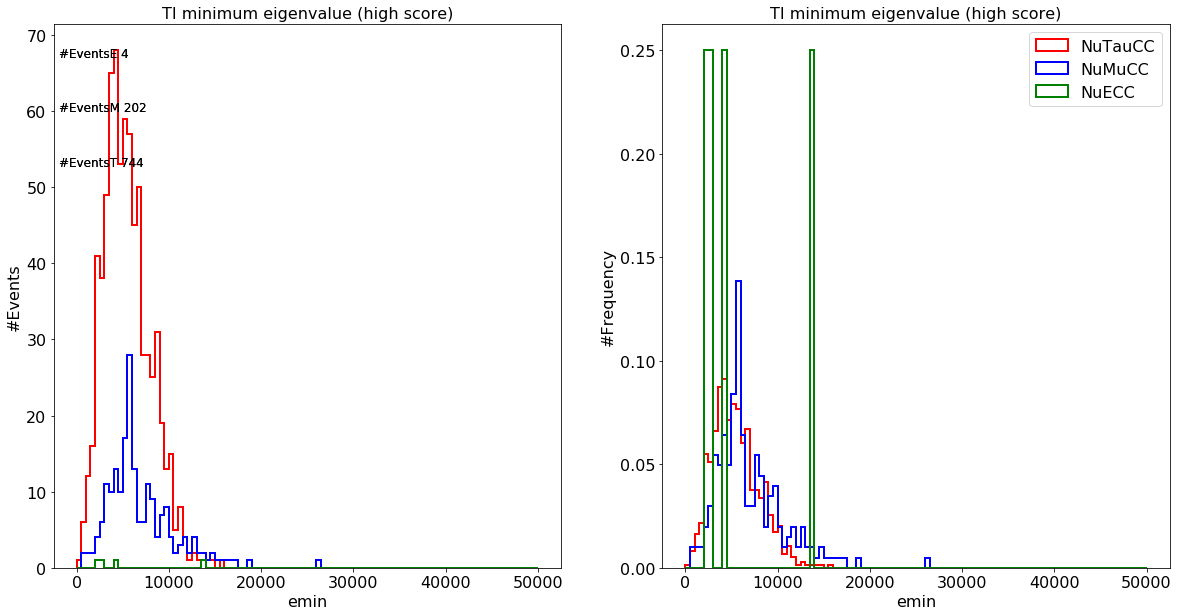

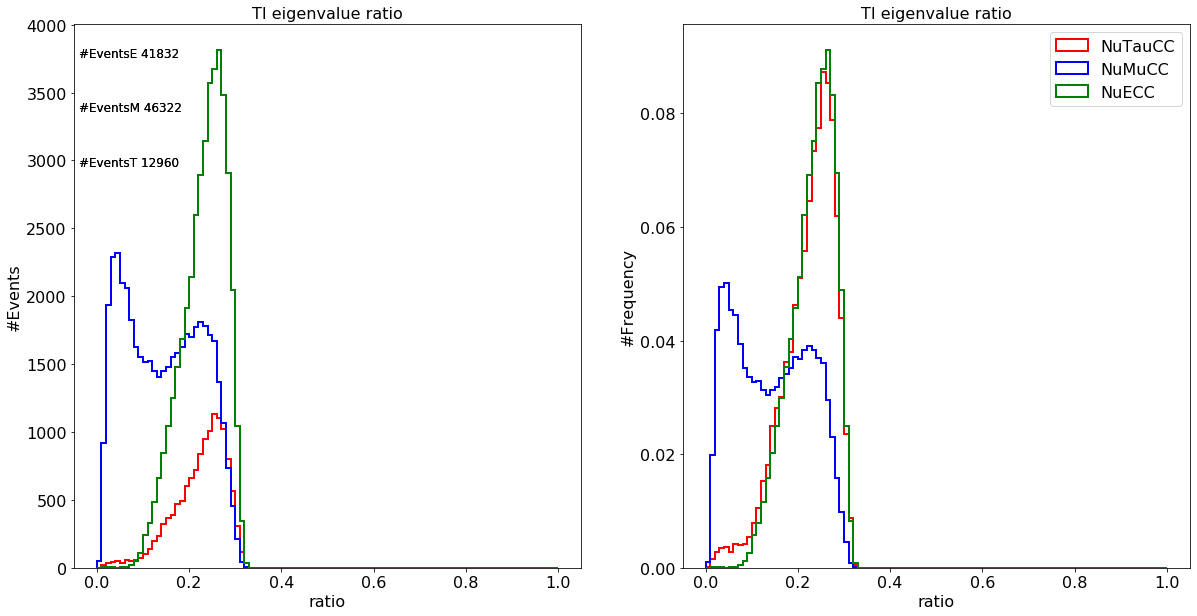

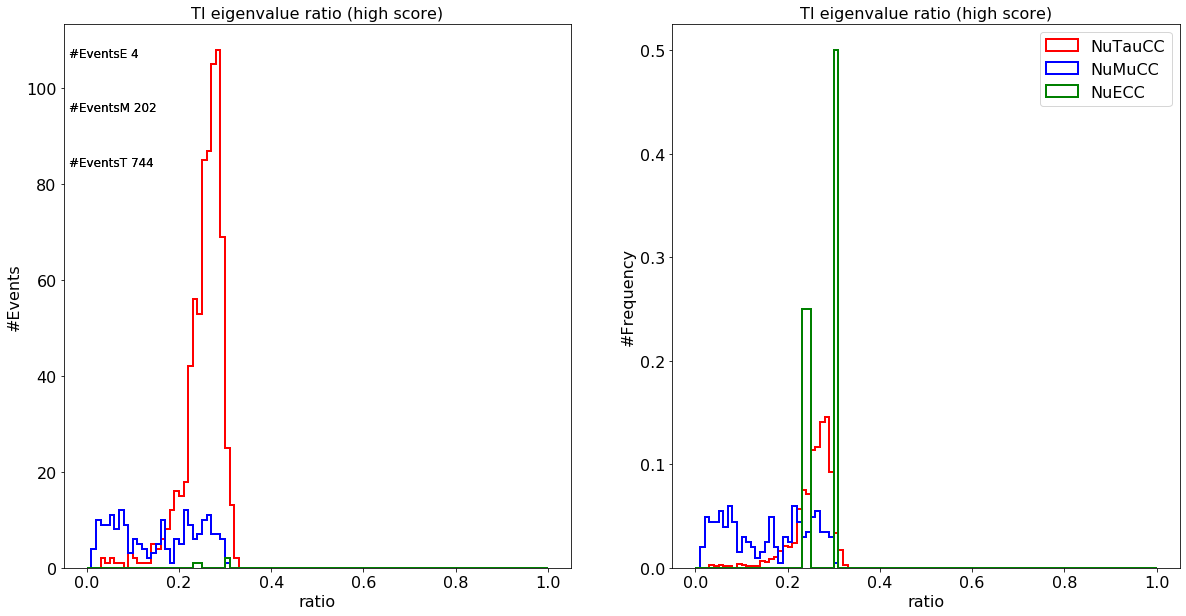

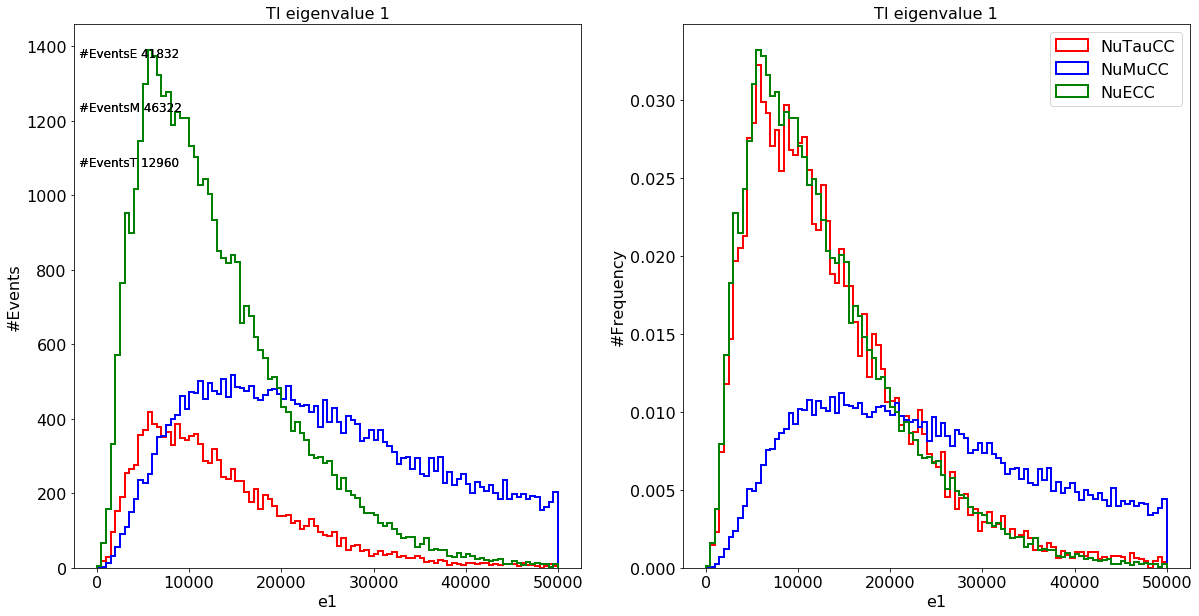

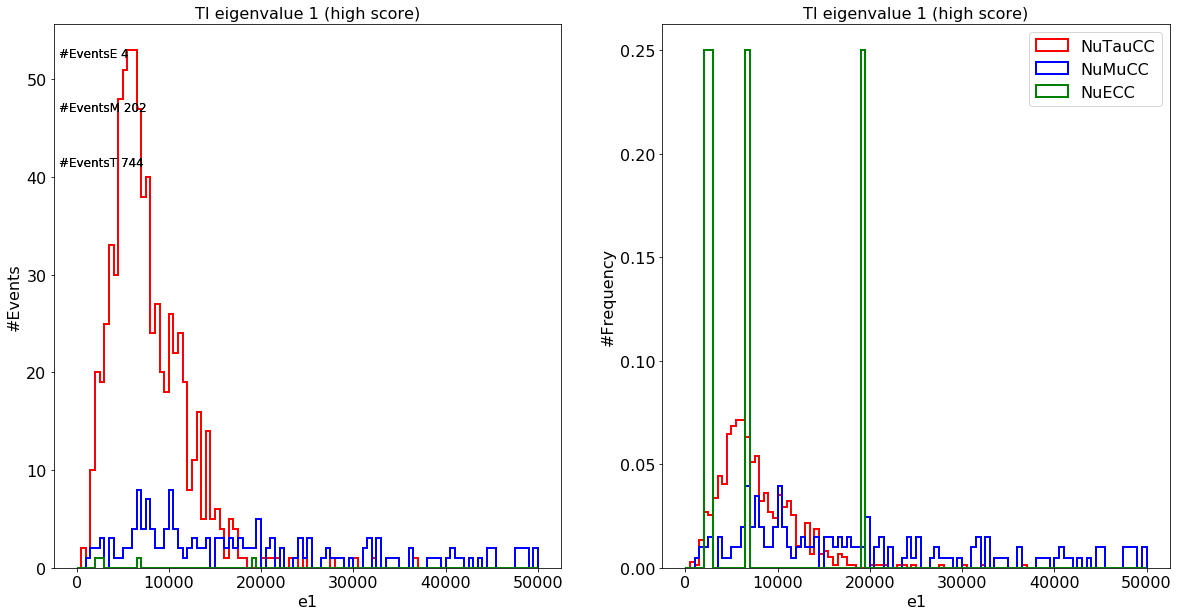

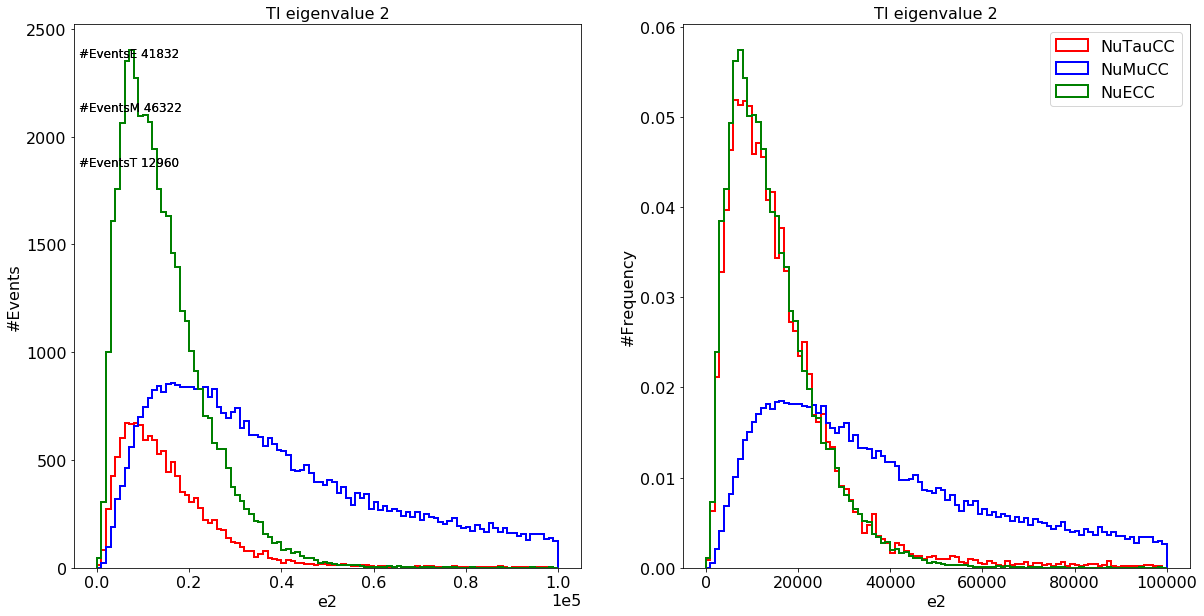

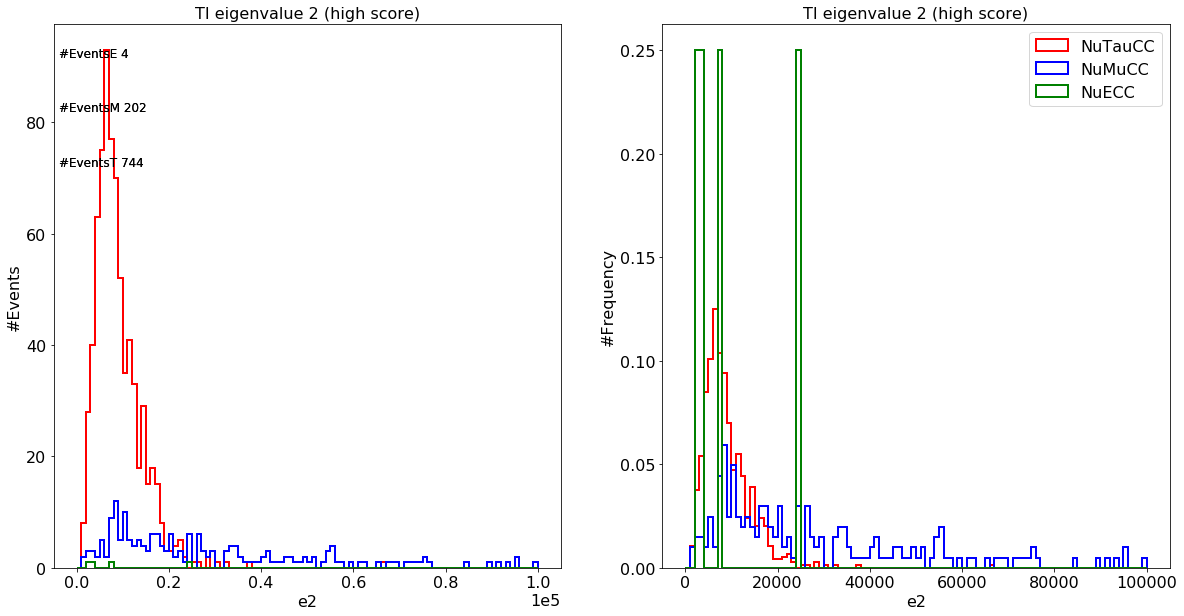

In [25]:
Plot("TI minimum eigenvalue","emin",data_t['ti'][:,0],data_m['ti'][:,0],data_e['ti'][:,0],r=[0,50000])
Plot("TI minimum eigenvalue (high score)","emin",data_t['ti'][:,0][mask_t],data_m['ti'][:,0][mask_m],data_e['ti'][:,0][mask_e],r=[0,50000])
Plot("TI eigenvalue ratio","ratio",data_t['ti'][:,1],data_m['ti'][:,1],data_e['ti'][:,1],r=[0,1])
Plot("TI eigenvalue ratio (high score)","ratio",data_t['ti'][:,1][mask_t],data_m['ti'][:,1][mask_m],data_e['ti'][:,1][mask_e],r=[0,1])
Plot("TI eigenvalue 1","e1",data_t['ti'][:,2],data_m['ti'][:,2],data_e['ti'][:,2],r=[0,50000])
Plot("TI eigenvalue 1 (high score)","e1",data_t['ti'][:,2][mask_t],data_m['ti'][:,2][mask_m],data_e['ti'][:,2][mask_e],r=[0,50000])
Plot("TI eigenvalue 2","e2",data_t['ti'][:,3],data_m['ti'][:,3],data_e['ti'][:,3],r=[0,100000])
Plot("TI eigenvalue 2 (high score)","e2",data_t['ti'][:,3][mask_t],data_m['ti'][:,3][mask_m],data_e['ti'][:,3][mask_e],r=[0,100000])

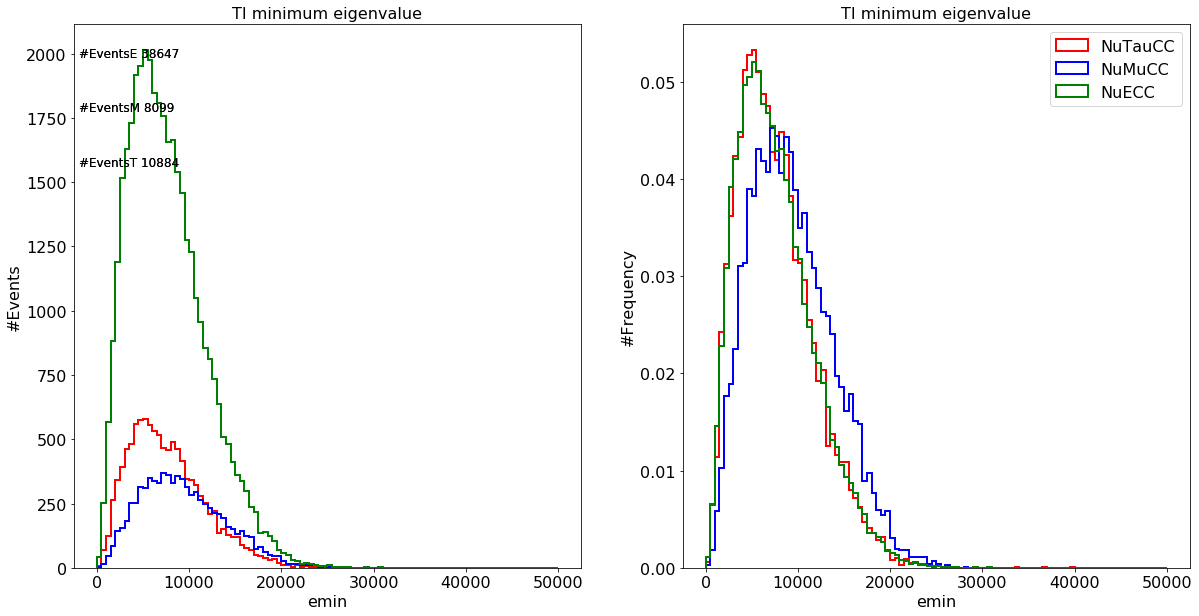

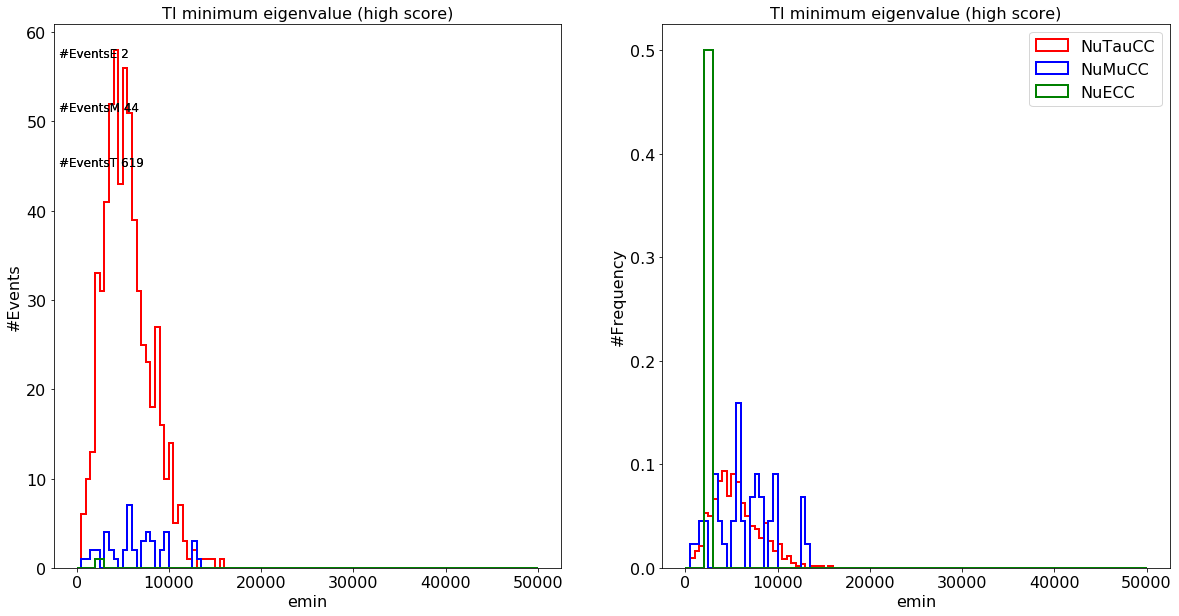

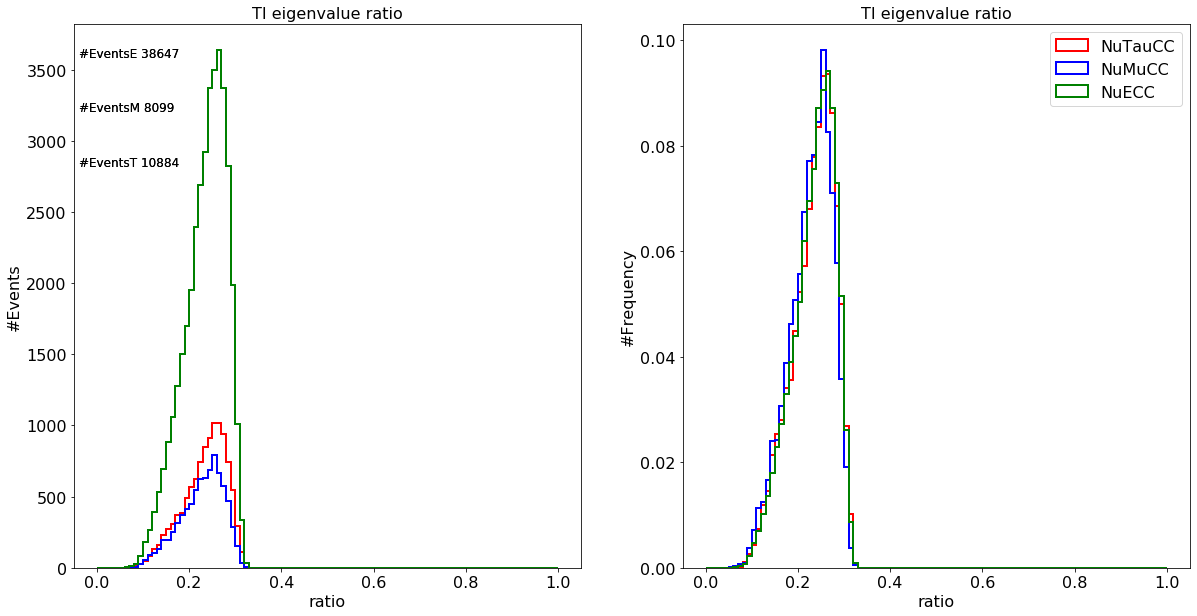

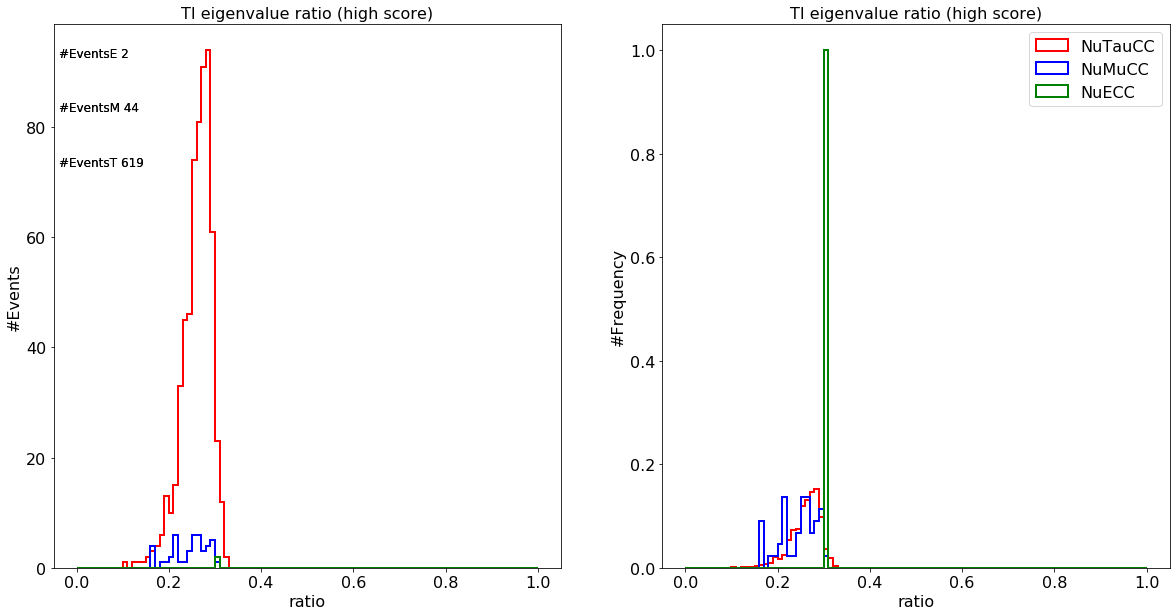

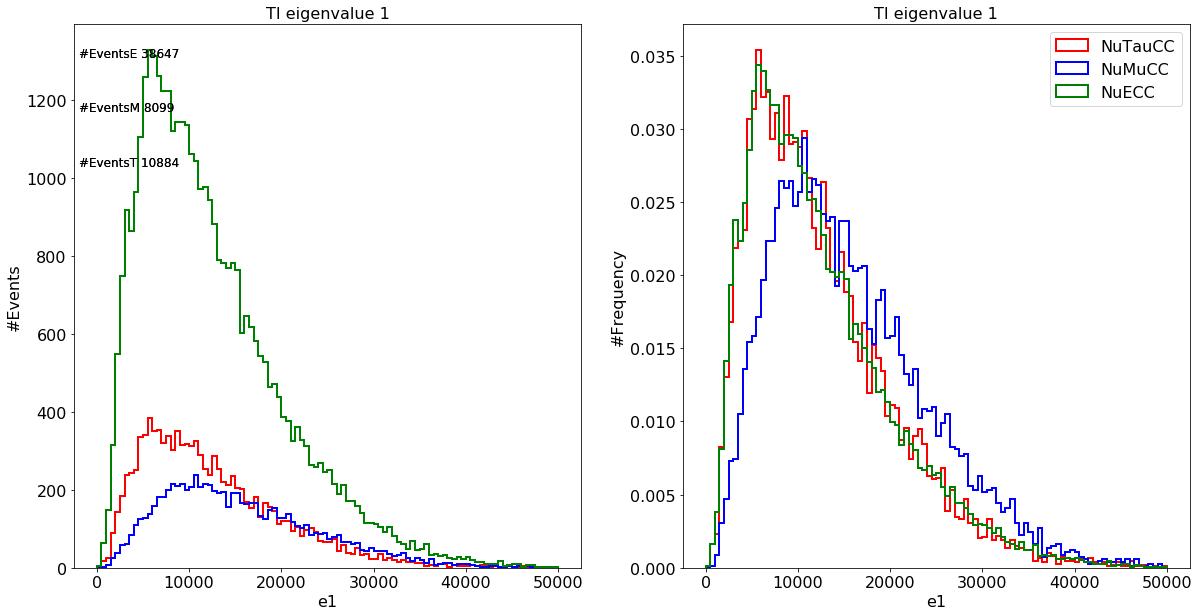

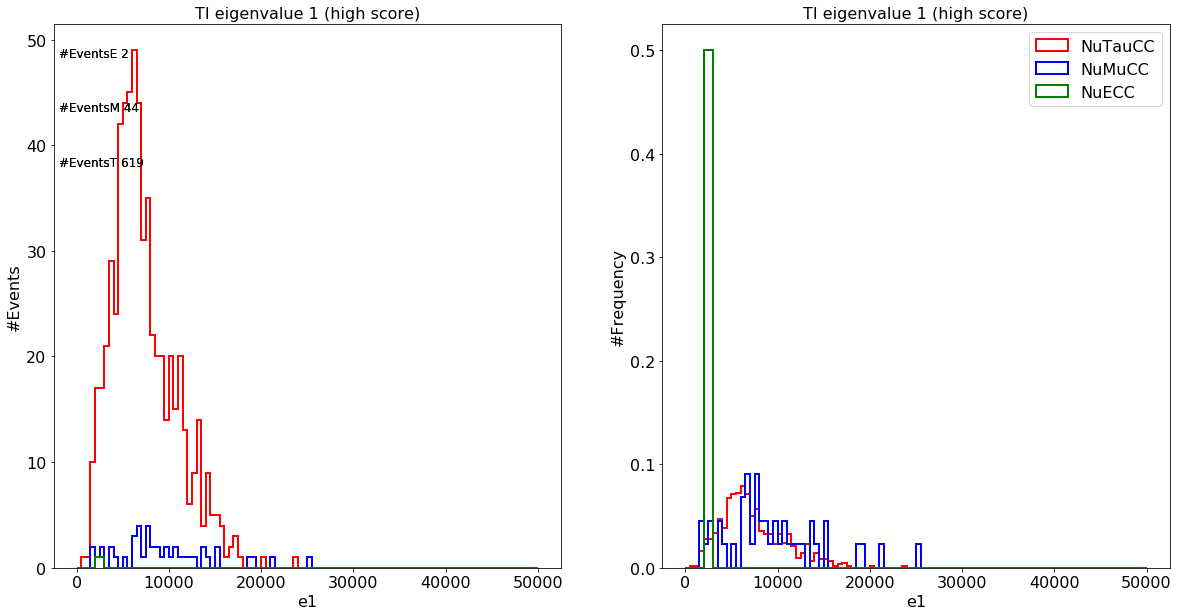

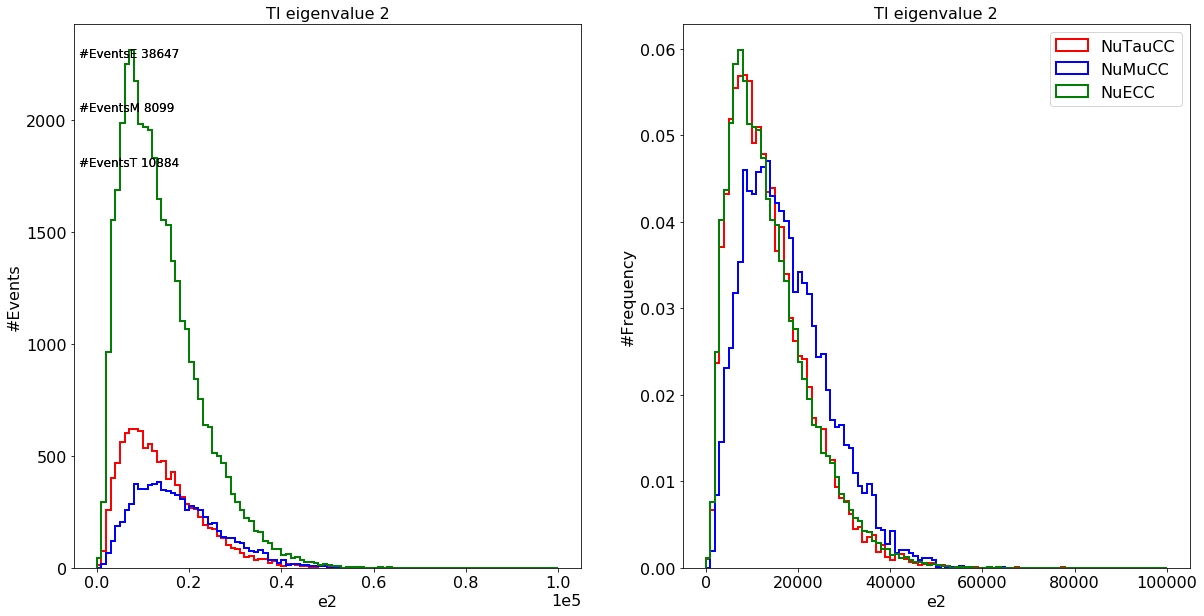

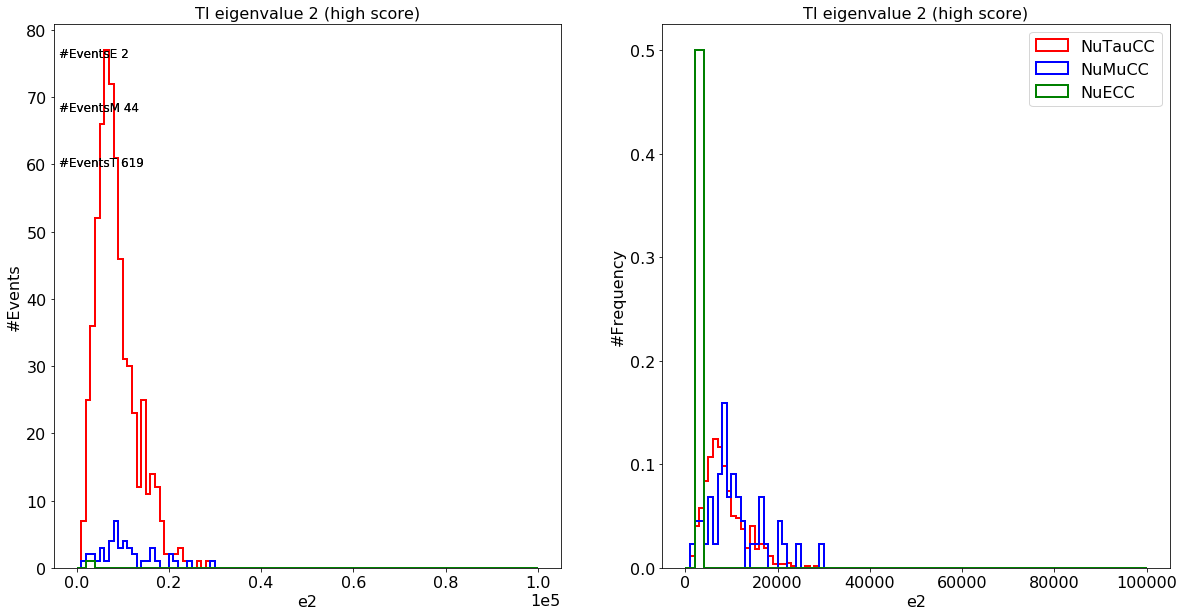

In [99]:
Plot("TI minimum eigenvalue","emin",data_t[mask_lt]['ti'][:,0],data_m[mask_lm]['ti'][:,0],data_e[mask_le]['ti'][:,0],r=[0,50000])
Plot("TI minimum eigenvalue (high score)","emin",data_t['ti'][:,0][mask_lts],data_m['ti'][:,0][mask_lms],data_e['ti'][:,0][mask_les],r=[0,50000])
Plot("TI eigenvalue ratio","ratio",data_t[mask_lt]['ti'][:,1],data_m[mask_lm]['ti'][:,1],data_e[mask_le]['ti'][:,1],r=[0,1])
Plot("TI eigenvalue ratio (high score)","ratio",data_t['ti'][:,1][mask_lts],data_m['ti'][:,1][mask_lms],data_e['ti'][:,1][mask_les],r=[0,1])
Plot("TI eigenvalue 1","e1",data_t[mask_lt]['ti'][:,2],data_m[mask_lm]['ti'][:,2],data_e[mask_le]['ti'][:,2],r=[0,50000])
Plot("TI eigenvalue 1 (high score)","e1",data_t['ti'][:,2][mask_lts],data_m['ti'][:,2][mask_lms],data_e['ti'][:,2][mask_les],r=[0,50000])
Plot("TI eigenvalue 2","e2",data_t[mask_lt]['ti'][:,3],data_m[mask_lm]['ti'][:,3],data_e[mask_le]['ti'][:,3],r=[0,100000])
Plot("TI eigenvalue 2 (high score)","e2",data_t['ti'][:,3][mask_lts],data_m['ti'][:,3][mask_lms],data_e['ti'][:,3][mask_les],r=[0,100000])

In [39]:
def Corr(Name,label_x,label_y,x,y,c):
    fig = plt.figure(figsize=(10, 10),facecolor ='w')
    ax = fig.add_subplot()
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
   
    ax.set_title(Name, fontsize = 16)
    ax.text(0.01,0.95,'#Events '+str(len(x)), transform=ax.transAxes, color = "black",fontsize=12)
    
    ax.set_xlabel(label_x, fontsize = 16)                                                              
    ax.set_ylabel(label_y, fontsize = 16)                                                   
    ax.scatter(x,y, s=1,color = c)  
    plt.show()


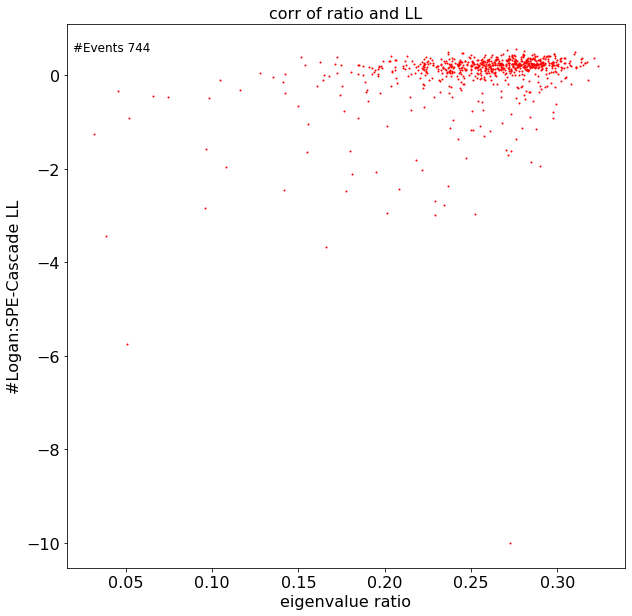

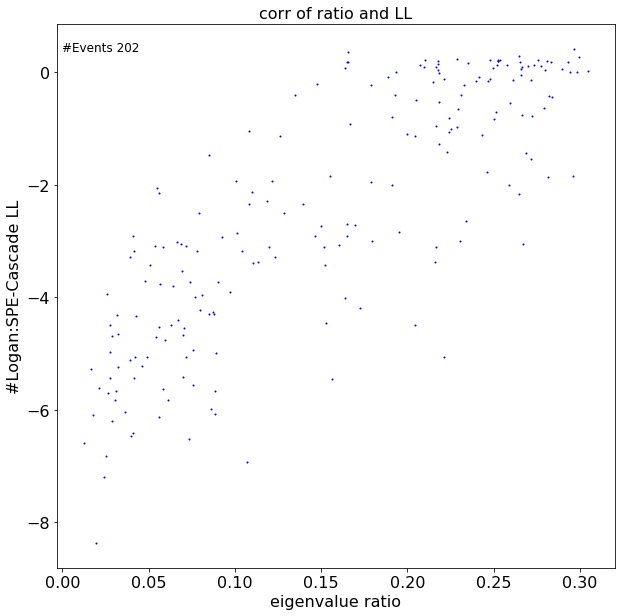

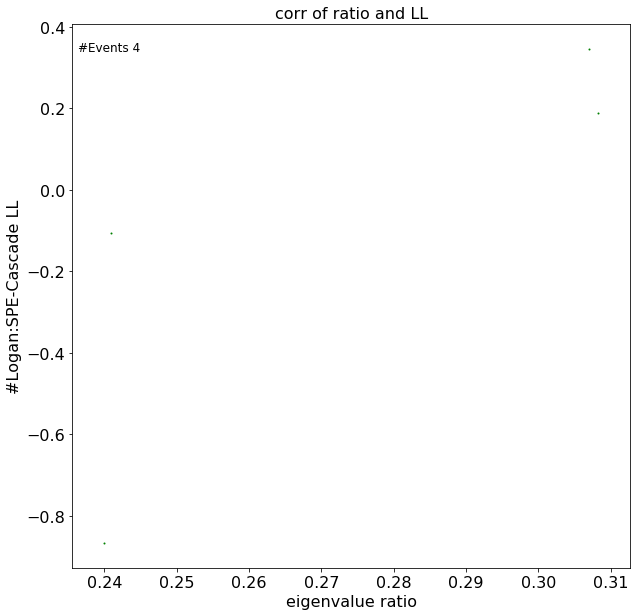

In [40]:
Corr("corr of ratio and LL","eigenvalue ratio","#Logan:SPE-Cascade LL",data_t['ti'][:,1][mask_t],np.clip(data_t['logan_veto']['SPE_rlogl'][mask_t]-data_t['logan_veto']['Cascade_rlogl'][mask_t],-10,5),"r")
Corr("corr of ratio and LL","eigenvalue ratio","#Logan:SPE-Cascade LL",data_m['ti'][:,1][mask_m],np.clip(data_m['logan_veto']['SPE_rlogl'][mask_m]-data_m['logan_veto']['Cascade_rlogl'][mask_m],-10,5),"b")
Corr("corr of ratio and LL","eigenvalue ratio","#Logan:SPE-Cascade LL",data_e['ti'][:,1][mask_e],np.clip(data_e['logan_veto']['SPE_rlogl'][mask_e]-data_e['logan_veto']['Cascade_rlogl'][mask_e],-10,5),"g")

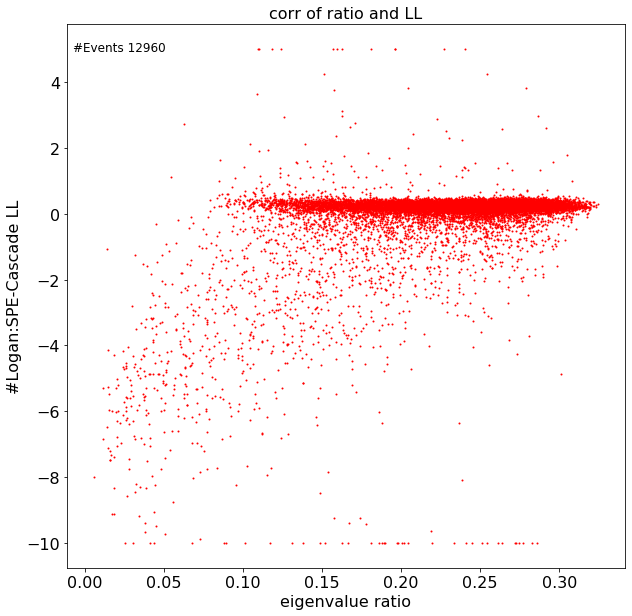

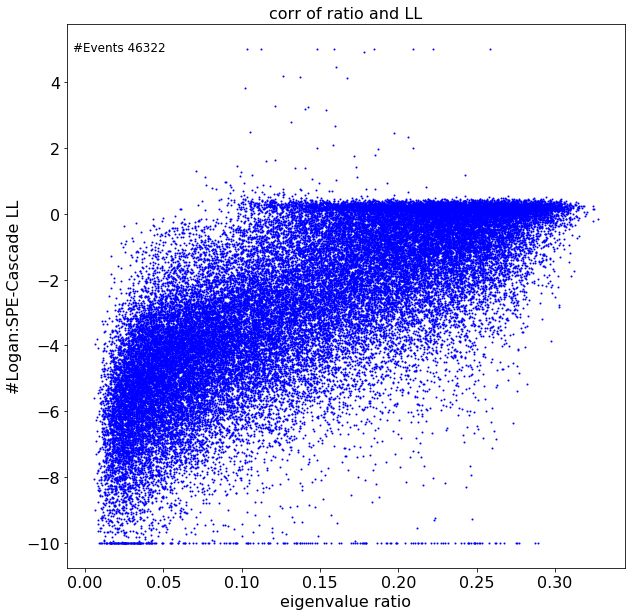

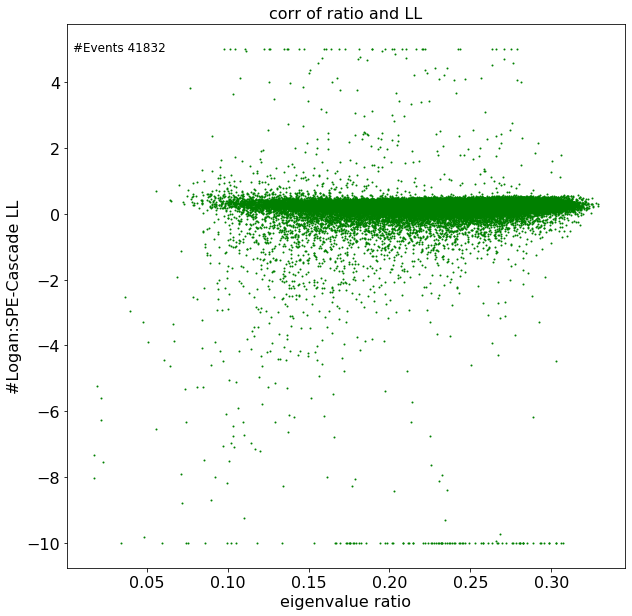

In [41]:
Corr("corr of ratio and LL","eigenvalue ratio","#Logan:SPE-Cascade LL",data_t['ti'][:,1],np.clip(data_t['logan_veto']['SPE_rlogl']-data_t['logan_veto']['Cascade_rlogl'],-10,5),"r")
Corr("corr of ratio and LL","eigenvalue ratio","#Logan:SPE-Cascade LL",data_m['ti'][:,1],np.clip(data_m['logan_veto']['SPE_rlogl']-data_m['logan_veto']['Cascade_rlogl'],-10,5),"b")
Corr("corr of ratio and LL","eigenvalue ratio","#Logan:SPE-Cascade LL",data_e['ti'][:,1],np.clip(data_e['logan_veto']['SPE_rlogl']-data_e['logan_veto']['Cascade_rlogl'],-10,5),"g")

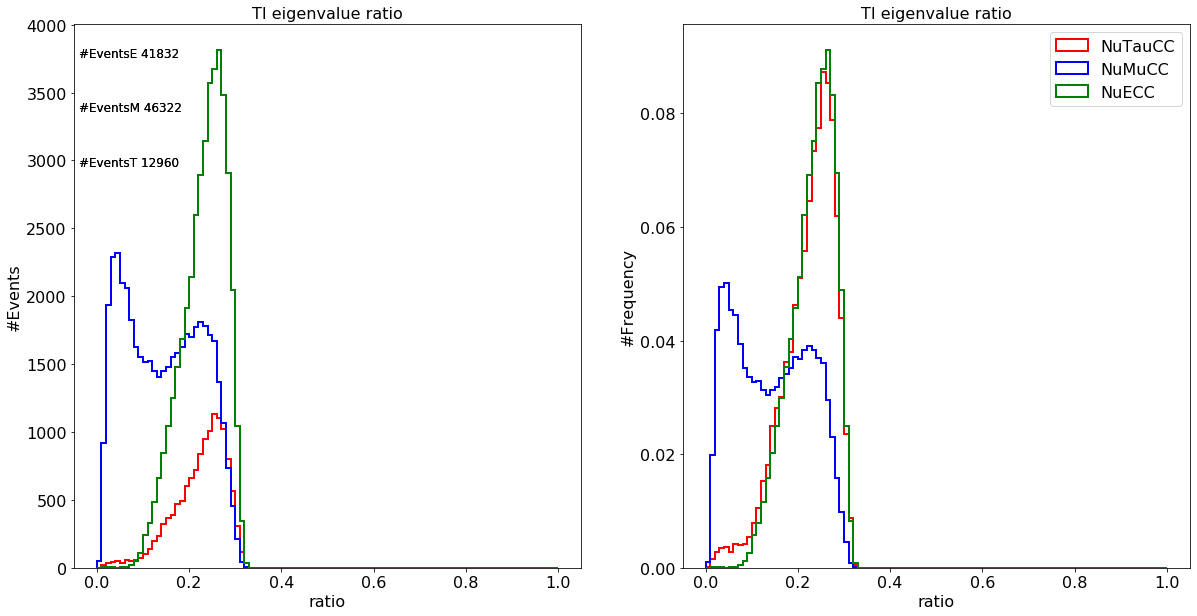

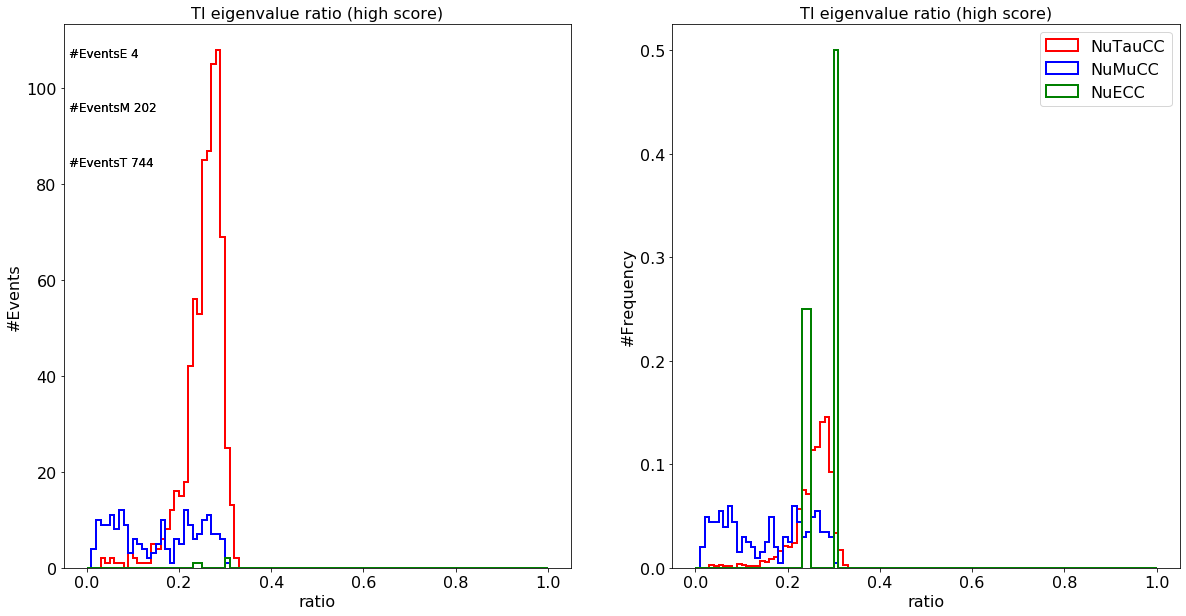

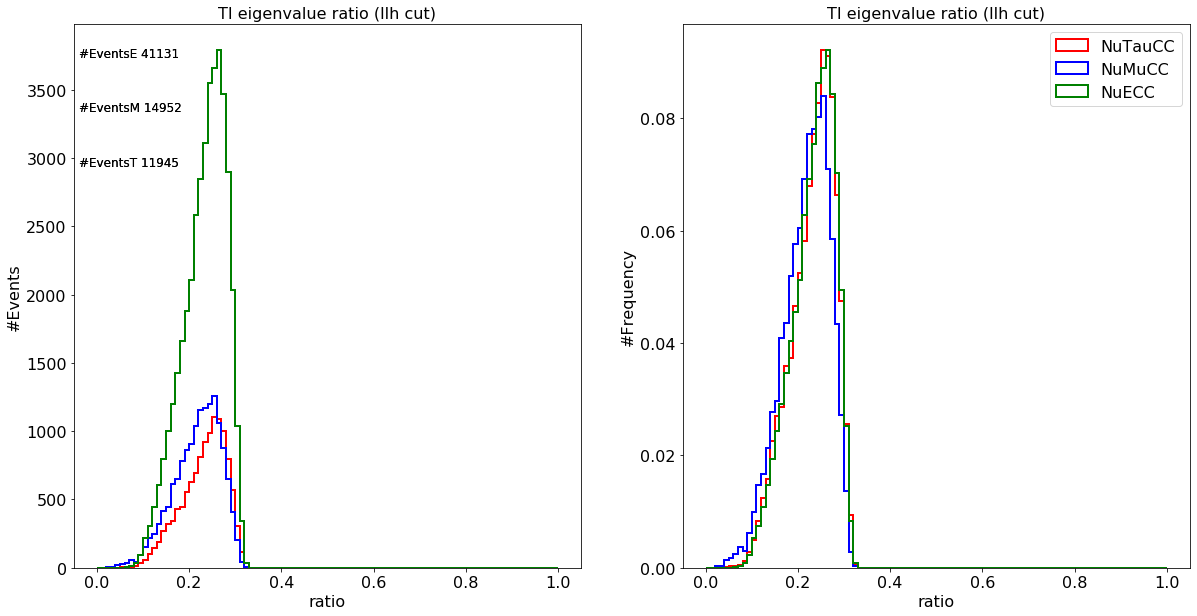

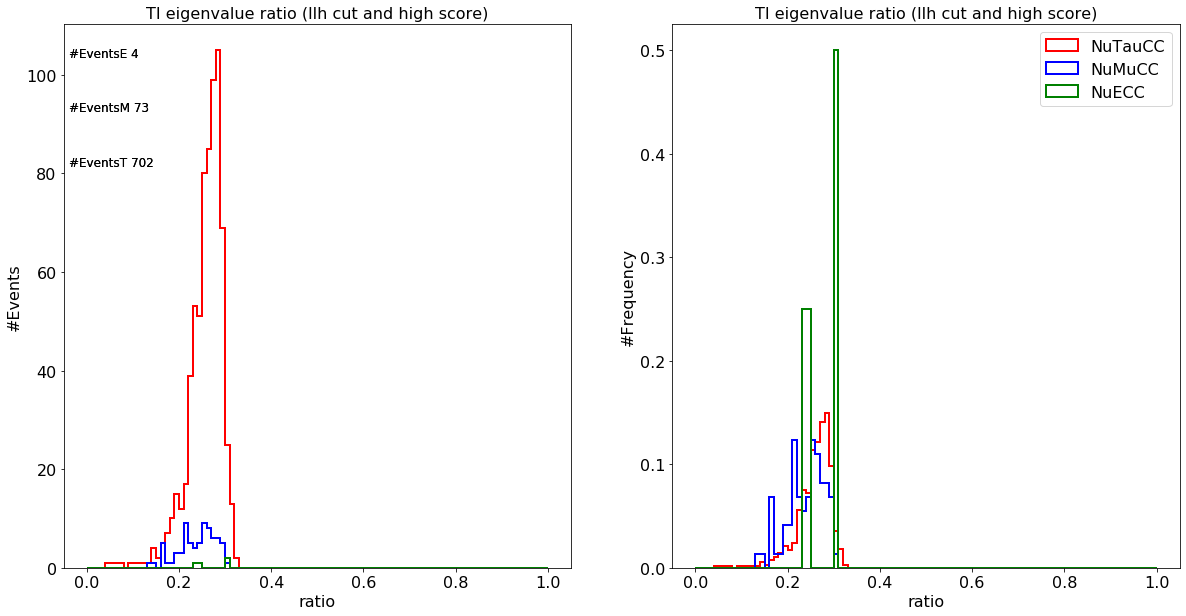

Rates after NET1 and NET3
NuTauCC = 0.379 +/- 0.026
NuMuCC =  0.114 +/- 0.021
NuECC =   0.005 +/- 0.004


In [60]:
Plot("TI eigenvalue ratio","ratio",data_t['ti'][:,1],data_m['ti'][:,1],data_e['ti'][:,1],r=[0,1])
Plot("TI eigenvalue ratio (high score)","ratio",data_t['ti'][:,1][mask_t],data_m['ti'][:,1][mask_m],data_e['ti'][:,1][mask_e],r=[0,1])
Plot("TI eigenvalue ratio (llh cut)","ratio",data_t['ti'][:,1][mask_lt],data_m['ti'][:,1][mask_lm],data_e['ti'][:,1][mask_le],r=[0,1])
Plot("TI eigenvalue ratio (llh cut and high score)","ratio",data_t['ti'][:,1][mask_lts],data_m['ti'][:,1][mask_lms],data_e['ti'][:,1][mask_les],r=[0,1])


In [54]:
print(sum(mask_rms),sum(mask_m))

107 202


/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


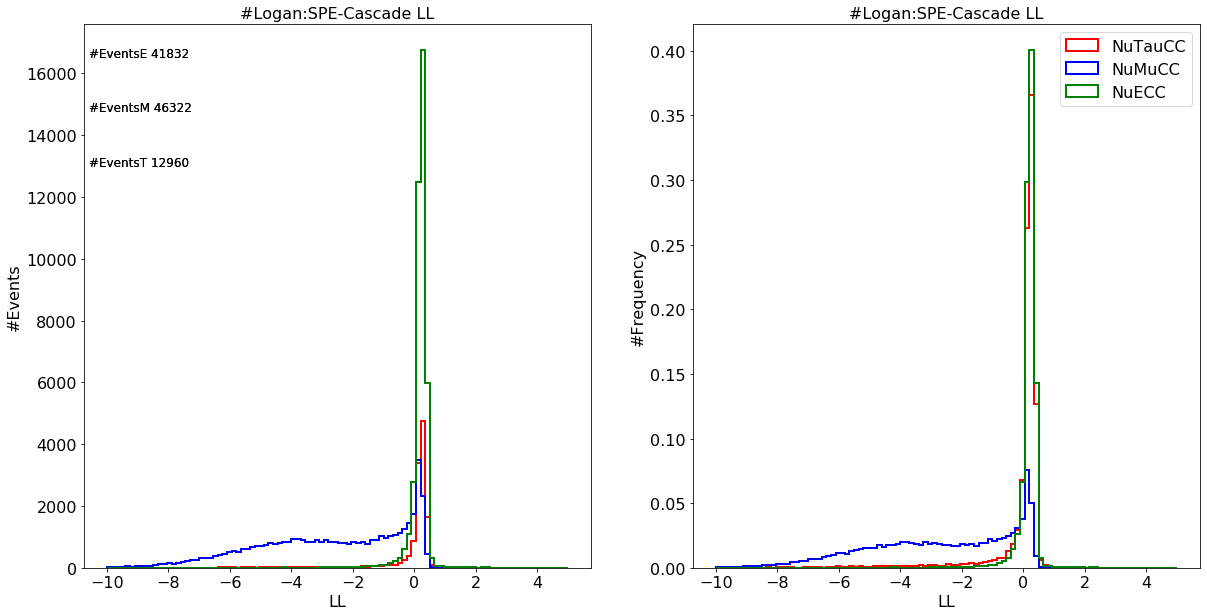

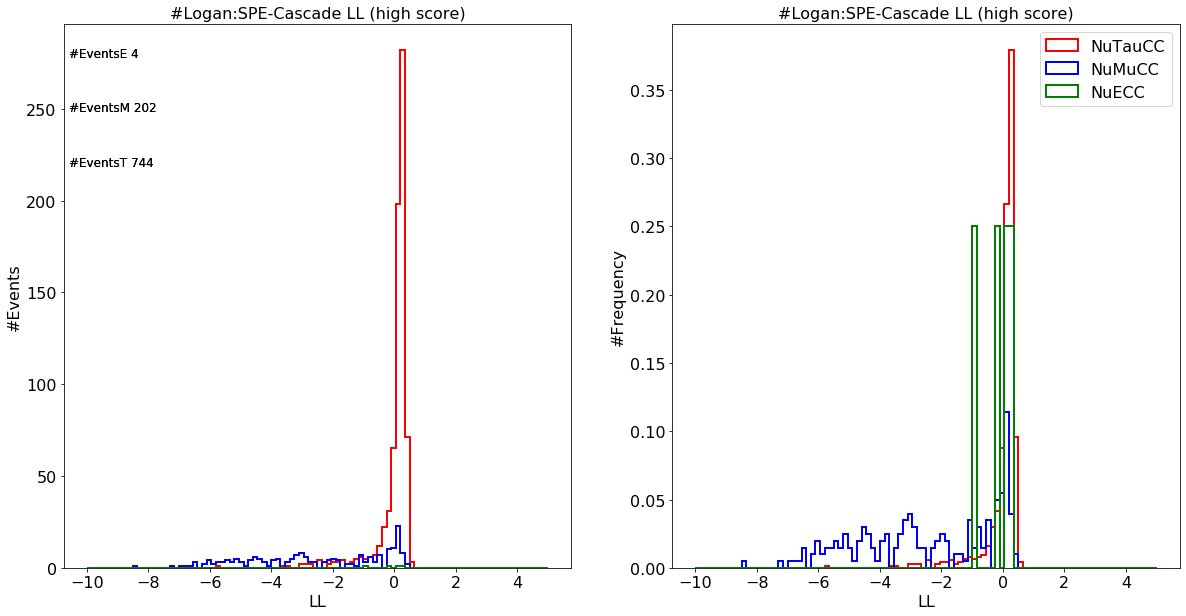

/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


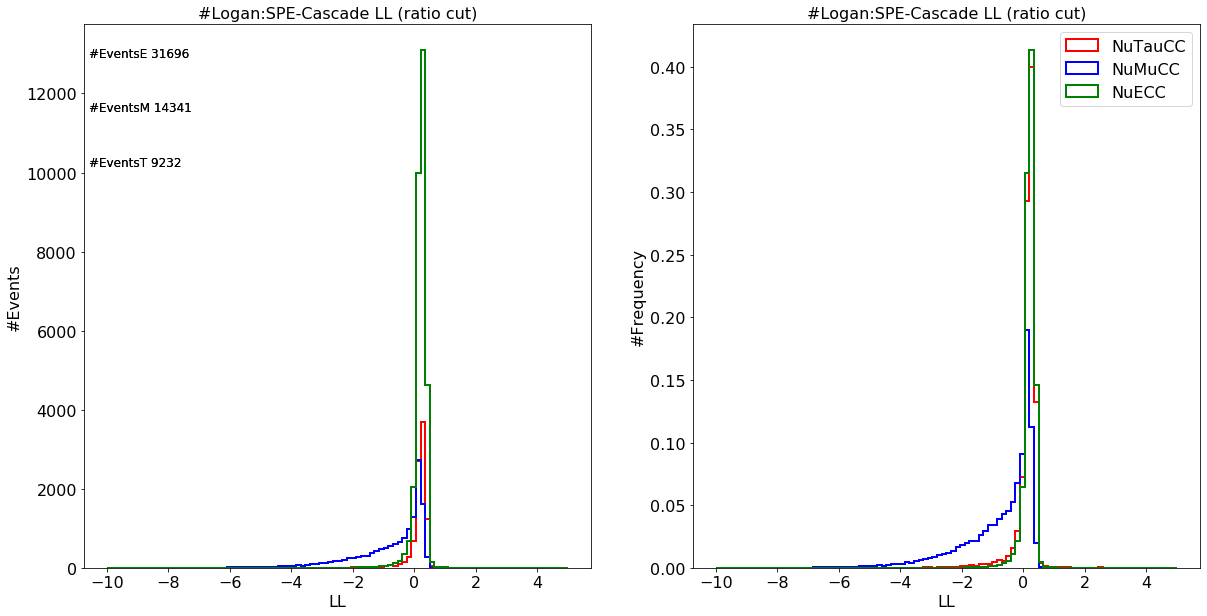

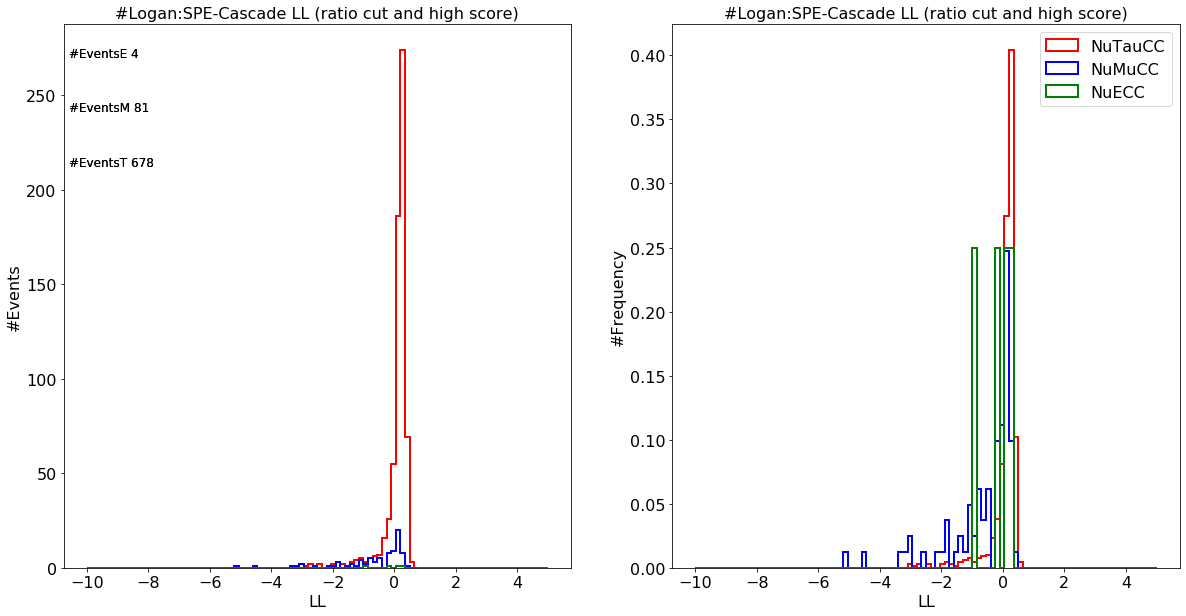

In [57]:
Plot("#Logan:SPE-Cascade LL","LL",data_t['logan_veto']['SPE_rlogl']-data_t['logan_veto']['Cascade_rlogl'],data_m['logan_veto']['SPE_rlogl']-data_m['logan_veto']['Cascade_rlogl'],data_e['logan_veto']['SPE_rlogl']-data_e['logan_veto']['Cascade_rlogl'],r=[-10,5])
Plot("#Logan:SPE-Cascade LL (high score)","LL",data_t[mask_t]['logan_veto']['SPE_rlogl']-data_t[mask_t]['logan_veto']['Cascade_rlogl'],data_m[mask_m]['logan_veto']['SPE_rlogl']-data_m[mask_m]['logan_veto']['Cascade_rlogl'],data_e[mask_e]['logan_veto']['SPE_rlogl']-data_e[mask_e]['logan_veto']['Cascade_rlogl'],r=[-10,5])
Plot("#Logan:SPE-Cascade LL (ratio cut)","LL",data_t[mask_rt]['logan_veto']['SPE_rlogl']-data_t[mask_rt]['logan_veto']['Cascade_rlogl'],data_m[mask_rm]['logan_veto']['SPE_rlogl']-data_m[mask_rm]['logan_veto']['Cascade_rlogl'],data_e[mask_re]['logan_veto']['SPE_rlogl']-data_e[mask_re]['logan_veto']['Cascade_rlogl'],r=[-10,5])
Plot("#Logan:SPE-Cascade LL (ratio cut and high score)","LL",data_t[mask_rts]['logan_veto']['SPE_rlogl']-data_t[mask_rts]['logan_veto']['Cascade_rlogl'],data_m[mask_rms]['logan_veto']['SPE_rlogl']-data_m[mask_rms]['logan_veto']['Cascade_rlogl'],data_e[mask_res]['logan_veto']['SPE_rlogl']-data_e[mask_res]['logan_veto']['Cascade_rlogl'],r=[-10,5])

In [56]:
cuts = np.arange(-5,1,0.01)
plot_data = []
plot_data_w = []
plot_data_m = []
plot_data_mw = []

for c in cuts:
    tp = len([i for i in data_t if (i['logan_veto']['SPE_rlogl']-i['logan_veto']['Cascade_rlogl']>=c)])/data_t.shape[0]*100
    fp = len([i for i in data_m if (i['logan_veto']['SPE_rlogl']-i['logan_veto']['Cascade_rlogl']>=c)])/data_m.shape[0]*100
    wtp = sum([i['weight_val'] for i in data_t if (i['logan_veto']['SPE_rlogl']-i['logan_veto']['Cascade_rlogl']>=c)])/sum(data_t['weight_val'])*100
    wfp = sum([i['weight_val'] for i in data_m if (i['logan_veto']['SPE_rlogl']-i['logan_veto']['Cascade_rlogl']>=c)])/sum(data_m['weight_val'])*100
    tpm = len([i for i in data_t[mask_t] if (i['logan_veto']['SPE_rlogl']-i['logan_veto']['Cascade_rlogl']>=c)])/sum(mask_t)*100
    fpm = len([i for i in data_m[mask_m] if (i['logan_veto']['SPE_rlogl']-i['logan_veto']['Cascade_rlogl']>=c)])/sum(mask_m)*100
    wtpm = sum([i['weight_val'] for i in data_t[mask_t] if (i['logan_veto']['SPE_rlogl']-i['logan_veto']['Cascade_rlogl']>=c)])/sum(data_t[mask_t]['weight_val'])*100
    wfpm = sum([i['weight_val'] for i in data_m[mask_m] if (i['logan_veto']['SPE_rlogl']-i['logan_veto']['Cascade_rlogl']>=c)])/sum(data_m[mask_m]['weight_val'])*100
                   
    plot_data.append([c,tp,fp])
    plot_data_w.append([c,wtp,wfp])
    plot_data_m.append([c,tpm,fpm])
    plot_data_mw.append([c,wtpm,wfpm])

plot_data = np.array(plot_data)
plot_data_w = np.array(plot_data_w)
plot_data_m = np.array(plot_data_m)
plot_data_mw = np.array(plot_data_mw)

#print(cuts)

In [57]:
print(plot_data[-2:],plot_data_w[-2:],plot_data_m[-2:],plot_data_mw[-2:])

[[0.98       0.6712963  0.09498726]
 [0.99       0.66358025 0.09498726]] [[0.98       1.38842848 0.37079562]
 [0.99       1.35364385 0.37079562]] [[0.98 0.   0.  ]
 [0.99 0.   0.  ]] [[0.98 0.   0.  ]
 [0.99 0.   0.  ]]


In [58]:
#for n,i in enumerate(plot_data): 
#    wrt = "Cut = {0:.2f}, {1:.2f}%, {2:.2f}% ".format(i[0],i[1],100-i[2])
#    print(wrt)

In [78]:
def PlotROC(arr1,arr2,arr3,arr4, name):
    fig = plt.figure(figsize=(20, 15),facecolor = "w")
    ax = fig.add_subplot(111)
    ax.set_title(name, fontsize = 14)
    ax.set_ylabel("True positive, NuTau as NuTau", fontsize = 14)                                                                                                                           
    ax.set_xlabel("False positive, NuMu as NuTau", fontsize = 14)                                                   
    ax.set_xlim(0,100)
    ax.set_ylim(0,100)
    plt.plot(arr1[:,2], arr1[:,1], label ="events", )
    plt.plot(arr2[:,2], arr2[:,1], label ="weights", )
    plt.plot(arr3[:,2], arr3[:,1], label ="events $ high score", )
    plt.plot(arr4[:,2], arr4[:,1], label ="weights $ high score", )
    
    plt.xticks(np.arange(0, 101, 5.0))
    plt.yticks(np.arange(0, 101, 5.0))
    
    plt.xlim([0,100])
    plt.ylim([0,100])
    
    plt.legend()

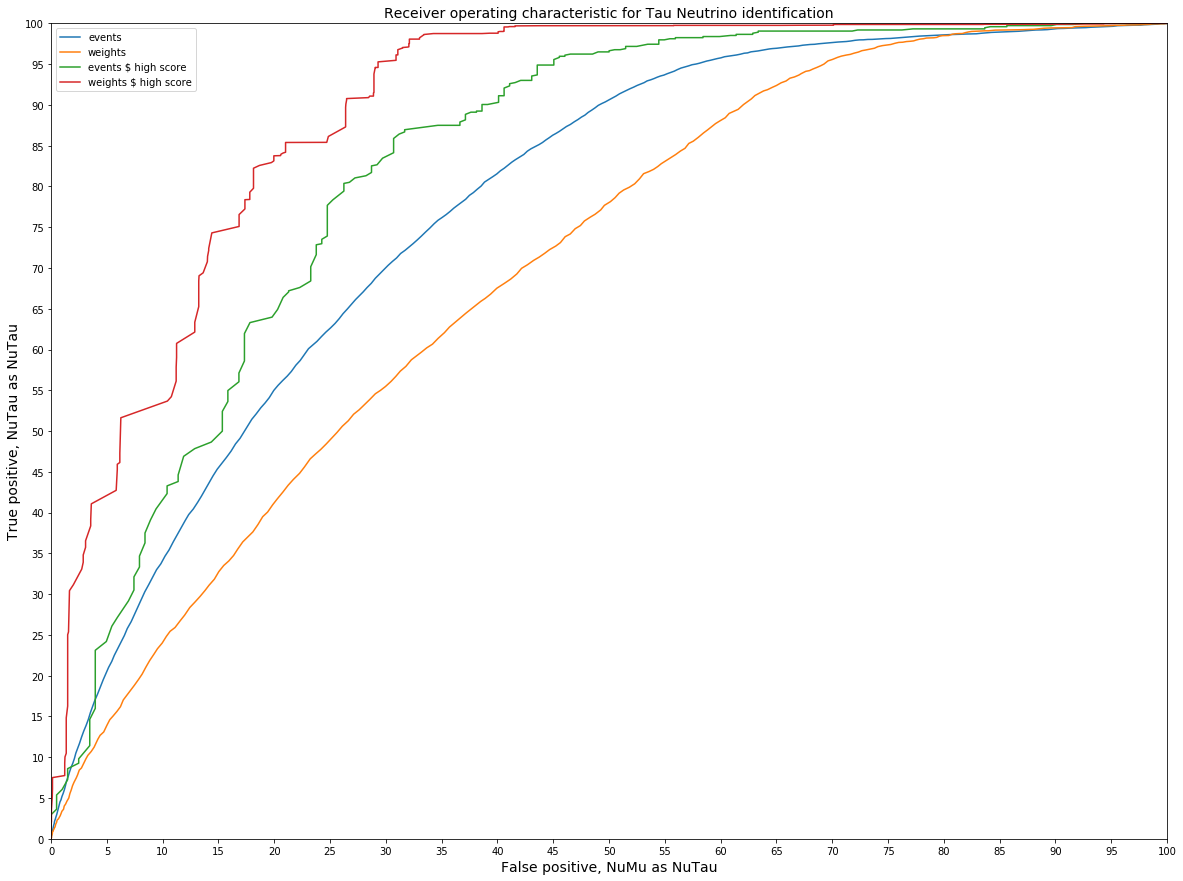

In [79]:
PlotROC(plot_data,plot_data_w,plot_data_m,plot_data_mw,"Receiver operating characteristic for Tau Neutrino identification")

In [68]:
for i in plot_data:
    if (i[1]>83) and ((i[1]<85)):
        print(i)
print("A")
for i in plot_data_w:
    if (i[1]>80) and ((i[1]<83)):
        print(i)
print("A")
for i in plot_data_m:
    if (i[1]>83) and ((i[1]<85)):
        print(i)
print("A")
for i in plot_data_mw:
    if (i[1]>93) and ((i[1]<95)):
        print(i)

[-0.14       84.99228395 18.3670826 ]
[-0.13       84.72993827 18.12529684]
[-0.12       84.52160494 17.89862268]
[-0.11       84.26697531 17.66547213]
[-0.1        83.98148148 17.48413281]
[-0.09       83.62654321 17.29631708]
[-8.00000000e-02  8.33256173e+01  1.70977074e+01]
[-7.00000000e-02  8.30941358e+01  1.68580804e+01]
A
[4.00000000e-02 8.28426876e+01 1.79930952e+01]
[5.00000000e-02 8.20969690e+01 1.76734773e+01]
[6.00000000e-02 8.16766141e+01 1.73946462e+01]
[7.00000000e-02 8.09376512e+01 1.68971382e+01]
[8.00000000e-02 8.02977031e+01 1.65115511e+01]
A
[-0.16       84.94623656 24.75247525]
[-0.15       84.67741935 23.26732673]
[-0.14       84.54301075 22.77227723]
[-0.13       84.13978495 22.77227723]
[-0.12       84.00537634 21.78217822]
[-0.11       83.87096774 21.78217822]
[-0.1        83.19892473 21.78217822]
A
[-0.31       94.99974816 12.49620053]
[-0.3        94.92104579 12.49620053]
[-0.29       94.92104579 12.49620053]
[-0.28       94.92104579 12.49620053]
[-0.27       

In [70]:
cuts = np.arange(0,0.5,0.001)
plot_data = []
plot_data_w = []
plot_data_m = []
plot_data_mw = []

for c in cuts:
    tp = len([i for i in data_t if (i['ti'][1]>=c)])/data_t.shape[0]*100
    fp = len([i for i in data_m if (i['ti'][1]>=c)])/data_m.shape[0]*100
    wtp = sum([i['weight_val'] for i in data_t if (i['ti'][1]>=c)])/sum(data_t['weight_val'])*100
    wfp = sum([i['weight_val'] for i in data_m if (i['ti'][1]>=c)])/sum(data_m['weight_val'])*100
    tpm = len([i for i in data_t[mask_t] if (i['ti'][1]>=c)])/sum(mask_t)*100
    fpm = len([i for i in data_m[mask_m] if (i['ti'][1]>=c)])/sum(mask_m)*100
    wtpm = sum([i['weight_val'] for i in data_t[mask_t] if (i['ti'][1]>=c)])/sum(data_t[mask_t]['weight_val'])*100
    wfpm = sum([i['weight_val'] for i in data_m[mask_m] if (i['ti'][1]>=c)])/sum(data_m[mask_m]['weight_val'])*100
                   
    plot_data.append([c,tp,fp])
    plot_data_w.append([c,wtp,wfp])
    plot_data_m.append([c,tpm,fpm])
    plot_data_mw.append([c,wtpm,wfpm])

plot_data = np.array(plot_data)
plot_data_w = np.array(plot_data_w)
plot_data_m = np.array(plot_data_m)
plot_data_mw = np.array(plot_data_mw)

#print(cuts)

In [71]:
print(plot_data[-2:],plot_data_w[-2:],plot_data_m[-2:],plot_data_mw[-2:])

[[0.498 0.    0.   ]
 [0.499 0.    0.   ]] [[0.498 0.    0.   ]
 [0.499 0.    0.   ]] [[0.498 0.    0.   ]
 [0.499 0.    0.   ]] [[0.498 0.    0.   ]
 [0.499 0.    0.   ]]


In [58]:
#for n,i in enumerate(plot_data): 
#    wrt = "Cut = {0:.2f}, {1:.2f}%, {2:.2f}% ".format(i[0],i[1],100-i[2])
#    print(wrt)

In [80]:
def PlotROC(arr1,arr2,arr3,arr4, name):
    fig = plt.figure(figsize=(20, 15),facecolor = "w")
    ax = fig.add_subplot(111)
    ax.set_title(name, fontsize = 14)
    ax.set_ylabel("True positive, NuTau as NuTau", fontsize = 14)                                                                                                                           
    ax.set_xlabel("False positive, NuMu as NuTau", fontsize = 14)                                                   
    ax.set_xlim(0,100)
    ax.set_ylim(0,100)
    plt.plot(arr1[:,2], arr1[:,1], label ="events", )
    plt.plot(arr2[:,2], arr2[:,1], label ="weights", )
    plt.plot(arr3[:,2], arr3[:,1], label ="events $ high score", )
    plt.plot(arr4[:,2], arr4[:,1], label ="weights $ high score", )
    
    plt.xticks(np.arange(0, 101, 5.0))
    plt.yticks(np.arange(0, 101, 5.0))
    
    plt.xlim([0,100])
    plt.ylim([0,100])
    
    plt.legend()

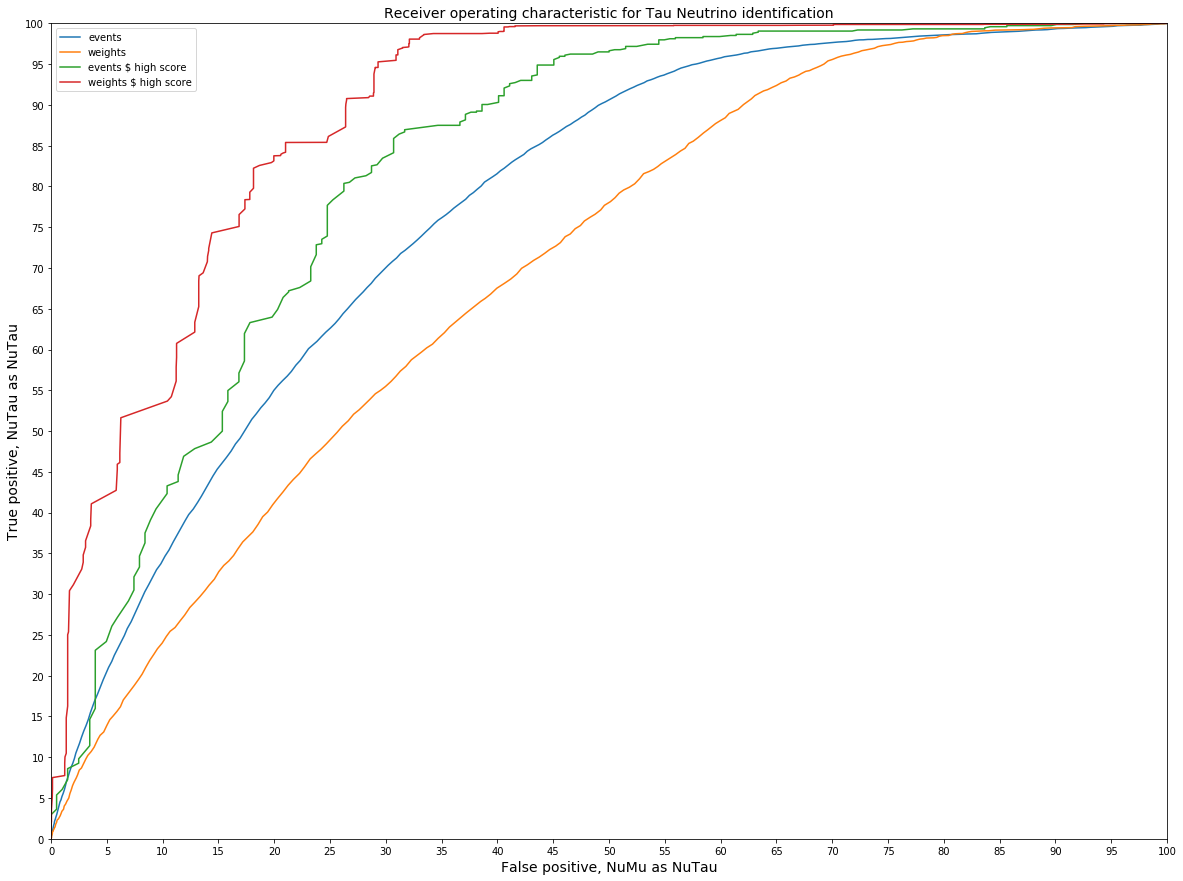

In [81]:
PlotROC(plot_data,plot_data_w,plot_data_m,plot_data_mw,"Receiver operating characteristic for Tau Neutrino identification")

In [74]:
for i in plot_data:
    if (i[1]>83) and ((i[1]<85)):
        print(i)
print("A")
for i in plot_data_w:
    if (i[1]>75) and ((i[1]<80)):
        print(i)
print("A")
for i in plot_data_m:
    if (i[1]>70) and ((i[1]<75)):
        print(i)
print("A")
for i in plot_data_mw:
    if (i[1]>60) and ((i[1]<65)):
        print(i)

[ 0.165      84.86882716 43.35736799]
[ 0.166      84.62191358 42.99900695]
[ 0.167      84.3287037  42.67518674]
[ 0.168      83.92746914 42.36216053]
[ 0.169      83.60339506 41.98437028]
[ 0.17       83.27932099 41.60010362]
A
[ 0.169      79.90847066 51.81678137]
[ 0.17       79.57344182 51.31024655]
[ 0.171      79.17437255 50.8964988 ]
[ 0.172      78.62756951 50.53699087]
[ 0.173      78.13846611 50.11834882]
[ 0.174      77.68687144 49.58064043]
[ 0.175      77.12909922 49.25407606]
[ 0.176      76.59305073 48.74563464]
[ 0.177      76.22989796 48.30392936]
[ 0.178      75.76951922 47.78827887]
[ 0.179      75.2079638  47.43106794]
A
[ 0.239      73.92473118 24.75247525]
[ 0.24       73.52150538 24.25742574]
[ 0.241      72.98387097 24.25742574]
[ 0.242      72.84946237 23.76237624]
[ 0.243      71.63978495 23.76237624]
[ 0.244      70.16129032 23.26732673]
A
[ 0.258      63.35428887 12.87685274]
[ 0.259      62.14386452 12.87685274]
[ 0.26       60.7559471  11.24586044]
